In [1]:
!pip install pyheif
!pip install mtcnn
!pip install keras-facenet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10369 sha256=3304d71b295ff73b89ec8ff204f34ed69c410b8d619cb132d6a4c54086b0c1e4
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras-facenet


In [2]:
import os
import cv2
import shutil
import numpy as np
import pandas as pd
import pyheif
import matplotlib.pyplot as plt
import plotly.express as px
from PIL import Image
from keras.preprocessing import image
from keras_facenet import FaceNet
from tqdm import tqdm
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [3]:
from google.colab import drive
drive.mount('/content/drive')
root_path = "/content/drive/MyDrive/Colab Notebooks/COEN240_TA/data"
train_path = root_path + "/train"
grade_path = root_path + "/grade"
text_file = root_path + "/train/file_mapping.txt"


Mounted at /content/drive


In [4]:
# Function to count the number of image files in a directory
def count_images(directory):
    files = os.listdir(directory)
    image_files = [file for file in files if file.endswith(('.jpeg'))]
    return len(image_files)

num_images_train = count_images(train_path)
print("Number of images in train_path:", num_images_train)

num_images_grade = count_images(grade_path)
print("Number of images in grade_path:", num_images_grade)


Number of images in train_path: 274
Number of images in grade_path: 155


In [5]:
output_directory = '/content/training'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Process file mapping and move images
with open(text_file, 'r') as file:
    for line in file:
        # Split the line into filename and label
        filename, label = line.strip().split(' ')

        # Construct the full path for the image file
        image_path = os.path.join(train_path, filename)

        # Check if the image file exists
        if not os.path.exists(image_path):
            continue

        # Check if the file is an image (by checking its extension)
        _, ext = os.path.splitext(filename)
        if ext.lower() not in ['.jpg', '.jpeg', '.png', '.gif', '.bmp']:
            continue

        # Construct the directory path for each student in the output directory
        student_dir = os.path.join(output_directory, label)

        # Create the student directory if it doesn't exist
        os.makedirs(student_dir, exist_ok=True)

        # Move the image file to the individual directory in the output directory
        shutil.copy(image_path, os.path.join(student_dir, filename))

        print(f"Moved {filename} to {student_dir}")

print("Sorting completed.")


Moved 0123_1.jpeg to /content/training/wukaiyue
Moved 0123_2.jpeg to /content/training/vanderlindenilona
Moved 0123_3.jpeg to /content/training/zhangyuanzhen
Moved 0123_4.jpeg to /content/training/liuhongji
Moved 0123_5.jpeg to /content/training/lozanoroberto
Moved 0123_6.jpeg to /content/training/yashasvi
Moved 0123_7.jpeg to /content/training/huangjiaoyan
Moved 0123_8.jpeg to /content/training/manglaniroshanlakhi
Moved 0123_9.jpeg to /content/training/somaniachal
Moved 0123_10.jpeg to /content/training/zotaharsh
Moved 0123_11.jpeg to /content/training/pereiranerissagodfrey
Moved 0123_12.jpeg to /content/training/zuluagagonzalezisabel
Moved 0123_13.jpeg to /content/training/lishumeng
Moved 0123_14.jpeg to /content/training/ravijayanthidhanasekar
Moved 0123_15.jpeg to /content/training/oraisisaac
Moved 0123_16.jpeg to /content/training/kodipunzulanandini
Moved 0123_17.jpeg to /content/training/upadhyevaishnavi
Moved 0123_18.jpeg to /content/training/chientingwei
Moved 0123_19.jpeg to /

In [6]:
cropped_folder = '/content/training'

def count_images(directory):
    total_images = 0
    for root, dirs, files in os.walk(directory):
        image_files = [file for file in files if file.lower().endswith(('.jpeg'))]
        total_images += len(image_files)
    return total_images

num_images_cropped = count_images(cropped_folder)
print("Number of images after sorting into sub directories", num_images_cropped)


Number of images after sorting into sub directories 274


In [7]:
cropped_folder = '/content/training'
folder_to_remove = 'wufangyuan'

folder_path = os.path.join(cropped_folder, folder_to_remove)

if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print(f"Folder '{folder_to_remove}' has been removed from '{cropped_folder}'.")
else:
    print(f"Folder '{folder_to_remove}' does not exist in '{cropped_folder}'.")


Folder 'wufangyuan' has been removed from '/content/training'.


In [8]:
path_train = '/content/training'

dir_names = os.listdir(path_train)
person_names = [name.split("_")[-1].title() for name in dir_names]
NUM_CLASSES = len(person_names)
n_images_per_person = [len(os.listdir(os.path.join(path_train, name))) for name in dir_names]

print(f"Total number of Students in the class: {NUM_CLASSES}\n")
print(f"Name of the students : \n\t{person_names}")

Total number of Students in the class: 32

Name of the students : 
	['Kodipunzulanandini', 'Amarisian', 'Chenziang', 'Liuhongji', 'Pereiranerissagodfrey', 'Zhangyuanzhen', 'Banmingkai', 'Zuluagagonzalezisabel', 'Shahmanali', 'Gowdarachandrashekarappasrivarsha', 'Ravijayanthidhanasekar', 'Manglaniroshanlakhi', 'Yashasvi', 'Zotaharsh', 'Chientingwei', 'Upadhyevaishnavi', 'Lozanoroberto', 'Wukaiyue', 'Perambuduruvishnu', 'Sampagaonrahul', 'Oraisisaac', 'Mendonakshay', 'Huangjiaoyan', 'Somaniachal', 'Sivarajusairevanth', 'Negiparth', 'Zhouchuandi', 'Selinayu', 'Vanderlindenilona', 'Lishumeng', 'Vennavellirajashekarreddy', 'Virvadianisargjyotin']


1/1 [==============================] - 0s 21ms/step


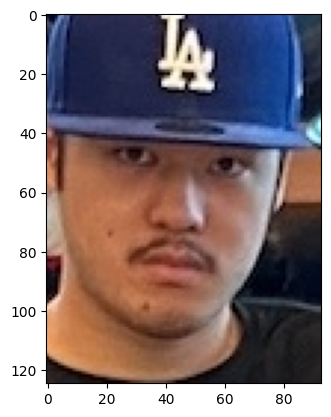

No faces found in the image
1/1 [==============================] - 0s 25ms/step


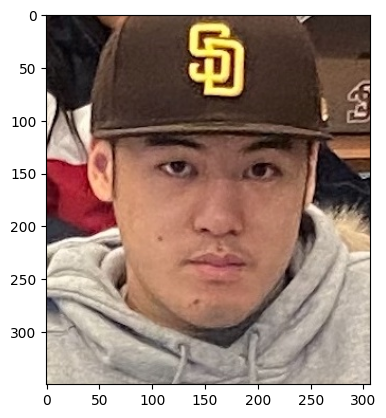

No faces found in the image
1/1 [==============================] - 0s 37ms/step


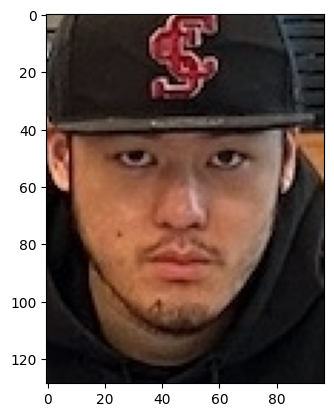

No faces found in the image
1/1 [==============================] - 0s 39ms/step


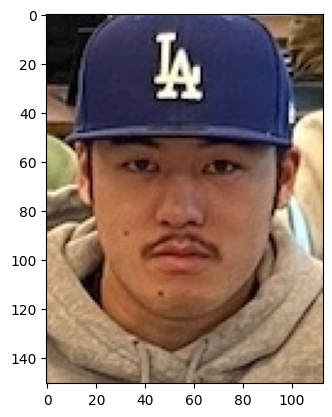

No faces found in the image
1/1 [==============================] - 0s 31ms/step


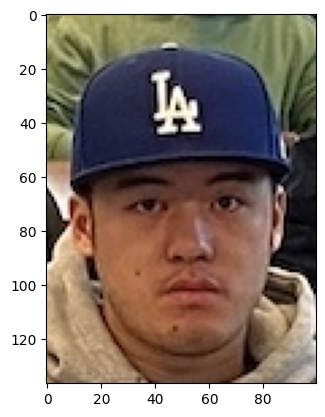

No faces found in the image
1/1 [==============================] - 0s 41ms/step


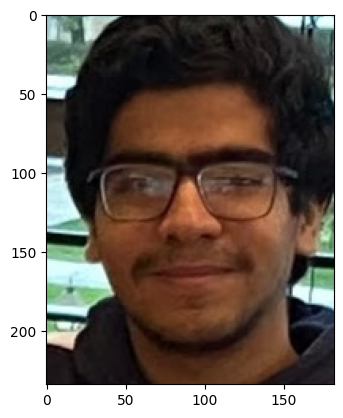

No faces found in the image
1/1 [==============================] - 0s 28ms/step


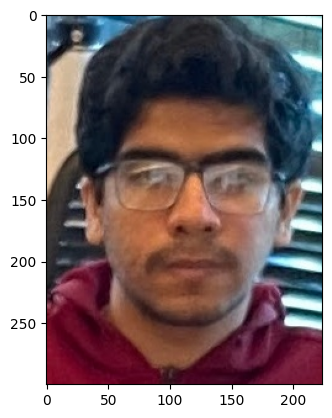

No faces found in the image
2/2 [==============================] - 0s 11ms/step


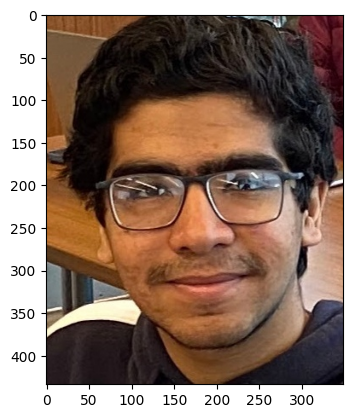

No faces found in the image
1/1 [==============================] - 0s 39ms/step


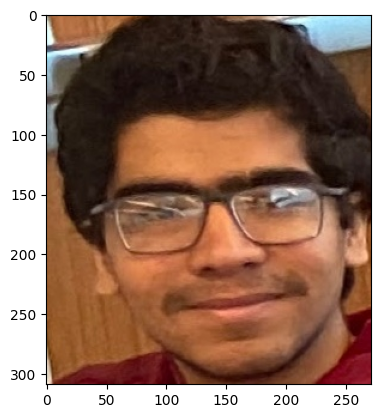

No faces found in the image
1/1 [==============================] - 0s 51ms/step


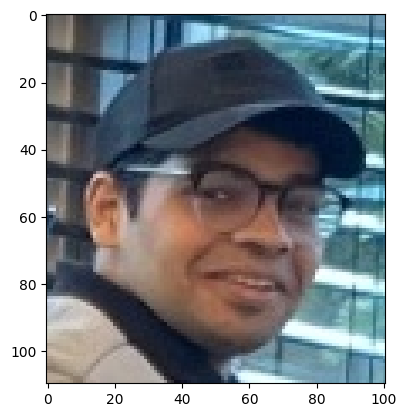

No faces found in the image
1/1 [==============================] - 0s 24ms/step


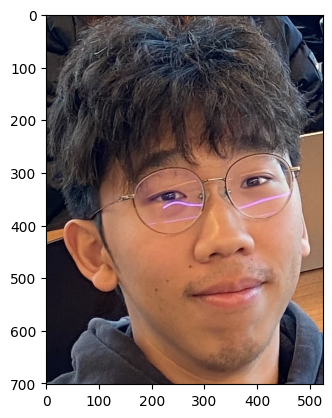

No faces found in the image
1/1 [==============================] - 0s 27ms/step


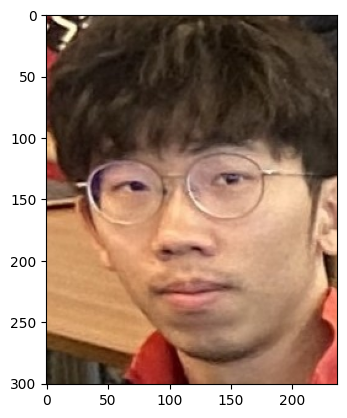

No faces found in the image
1/1 [==============================] - 0s 28ms/step


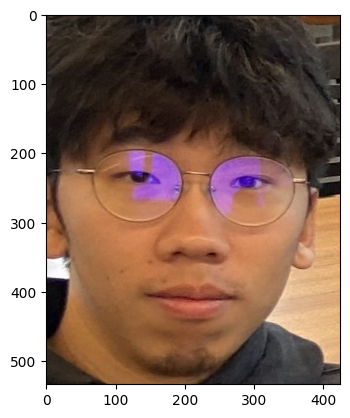

No faces found in the image
1/1 [==============================] - 0s 54ms/step


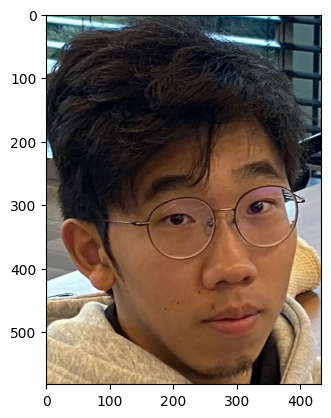

No faces found in the image
1/1 [==============================] - 0s 66ms/step


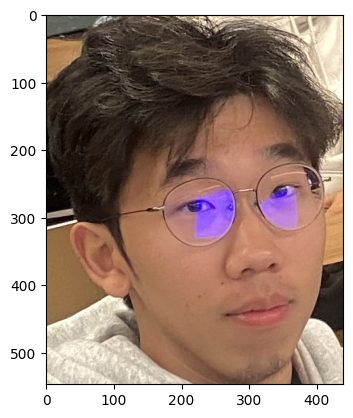

No faces found in the image
1/1 [==============================] - 0s 61ms/step


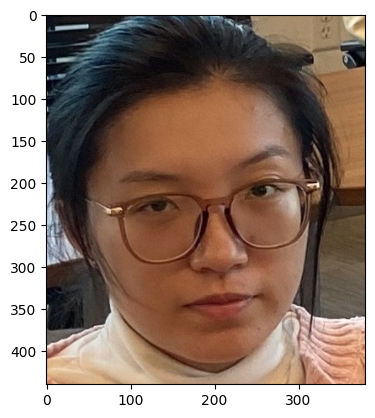

No faces found in the image
1/1 [==============================] - 0s 46ms/step


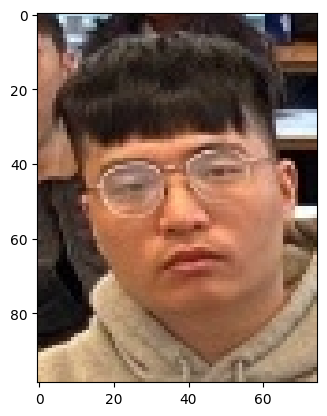

No faces found in the image
1/1 [==============================] - 0s 31ms/step


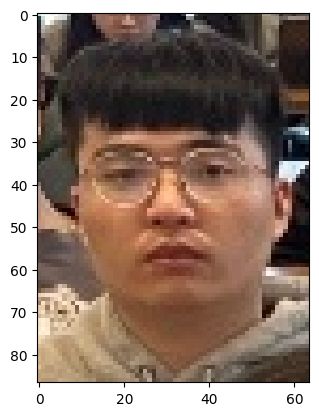

No faces found in the image
1/1 [==============================] - 0s 31ms/step


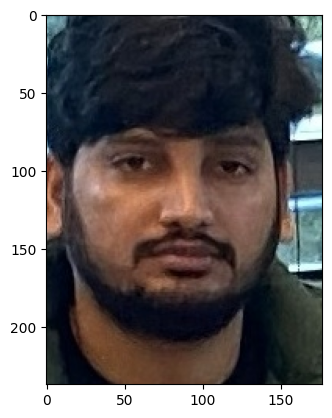

No faces found in the image
1/1 [==============================] - 0s 34ms/step


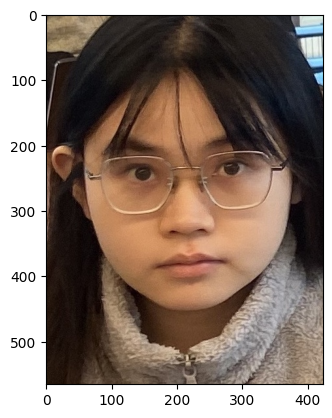

No faces found in the image
1/1 [==============================] - 0s 53ms/step


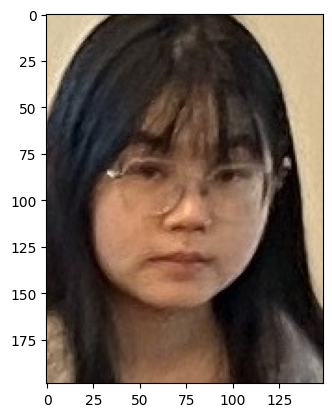

No faces found in the image
1/1 [==============================] - 0s 41ms/step


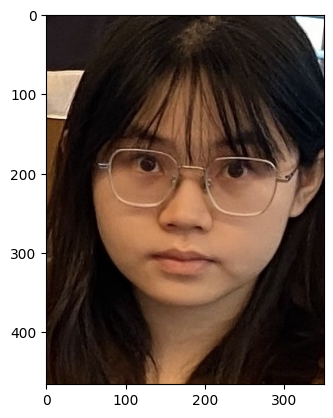

No faces found in the image
1/1 [==============================] - 0s 64ms/step


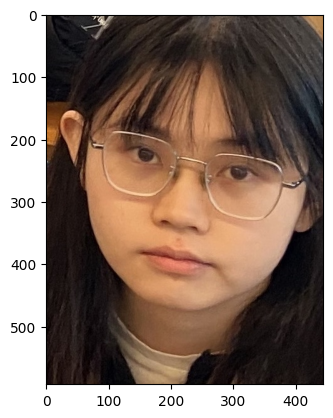

No faces found in the image
1/1 [==============================] - 0s 56ms/step


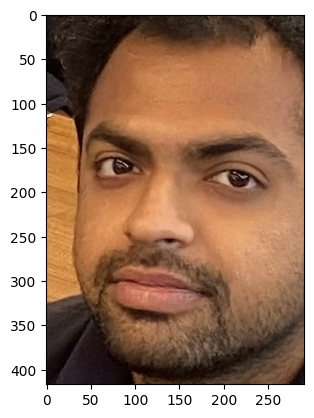

No faces found in the image
1/1 [==============================] - 0s 56ms/step


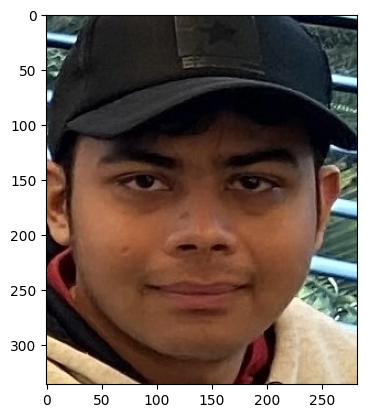

No faces found in the image
Processing completed.


In [9]:
from mtcnn.mtcnn import MTCNN
input_directory = '/content/training'
output_directory = '/content/faces'

detector = MTCNN()

for root, dirs, files in os.walk(input_directory):
    for file in files:
        original_file_path = os.path.join(root, file)
        relative_path = os.path.relpath(original_file_path, input_directory)
        output_file_path = os.path.join(output_directory, relative_path)
        output_subdirectory = os.path.dirname(output_file_path)
        if not os.path.exists(output_subdirectory):
            os.makedirs(output_subdirectory)

        image = cv2.imread(original_file_path)
        faces = detector.detect_faces(image)

        if len(faces) > 0:
            x, y, w, h = faces[0]['box']
            cropped_face = image[y:y+h, x:x+w]
            cv2.imwrite(output_file_path, cropped_face)
        else:
            cv2.imwrite(output_file_path, image)
            img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            plt.imshow(img)
            plt.show()
            print(f"No faces found in the image")

print("Processing completed.")

In [10]:
cropped_folder = '/content/faces'

# Function to count the number of image files in a directory
def count_images(directory):
    total_images = 0
    # Iterate over all files and subdirectories in the directory
    for root, dirs, files in os.walk(directory):
        # Filter image files
        image_files = [file for file in files if file.lower().endswith(('.jpeg'))]
        # Add the count of image files in this directory to the total
        total_images += len(image_files)
    return total_images

# Count the number of images in the cropped folder
num_images_cropped = count_images(cropped_folder)
print("Number of images after cropping the faces", num_images_cropped)


Number of images after cropping the faces 268


In [11]:
import os
import cv2
import numpy as np
from mtcnn.mtcnn import MTCNN

def augment_cropped_images(input_directory, output_directory):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    detector = MTCNN()
    flip_horizontal = True
    brightness_factors = [0.7, 1.3]
    rotation_angles = [-15, 15]
    for root, dirs, files in os.walk(input_directory):
        for file in files:
            original_file_path = os.path.join(root, file)
            relative_path = os.path.relpath(original_file_path, input_directory)
            output_file_path = os.path.join(output_directory, relative_path)
            output_subdirectory = os.path.dirname(output_file_path)
            if not os.path.exists(output_subdirectory):
                os.makedirs(output_subdirectory)

            image = cv2.imread(original_file_path)
            augmented_images = [image]
            if flip_horizontal:
                flipped_img = cv2.flip(image, 1)
                augmented_images.append(flipped_img)

            for factor in brightness_factors:
                adjusted_img = adjust_brightness(image, factor)
                augmented_images.append(adjusted_img)

            for angle in rotation_angles:
                rotated_img = rotate_image(image, angle)
                augmented_images.append(rotated_img)


            for i, augmented_img in enumerate(augmented_images):
                output_file_path = os.path.join(output_subdirectory, f"{file.split('.')[0]}_{i}.jpg")
                cv2.imwrite(output_file_path, augmented_img)

def adjust_brightness(image, factor):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hsv[..., 2] = np.clip(hsv[..., 2] * factor, 0, 255)
    adjusted_img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return adjusted_img

def rotate_image(image, angle):
    height, width = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    return rotated_image

input_directory = "/content/faces"
output_directory = "/content/augmented"
augment_cropped_images(input_directory, output_directory)


In [12]:
def count_images_in_folder(folder_path):
    count = 0
    for root, dirs, files in os.walk(folder_path):
        count += len(files)
    return count

output_directory = "/content/augmented"
num_images_after_augmentation = count_images_in_folder(output_directory)
print("Number of images after augmentation:", num_images_after_augmentation)

Number of images after augmentation: 1608


In [13]:
def load_data(directory):
    x = []
    y = []
    for label in os.listdir(directory):
        for filename in os.listdir(os.path.join(directory, label)):
            x.append(os.path.join(directory, label, filename))
            y.append(label)
    return x, y

In [14]:
augmented_images_dataset = '/content/augmented'
train=pd.DataFrame()
train['image'], train['label']=load_data(augmented_images_dataset)
print(train)

                                                  image                 label
0     /content/augmented/kodipunzulanandini/0109_1_0...    kodipunzulanandini
1     /content/augmented/kodipunzulanandini/0116_19_...    kodipunzulanandini
2     /content/augmented/kodipunzulanandini/0201_24_...    kodipunzulanandini
3     /content/augmented/kodipunzulanandini/0109_1_4...    kodipunzulanandini
4     /content/augmented/kodipunzulanandini/0111_16_...    kodipunzulanandini
...                                                 ...                   ...
1603  /content/augmented/virvadianisargjyotin/0206_2...  virvadianisargjyotin
1604  /content/augmented/virvadianisargjyotin/0109_2...  virvadianisargjyotin
1605  /content/augmented/virvadianisargjyotin/0123_2...  virvadianisargjyotin
1606  /content/augmented/virvadianisargjyotin/0116_2...  virvadianisargjyotin
1607  /content/augmented/virvadianisargjyotin/0206_2...  virvadianisargjyotin

[1608 rows x 2 columns]


In [15]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
train['label'] = train['label'].astype(str).str.replace(" ", "").str.lower()
le = LabelEncoder()
le.fit(train['label'])
y_train_encoded = le.transform(train['label'])


In [16]:
from PIL import Image
from keras.preprocessing import image
def extract_features_facenet(images):
    feature_list = []
    model = FaceNet()
    for img_path in tqdm(images):
        img = image.load_img(img_path, target_size=(160, 160))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        embeddings = model.embeddings(img_array)
        feature_list.append(embeddings)

    features = np.vstack(feature_list)
    return features

In [17]:
from sklearn.model_selection import train_test_split
train_features1 = extract_features_facenet(train['image'])
x_train, x_test, y_train, y_test = train_test_split(train_features1, y_train_encoded, test_size=0.2, random_state=42)
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

  0%|          | 0/1608 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


  0%|          | 1/1608 [00:02<1:18:01,  2.91s/it]

1/1 [==============================] - 0s 168ms/step


  0%|          | 2/1608 [00:03<36:26,  1.36s/it]  

1/1 [==============================] - 0s 155ms/step


  0%|          | 3/1608 [00:03<23:03,  1.16it/s]

1/1 [==============================] - 0s 165ms/step


  0%|          | 4/1608 [00:03<16:39,  1.60it/s]

1/1 [==============================] - 0s 161ms/step


  0%|          | 5/1608 [00:03<13:15,  2.02it/s]

1/1 [==============================] - 0s 164ms/step


  0%|          | 6/1608 [00:04<11:06,  2.40it/s]

1/1 [==============================] - 0s 174ms/step


  0%|          | 7/1608 [00:04<10:11,  2.62it/s]

1/1 [==============================] - 0s 182ms/step


  0%|          | 8/1608 [00:04<09:36,  2.78it/s]

1/1 [==============================] - 0s 166ms/step


  1%|          | 9/1608 [00:05<09:02,  2.95it/s]

1/1 [==============================] - 0s 174ms/step


  1%|          | 10/1608 [00:05<08:37,  3.09it/s]

1/1 [==============================] - 0s 102ms/step


  1%|          | 11/1608 [00:05<07:45,  3.43it/s]

1/1 [==============================] - 0s 105ms/step


  1%|          | 12/1608 [00:05<07:16,  3.65it/s]

1/1 [==============================] - 0s 109ms/step


  1%|          | 13/1608 [00:06<07:02,  3.78it/s]

1/1 [==============================] - 0s 116ms/step


  1%|          | 14/1608 [00:06<06:50,  3.88it/s]

1/1 [==============================] - 0s 107ms/step


  1%|          | 15/1608 [00:06<06:15,  4.24it/s]

1/1 [==============================] - 0s 116ms/step


  1%|          | 16/1608 [00:06<06:02,  4.40it/s]

1/1 [==============================] - 0s 115ms/step


  1%|          | 17/1608 [00:06<05:45,  4.61it/s]

1/1 [==============================] - 0s 105ms/step


  1%|          | 18/1608 [00:07<05:55,  4.47it/s]

1/1 [==============================] - 0s 104ms/step


  1%|          | 19/1608 [00:07<06:04,  4.35it/s]

1/1 [==============================] - 0s 105ms/step


  1%|          | 20/1608 [00:07<06:07,  4.32it/s]

1/1 [==============================] - 0s 104ms/step


  1%|▏         | 21/1608 [00:07<05:41,  4.65it/s]

1/1 [==============================] - 0s 105ms/step


  1%|▏         | 22/1608 [00:08<05:28,  4.83it/s]

1/1 [==============================] - 0s 105ms/step


  1%|▏         | 23/1608 [00:08<05:17,  5.00it/s]

1/1 [==============================] - 0s 100ms/step


  1%|▏         | 24/1608 [00:08<05:35,  4.72it/s]

1/1 [==============================] - 0s 105ms/step


  2%|▏         | 25/1608 [00:08<05:28,  4.82it/s]

1/1 [==============================] - 0s 107ms/step


  2%|▏         | 26/1608 [00:08<05:42,  4.62it/s]

1/1 [==============================] - 0s 103ms/step


  2%|▏         | 27/1608 [00:09<05:30,  4.79it/s]

1/1 [==============================] - 0s 93ms/step


  2%|▏         | 28/1608 [00:09<05:09,  5.10it/s]

1/1 [==============================] - 0s 93ms/step


  2%|▏         | 29/1608 [00:09<04:52,  5.40it/s]

1/1 [==============================] - 0s 93ms/step


  2%|▏         | 30/1608 [00:09<04:41,  5.60it/s]

1/1 [==============================] - 0s 96ms/step


  2%|▏         | 31/1608 [00:09<05:04,  5.17it/s]

1/1 [==============================] - 0s 107ms/step


  2%|▏         | 32/1608 [00:10<05:17,  4.96it/s]

1/1 [==============================] - 0s 92ms/step


  2%|▏         | 33/1608 [00:10<04:56,  5.32it/s]

1/1 [==============================] - 0s 90ms/step


  2%|▏         | 34/1608 [00:10<04:46,  5.49it/s]

1/1 [==============================] - 0s 91ms/step


  2%|▏         | 35/1608 [00:10<04:33,  5.75it/s]

1/1 [==============================] - 0s 97ms/step


  2%|▏         | 36/1608 [00:10<04:57,  5.28it/s]

1/1 [==============================] - 0s 94ms/step


  2%|▏         | 37/1608 [00:10<04:45,  5.50it/s]

1/1 [==============================] - 0s 114ms/step


  2%|▏         | 38/1608 [00:11<05:09,  5.08it/s]

1/1 [==============================] - 0s 103ms/step


  2%|▏         | 39/1608 [00:11<04:59,  5.24it/s]

1/1 [==============================] - 0s 110ms/step


  2%|▏         | 40/1608 [00:11<05:20,  4.90it/s]

1/1 [==============================] - 0s 105ms/step


  3%|▎         | 41/1608 [00:11<05:36,  4.66it/s]

1/1 [==============================] - 0s 101ms/step


  3%|▎         | 42/1608 [00:12<05:47,  4.51it/s]

1/1 [==============================] - 0s 106ms/step


  3%|▎         | 43/1608 [00:12<05:38,  4.63it/s]

1/1 [==============================] - 0s 101ms/step


  3%|▎         | 44/1608 [00:12<05:20,  4.89it/s]

1/1 [==============================] - 0s 101ms/step


  3%|▎         | 45/1608 [00:12<05:36,  4.64it/s]

1/1 [==============================] - 0s 108ms/step


  3%|▎         | 46/1608 [00:12<05:20,  4.87it/s]

1/1 [==============================] - 0s 100ms/step


  3%|▎         | 47/1608 [00:13<05:06,  5.10it/s]

1/1 [==============================] - 0s 105ms/step


  3%|▎         | 48/1608 [00:13<05:04,  5.12it/s]

1/1 [==============================] - 0s 105ms/step


  3%|▎         | 49/1608 [00:13<05:21,  4.85it/s]

1/1 [==============================] - 0s 107ms/step


  3%|▎         | 50/1608 [00:13<05:11,  5.00it/s]

1/1 [==============================] - 0s 105ms/step


  3%|▎         | 51/1608 [00:13<05:26,  4.76it/s]

1/1 [==============================] - 0s 101ms/step


  3%|▎         | 52/1608 [00:14<05:45,  4.51it/s]

1/1 [==============================] - 0s 100ms/step


  3%|▎         | 53/1608 [00:14<05:54,  4.39it/s]

1/1 [==============================] - 0s 101ms/step


  3%|▎         | 54/1608 [00:14<05:57,  4.35it/s]

1/1 [==============================] - 0s 102ms/step


  3%|▎         | 55/1608 [00:14<06:01,  4.29it/s]

1/1 [==============================] - 0s 104ms/step


  3%|▎         | 56/1608 [00:15<06:02,  4.28it/s]

1/1 [==============================] - 0s 120ms/step


  4%|▎         | 57/1608 [00:15<05:45,  4.49it/s]

1/1 [==============================] - 0s 102ms/step


  4%|▎         | 58/1608 [00:15<05:27,  4.73it/s]

1/1 [==============================] - 0s 137ms/step


  4%|▎         | 59/1608 [00:15<05:29,  4.71it/s]

1/1 [==============================] - 0s 171ms/step


  4%|▎         | 60/1608 [00:15<05:59,  4.31it/s]

1/1 [==============================] - 0s 172ms/step


  4%|▍         | 61/1608 [00:16<06:28,  3.99it/s]

1/1 [==============================] - 0s 167ms/step


  4%|▍         | 62/1608 [00:16<06:41,  3.85it/s]

1/1 [==============================] - 0s 172ms/step


  4%|▍         | 63/1608 [00:16<06:52,  3.74it/s]

1/1 [==============================] - 0s 170ms/step


  4%|▍         | 64/1608 [00:17<07:00,  3.67it/s]

1/1 [==============================] - 0s 172ms/step


  4%|▍         | 65/1608 [00:17<07:06,  3.62it/s]

1/1 [==============================] - 0s 148ms/step


  4%|▍         | 66/1608 [00:17<07:05,  3.62it/s]

1/1 [==============================] - 0s 151ms/step


  4%|▍         | 67/1608 [00:17<06:51,  3.75it/s]

1/1 [==============================] - 0s 150ms/step


  4%|▍         | 68/1608 [00:18<06:38,  3.87it/s]

1/1 [==============================] - 0s 176ms/step


  4%|▍         | 69/1608 [00:18<06:52,  3.73it/s]

1/1 [==============================] - 0s 172ms/step


  4%|▍         | 70/1608 [00:18<07:09,  3.58it/s]

1/1 [==============================] - 0s 164ms/step


  4%|▍         | 71/1608 [00:19<07:12,  3.55it/s]

1/1 [==============================] - 0s 165ms/step


  4%|▍         | 72/1608 [00:19<07:12,  3.55it/s]

1/1 [==============================] - 0s 105ms/step


  5%|▍         | 73/1608 [00:19<06:51,  3.73it/s]

1/1 [==============================] - 0s 96ms/step


  5%|▍         | 74/1608 [00:19<06:30,  3.93it/s]

1/1 [==============================] - 0s 97ms/step


  5%|▍         | 75/1608 [00:19<05:47,  4.41it/s]

1/1 [==============================] - 0s 90ms/step


  5%|▍         | 76/1608 [00:20<05:44,  4.45it/s]

1/1 [==============================] - 0s 91ms/step


  5%|▍         | 77/1608 [00:20<05:45,  4.43it/s]

1/1 [==============================] - 0s 89ms/step


  5%|▍         | 78/1608 [00:20<05:49,  4.38it/s]

1/1 [==============================] - 0s 94ms/step


  5%|▍         | 79/1608 [00:20<05:26,  4.68it/s]

1/1 [==============================] - 0s 92ms/step


  5%|▍         | 80/1608 [00:20<05:04,  5.01it/s]

1/1 [==============================] - 0s 93ms/step


  5%|▌         | 81/1608 [00:21<04:46,  5.34it/s]

1/1 [==============================] - 0s 100ms/step


  5%|▌         | 82/1608 [00:21<04:38,  5.48it/s]

1/1 [==============================] - 0s 119ms/step


  5%|▌         | 83/1608 [00:21<05:04,  5.00it/s]

1/1 [==============================] - 0s 105ms/step


  5%|▌         | 84/1608 [00:21<04:58,  5.10it/s]

1/1 [==============================] - 0s 103ms/step


  5%|▌         | 85/1608 [00:21<05:16,  4.82it/s]

1/1 [==============================] - 0s 100ms/step


  5%|▌         | 86/1608 [00:22<05:27,  4.64it/s]

1/1 [==============================] - 0s 103ms/step


  5%|▌         | 87/1608 [00:22<05:36,  4.52it/s]

1/1 [==============================] - 0s 104ms/step


  5%|▌         | 88/1608 [00:22<05:27,  4.63it/s]

1/1 [==============================] - 0s 101ms/step


  6%|▌         | 89/1608 [00:22<05:38,  4.49it/s]

1/1 [==============================] - 0s 102ms/step


  6%|▌         | 90/1608 [00:23<05:46,  4.38it/s]

1/1 [==============================] - 0s 103ms/step


  6%|▌         | 91/1608 [00:23<05:50,  4.33it/s]

1/1 [==============================] - 0s 109ms/step


  6%|▌         | 92/1608 [00:23<05:50,  4.32it/s]

1/1 [==============================] - 0s 109ms/step


  6%|▌         | 93/1608 [00:23<05:54,  4.27it/s]

1/1 [==============================] - 0s 106ms/step


  6%|▌         | 94/1608 [00:23<05:33,  4.54it/s]

1/1 [==============================] - 0s 106ms/step


  6%|▌         | 95/1608 [00:24<05:20,  4.72it/s]

1/1 [==============================] - 0s 103ms/step


  6%|▌         | 96/1608 [00:24<05:09,  4.89it/s]

1/1 [==============================] - 0s 119ms/step


  6%|▌         | 97/1608 [00:24<05:16,  4.77it/s]

1/1 [==============================] - 0s 101ms/step


  6%|▌         | 98/1608 [00:24<05:30,  4.57it/s]

1/1 [==============================] - 0s 103ms/step


  6%|▌         | 99/1608 [00:25<05:37,  4.46it/s]

1/1 [==============================] - 0s 102ms/step


  6%|▌         | 100/1608 [00:25<05:16,  4.77it/s]

1/1 [==============================] - 0s 101ms/step


  6%|▋         | 101/1608 [00:25<05:01,  5.00it/s]

1/1 [==============================] - 0s 120ms/step


  6%|▋         | 102/1608 [00:25<05:00,  5.01it/s]

1/1 [==============================] - 0s 101ms/step


  6%|▋         | 103/1608 [00:25<05:16,  4.75it/s]

1/1 [==============================] - 0s 105ms/step


  6%|▋         | 104/1608 [00:26<05:07,  4.90it/s]

1/1 [==============================] - 0s 99ms/step


  7%|▋         | 105/1608 [00:26<04:53,  5.13it/s]

1/1 [==============================] - 0s 100ms/step


  7%|▋         | 106/1608 [00:26<05:11,  4.83it/s]

1/1 [==============================] - 0s 116ms/step


  7%|▋         | 107/1608 [00:26<05:29,  4.55it/s]

1/1 [==============================] - 0s 107ms/step


  7%|▋         | 108/1608 [00:26<05:14,  4.77it/s]

1/1 [==============================] - 0s 102ms/step


  7%|▋         | 109/1608 [00:27<05:00,  4.99it/s]

1/1 [==============================] - 0s 103ms/step


  7%|▋         | 110/1608 [00:27<04:52,  5.13it/s]

1/1 [==============================] - 0s 101ms/step


  7%|▋         | 111/1608 [00:27<05:08,  4.85it/s]

1/1 [==============================] - 0s 117ms/step


  7%|▋         | 112/1608 [00:27<05:21,  4.65it/s]

1/1 [==============================] - 0s 104ms/step


  7%|▋         | 113/1608 [00:27<05:03,  4.93it/s]

1/1 [==============================] - 0s 100ms/step


  7%|▋         | 114/1608 [00:28<04:53,  5.08it/s]

1/1 [==============================] - 0s 101ms/step


  7%|▋         | 115/1608 [00:28<04:46,  5.21it/s]

1/1 [==============================] - 0s 100ms/step


  7%|▋         | 116/1608 [00:28<04:46,  5.21it/s]

1/1 [==============================] - 0s 107ms/step


  7%|▋         | 117/1608 [00:28<04:47,  5.19it/s]

1/1 [==============================] - 0s 105ms/step


  7%|▋         | 118/1608 [00:28<04:48,  5.17it/s]

1/1 [==============================] - 0s 100ms/step


  7%|▋         | 119/1608 [00:29<05:06,  4.86it/s]

1/1 [==============================] - 0s 103ms/step


  7%|▋         | 120/1608 [00:29<04:54,  5.06it/s]

1/1 [==============================] - 0s 177ms/step


  8%|▊         | 121/1608 [00:29<05:35,  4.43it/s]

1/1 [==============================] - 0s 180ms/step


  8%|▊         | 122/1608 [00:29<06:07,  4.04it/s]

1/1 [==============================] - 0s 160ms/step


  8%|▊         | 123/1608 [00:30<06:20,  3.90it/s]

1/1 [==============================] - 0s 162ms/step


  8%|▊         | 124/1608 [00:30<06:29,  3.81it/s]

1/1 [==============================] - 0s 163ms/step


  8%|▊         | 125/1608 [00:30<06:37,  3.73it/s]

1/1 [==============================] - 0s 184ms/step


  8%|▊         | 126/1608 [00:31<07:55,  3.11it/s]

1/1 [==============================] - 0s 165ms/step


  8%|▊         | 127/1608 [00:31<07:34,  3.26it/s]

1/1 [==============================] - 0s 171ms/step


  8%|▊         | 128/1608 [00:31<07:27,  3.31it/s]

1/1 [==============================] - 0s 182ms/step


  8%|▊         | 129/1608 [00:31<07:23,  3.33it/s]

1/1 [==============================] - 0s 170ms/step


  8%|▊         | 130/1608 [00:32<07:16,  3.39it/s]

1/1 [==============================] - 0s 165ms/step


  8%|▊         | 131/1608 [00:32<07:09,  3.44it/s]

1/1 [==============================] - 0s 163ms/step


  8%|▊         | 132/1608 [00:32<07:04,  3.48it/s]

1/1 [==============================] - 0s 131ms/step


  8%|▊         | 133/1608 [00:33<07:04,  3.48it/s]

1/1 [==============================] - 0s 106ms/step


  8%|▊         | 134/1608 [00:33<06:44,  3.65it/s]

1/1 [==============================] - 0s 99ms/step


  8%|▊         | 135/1608 [00:33<06:00,  4.09it/s]

1/1 [==============================] - 0s 99ms/step


  8%|▊         | 136/1608 [00:33<05:24,  4.54it/s]

1/1 [==============================] - 0s 92ms/step


  9%|▊         | 137/1608 [00:33<04:57,  4.94it/s]

1/1 [==============================] - 0s 101ms/step


  9%|▊         | 138/1608 [00:34<04:43,  5.18it/s]

1/1 [==============================] - 0s 89ms/step


  9%|▊         | 139/1608 [00:34<04:31,  5.41it/s]

1/1 [==============================] - 0s 93ms/step


  9%|▊         | 140/1608 [00:34<04:47,  5.11it/s]

1/1 [==============================] - 0s 94ms/step


  9%|▉         | 141/1608 [00:34<04:30,  5.41it/s]

1/1 [==============================] - 0s 89ms/step


  9%|▉         | 142/1608 [00:34<04:47,  5.10it/s]

1/1 [==============================] - 0s 91ms/step


  9%|▉         | 143/1608 [00:35<05:02,  4.84it/s]

1/1 [==============================] - 0s 90ms/step


  9%|▉         | 144/1608 [00:35<05:16,  4.62it/s]

1/1 [==============================] - 0s 92ms/step


  9%|▉         | 145/1608 [00:35<05:21,  4.55it/s]

1/1 [==============================] - 0s 101ms/step


  9%|▉         | 146/1608 [00:35<05:24,  4.51it/s]

1/1 [==============================] - 0s 104ms/step


  9%|▉         | 147/1608 [00:35<05:31,  4.41it/s]

1/1 [==============================] - 0s 116ms/step


  9%|▉         | 148/1608 [00:36<05:17,  4.60it/s]

1/1 [==============================] - 0s 100ms/step


  9%|▉         | 149/1608 [00:36<05:26,  4.47it/s]

1/1 [==============================] - 0s 101ms/step


  9%|▉         | 150/1608 [00:36<05:31,  4.39it/s]

1/1 [==============================] - 0s 104ms/step


  9%|▉         | 151/1608 [00:36<05:35,  4.35it/s]

1/1 [==============================] - 0s 108ms/step


  9%|▉         | 152/1608 [00:37<05:42,  4.25it/s]

1/1 [==============================] - 0s 105ms/step


 10%|▉         | 153/1608 [00:37<05:45,  4.22it/s]

1/1 [==============================] - 0s 103ms/step


 10%|▉         | 154/1608 [00:37<05:19,  4.55it/s]

1/1 [==============================] - 0s 104ms/step


 10%|▉         | 155/1608 [00:37<05:29,  4.41it/s]

1/1 [==============================] - 0s 103ms/step


 10%|▉         | 156/1608 [00:37<05:11,  4.66it/s]

1/1 [==============================] - 0s 106ms/step


 10%|▉         | 157/1608 [00:38<05:18,  4.55it/s]

1/1 [==============================] - 0s 103ms/step


 10%|▉         | 158/1608 [00:38<05:24,  4.47it/s]

1/1 [==============================] - 0s 103ms/step


 10%|▉         | 159/1608 [00:38<05:33,  4.35it/s]

1/1 [==============================] - 0s 101ms/step


 10%|▉         | 160/1608 [00:38<05:29,  4.39it/s]

1/1 [==============================] - 0s 91ms/step


 10%|█         | 161/1608 [00:39<05:30,  4.38it/s]

1/1 [==============================] - 0s 93ms/step


 10%|█         | 162/1608 [00:39<05:34,  4.33it/s]

1/1 [==============================] - 0s 94ms/step


 10%|█         | 163/1608 [00:39<05:32,  4.35it/s]

1/1 [==============================] - 0s 104ms/step


 10%|█         | 164/1608 [00:39<05:06,  4.71it/s]

1/1 [==============================] - 0s 101ms/step


 10%|█         | 165/1608 [00:39<05:15,  4.57it/s]

1/1 [==============================] - 0s 100ms/step


 10%|█         | 166/1608 [00:40<04:55,  4.88it/s]

1/1 [==============================] - 0s 103ms/step


 10%|█         | 167/1608 [00:40<04:51,  4.94it/s]

1/1 [==============================] - 0s 103ms/step


 10%|█         | 168/1608 [00:40<04:39,  5.15it/s]

1/1 [==============================] - 0s 107ms/step


 11%|█         | 169/1608 [00:40<04:36,  5.21it/s]

1/1 [==============================] - 0s 96ms/step


 11%|█         | 170/1608 [00:40<04:28,  5.35it/s]

1/1 [==============================] - 0s 91ms/step


 11%|█         | 171/1608 [00:41<04:44,  5.05it/s]

1/1 [==============================] - 0s 105ms/step


 11%|█         | 172/1608 [00:41<04:56,  4.84it/s]

1/1 [==============================] - 0s 95ms/step


 11%|█         | 173/1608 [00:41<04:36,  5.19it/s]

1/1 [==============================] - 0s 90ms/step


 11%|█         | 174/1608 [00:41<04:52,  4.90it/s]

1/1 [==============================] - 0s 93ms/step


 11%|█         | 175/1608 [00:41<05:03,  4.71it/s]

1/1 [==============================] - 0s 102ms/step


 11%|█         | 176/1608 [00:42<04:46,  5.01it/s]

1/1 [==============================] - 0s 111ms/step


 11%|█         | 177/1608 [00:42<04:57,  4.82it/s]

1/1 [==============================] - 0s 100ms/step


 11%|█         | 178/1608 [00:42<05:07,  4.65it/s]

1/1 [==============================] - 0s 109ms/step


 11%|█         | 179/1608 [00:42<04:59,  4.77it/s]

1/1 [==============================] - 0s 110ms/step


 11%|█         | 180/1608 [00:42<04:52,  4.88it/s]

1/1 [==============================] - 0s 155ms/step


 11%|█▏        | 181/1608 [00:43<05:18,  4.48it/s]

1/1 [==============================] - 0s 157ms/step


 11%|█▏        | 182/1608 [00:43<05:48,  4.09it/s]

1/1 [==============================] - 0s 173ms/step


 11%|█▏        | 183/1608 [00:43<06:04,  3.91it/s]

1/1 [==============================] - 0s 167ms/step


 11%|█▏        | 184/1608 [00:44<06:11,  3.84it/s]

1/1 [==============================] - 0s 169ms/step


 12%|█▏        | 185/1608 [00:44<07:24,  3.20it/s]

1/1 [==============================] - 0s 182ms/step


 12%|█▏        | 186/1608 [00:44<08:21,  2.84it/s]

1/1 [==============================] - 0s 169ms/step


 12%|█▏        | 187/1608 [00:45<07:53,  3.00it/s]

1/1 [==============================] - 0s 205ms/step


 12%|█▏        | 188/1608 [00:45<08:56,  2.65it/s]

1/1 [==============================] - 0s 174ms/step


 12%|█▏        | 189/1608 [00:46<08:36,  2.75it/s]

1/1 [==============================] - 0s 164ms/step


 12%|█▏        | 190/1608 [00:46<08:02,  2.94it/s]

1/1 [==============================] - 0s 152ms/step


 12%|█▏        | 191/1608 [00:46<07:53,  2.99it/s]

1/1 [==============================] - 0s 119ms/step


 12%|█▏        | 192/1608 [00:46<06:58,  3.39it/s]

1/1 [==============================] - 0s 106ms/step


 12%|█▏        | 193/1608 [00:47<06:32,  3.60it/s]

1/1 [==============================] - 0s 106ms/step


 12%|█▏        | 194/1608 [00:47<05:52,  4.01it/s]

1/1 [==============================] - 0s 108ms/step


 12%|█▏        | 195/1608 [00:47<05:52,  4.00it/s]

1/1 [==============================] - 0s 107ms/step


 12%|█▏        | 196/1608 [00:47<05:55,  3.97it/s]

1/1 [==============================] - 0s 111ms/step


 12%|█▏        | 197/1608 [00:48<05:57,  3.95it/s]

1/1 [==============================] - 0s 95ms/step


 12%|█▏        | 198/1608 [00:48<05:22,  4.37it/s]

1/1 [==============================] - 0s 95ms/step


 12%|█▏        | 199/1608 [00:48<04:57,  4.74it/s]

1/1 [==============================] - 0s 114ms/step


 12%|█▏        | 200/1608 [00:48<05:13,  4.49it/s]

1/1 [==============================] - 0s 98ms/step


 12%|█▎        | 201/1608 [00:48<04:50,  4.84it/s]

1/1 [==============================] - 0s 101ms/step


 13%|█▎        | 202/1608 [00:49<05:08,  4.56it/s]

1/1 [==============================] - 0s 103ms/step


 13%|█▎        | 203/1608 [00:49<04:50,  4.83it/s]

1/1 [==============================] - 0s 103ms/step


 13%|█▎        | 204/1608 [00:49<05:04,  4.62it/s]

1/1 [==============================] - 0s 114ms/step


 13%|█▎        | 205/1608 [00:49<04:54,  4.77it/s]

1/1 [==============================] - 0s 102ms/step


 13%|█▎        | 206/1608 [00:49<05:09,  4.52it/s]

1/1 [==============================] - 0s 99ms/step


 13%|█▎        | 207/1608 [00:50<05:12,  4.48it/s]

1/1 [==============================] - 0s 93ms/step


 13%|█▎        | 208/1608 [00:50<05:15,  4.44it/s]

1/1 [==============================] - 0s 89ms/step


 13%|█▎        | 209/1608 [00:50<05:15,  4.43it/s]

1/1 [==============================] - 0s 90ms/step


 13%|█▎        | 210/1608 [00:50<05:17,  4.40it/s]

1/1 [==============================] - 0s 104ms/step


 13%|█▎        | 211/1608 [00:51<05:17,  4.40it/s]

1/1 [==============================] - 0s 101ms/step


 13%|█▎        | 212/1608 [00:51<05:19,  4.37it/s]

1/1 [==============================] - 0s 100ms/step


 13%|█▎        | 213/1608 [00:51<05:20,  4.35it/s]

1/1 [==============================] - 0s 114ms/step


 13%|█▎        | 214/1608 [00:51<05:25,  4.29it/s]

1/1 [==============================] - 0s 103ms/step


 13%|█▎        | 215/1608 [00:51<05:08,  4.51it/s]

1/1 [==============================] - 0s 93ms/step


 13%|█▎        | 216/1608 [00:52<05:10,  4.48it/s]

1/1 [==============================] - 0s 91ms/step


 13%|█▎        | 217/1608 [00:52<05:13,  4.43it/s]

1/1 [==============================] - 0s 94ms/step


 14%|█▎        | 218/1608 [00:52<04:46,  4.85it/s]

1/1 [==============================] - 0s 102ms/step


 14%|█▎        | 219/1608 [00:52<04:56,  4.69it/s]

1/1 [==============================] - 0s 90ms/step


 14%|█▎        | 220/1608 [00:52<04:31,  5.12it/s]

1/1 [==============================] - 0s 100ms/step


 14%|█▎        | 221/1608 [00:53<04:28,  5.17it/s]

1/1 [==============================] - 0s 104ms/step


 14%|█▍        | 222/1608 [00:53<04:45,  4.86it/s]

1/1 [==============================] - 0s 99ms/step


 14%|█▍        | 223/1608 [00:53<04:33,  5.06it/s]

1/1 [==============================] - 0s 119ms/step


 14%|█▍        | 224/1608 [00:53<04:55,  4.69it/s]

1/1 [==============================] - 0s 103ms/step


 14%|█▍        | 225/1608 [00:54<05:04,  4.55it/s]

1/1 [==============================] - 0s 102ms/step


 14%|█▍        | 226/1608 [00:54<04:48,  4.79it/s]

1/1 [==============================] - 0s 103ms/step


 14%|█▍        | 227/1608 [00:54<05:00,  4.60it/s]

1/1 [==============================] - 0s 106ms/step


 14%|█▍        | 228/1608 [00:54<05:06,  4.50it/s]

1/1 [==============================] - 0s 107ms/step


 14%|█▍        | 229/1608 [00:54<05:15,  4.37it/s]

1/1 [==============================] - 0s 105ms/step


 14%|█▍        | 230/1608 [00:55<04:54,  4.67it/s]

1/1 [==============================] - 0s 94ms/step


 14%|█▍        | 231/1608 [00:55<04:59,  4.60it/s]

1/1 [==============================] - 0s 96ms/step


 14%|█▍        | 232/1608 [00:55<05:02,  4.55it/s]

1/1 [==============================] - 0s 94ms/step


 14%|█▍        | 233/1608 [00:55<05:05,  4.50it/s]

1/1 [==============================] - 0s 96ms/step


 15%|█▍        | 234/1608 [00:56<04:49,  4.74it/s]

1/1 [==============================] - 0s 107ms/step


 15%|█▍        | 235/1608 [00:56<04:39,  4.92it/s]

1/1 [==============================] - 0s 107ms/step


 15%|█▍        | 236/1608 [00:56<04:35,  4.97it/s]

1/1 [==============================] - 0s 114ms/step


 15%|█▍        | 237/1608 [00:56<04:33,  5.02it/s]

1/1 [==============================] - 0s 184ms/step


 15%|█▍        | 238/1608 [00:57<06:24,  3.56it/s]

1/1 [==============================] - 0s 172ms/step


 15%|█▍        | 239/1608 [00:57<07:32,  3.02it/s]

1/1 [==============================] - 0s 172ms/step


 15%|█▍        | 240/1608 [00:57<08:17,  2.75it/s]

1/1 [==============================] - 0s 168ms/step


 15%|█▍        | 241/1608 [00:58<07:43,  2.95it/s]

1/1 [==============================] - 0s 168ms/step


 15%|█▌        | 242/1608 [00:58<07:25,  3.07it/s]

1/1 [==============================] - 0s 175ms/step


 15%|█▌        | 243/1608 [00:58<07:12,  3.15it/s]

1/1 [==============================] - 0s 171ms/step


 15%|█▌        | 244/1608 [00:59<07:13,  3.15it/s]

1/1 [==============================] - 0s 160ms/step


 15%|█▌        | 245/1608 [00:59<06:54,  3.29it/s]

1/1 [==============================] - 0s 174ms/step


 15%|█▌        | 246/1608 [00:59<06:50,  3.32it/s]

1/1 [==============================] - 0s 183ms/step


 15%|█▌        | 247/1608 [01:00<06:52,  3.30it/s]

1/1 [==============================] - 0s 116ms/step


 15%|█▌        | 248/1608 [01:00<06:44,  3.37it/s]

1/1 [==============================] - 0s 105ms/step


 15%|█▌        | 249/1608 [01:00<06:17,  3.60it/s]

1/1 [==============================] - 0s 107ms/step


 16%|█▌        | 250/1608 [01:00<06:00,  3.77it/s]

1/1 [==============================] - 0s 104ms/step


 16%|█▌        | 251/1608 [01:00<05:24,  4.18it/s]

1/1 [==============================] - 0s 115ms/step


 16%|█▌        | 252/1608 [01:01<05:34,  4.05it/s]

1/1 [==============================] - 0s 106ms/step


 16%|█▌        | 253/1608 [01:01<05:05,  4.44it/s]

1/1 [==============================] - 0s 96ms/step


 16%|█▌        | 254/1608 [01:01<05:07,  4.41it/s]

1/1 [==============================] - 0s 92ms/step


 16%|█▌        | 255/1608 [01:01<04:40,  4.82it/s]

1/1 [==============================] - 0s 92ms/step


 16%|█▌        | 256/1608 [01:02<04:50,  4.66it/s]

1/1 [==============================] - 0s 97ms/step


 16%|█▌        | 257/1608 [01:02<04:56,  4.56it/s]

1/1 [==============================] - 0s 91ms/step


 16%|█▌        | 258/1608 [01:02<04:32,  4.96it/s]

1/1 [==============================] - 0s 93ms/step


 16%|█▌        | 259/1608 [01:02<04:42,  4.78it/s]

1/1 [==============================] - 0s 92ms/step


 16%|█▌        | 260/1608 [01:02<04:23,  5.11it/s]

1/1 [==============================] - 0s 92ms/step


 16%|█▌        | 261/1608 [01:03<04:41,  4.79it/s]

1/1 [==============================] - 0s 101ms/step


 16%|█▋        | 262/1608 [01:03<04:53,  4.59it/s]

1/1 [==============================] - 0s 93ms/step


 16%|█▋        | 263/1608 [01:03<04:56,  4.54it/s]

1/1 [==============================] - 0s 96ms/step


 16%|█▋        | 264/1608 [01:03<04:58,  4.50it/s]

1/1 [==============================] - 0s 98ms/step


 16%|█▋        | 265/1608 [01:03<04:34,  4.88it/s]

1/1 [==============================] - 0s 97ms/step


 17%|█▋        | 266/1608 [01:04<04:22,  5.11it/s]

1/1 [==============================] - 0s 98ms/step


 17%|█▋        | 267/1608 [01:04<04:39,  4.79it/s]

1/1 [==============================] - 0s 105ms/step


 17%|█▋        | 268/1608 [01:04<04:53,  4.57it/s]

1/1 [==============================] - 0s 104ms/step


 17%|█▋        | 269/1608 [01:04<04:59,  4.47it/s]

1/1 [==============================] - 0s 107ms/step


 17%|█▋        | 270/1608 [01:04<04:48,  4.63it/s]

1/1 [==============================] - 0s 99ms/step


 17%|█▋        | 271/1608 [01:05<04:55,  4.53it/s]

1/1 [==============================] - 0s 107ms/step


 17%|█▋        | 272/1608 [01:05<04:40,  4.77it/s]

1/1 [==============================] - 0s 91ms/step


 17%|█▋        | 273/1608 [01:05<04:46,  4.66it/s]

1/1 [==============================] - 0s 90ms/step


 17%|█▋        | 274/1608 [01:05<04:23,  5.06it/s]

1/1 [==============================] - 0s 92ms/step


 17%|█▋        | 275/1608 [01:05<04:12,  5.29it/s]

1/1 [==============================] - 0s 93ms/step


 17%|█▋        | 276/1608 [01:06<04:28,  4.95it/s]

1/1 [==============================] - 0s 102ms/step


 17%|█▋        | 277/1608 [01:06<04:23,  5.06it/s]

1/1 [==============================] - 0s 100ms/step


 17%|█▋        | 278/1608 [01:06<04:14,  5.23it/s]

1/1 [==============================] - 0s 104ms/step


 17%|█▋        | 279/1608 [01:06<04:40,  4.74it/s]

1/1 [==============================] - 0s 104ms/step


 17%|█▋        | 280/1608 [01:07<04:49,  4.59it/s]

1/1 [==============================] - 0s 104ms/step


 17%|█▋        | 281/1608 [01:07<04:36,  4.80it/s]

1/1 [==============================] - 0s 106ms/step


 18%|█▊        | 282/1608 [01:07<04:52,  4.53it/s]

1/1 [==============================] - 0s 96ms/step


 18%|█▊        | 283/1608 [01:07<04:33,  4.85it/s]

1/1 [==============================] - 0s 91ms/step


 18%|█▊        | 284/1608 [01:07<04:42,  4.69it/s]

1/1 [==============================] - 0s 93ms/step


 18%|█▊        | 285/1608 [01:08<04:20,  5.07it/s]

1/1 [==============================] - 0s 92ms/step


 18%|█▊        | 286/1608 [01:08<04:06,  5.37it/s]

1/1 [==============================] - 0s 105ms/step


 18%|█▊        | 287/1608 [01:08<04:05,  5.37it/s]

1/1 [==============================] - 0s 103ms/step


 18%|█▊        | 288/1608 [01:08<04:12,  5.22it/s]

1/1 [==============================] - 0s 104ms/step


 18%|█▊        | 289/1608 [01:08<04:34,  4.80it/s]

1/1 [==============================] - 0s 111ms/step


 18%|█▊        | 290/1608 [01:09<04:27,  4.93it/s]

1/1 [==============================] - 0s 101ms/step


 18%|█▊        | 291/1608 [01:09<04:43,  4.64it/s]

1/1 [==============================] - 0s 103ms/step


 18%|█▊        | 292/1608 [01:09<04:56,  4.44it/s]

1/1 [==============================] - 0s 94ms/step


 18%|█▊        | 293/1608 [01:09<04:56,  4.43it/s]

1/1 [==============================] - 0s 96ms/step


 18%|█▊        | 294/1608 [01:09<04:34,  4.79it/s]

1/1 [==============================] - 0s 92ms/step


 18%|█▊        | 295/1608 [01:10<04:41,  4.66it/s]

1/1 [==============================] - 0s 163ms/step


 18%|█▊        | 296/1608 [01:10<05:02,  4.34it/s]

1/1 [==============================] - 0s 158ms/step


 18%|█▊        | 297/1608 [01:10<05:20,  4.08it/s]

1/1 [==============================] - 0s 157ms/step


 19%|█▊        | 298/1608 [01:10<05:27,  4.00it/s]

1/1 [==============================] - 0s 151ms/step


 19%|█▊        | 299/1608 [01:11<05:36,  3.89it/s]

1/1 [==============================] - 0s 170ms/step


 19%|█▊        | 300/1608 [01:11<05:42,  3.82it/s]

1/1 [==============================] - 0s 170ms/step


 19%|█▊        | 301/1608 [01:11<05:45,  3.78it/s]

1/1 [==============================] - 0s 173ms/step


 19%|█▉        | 302/1608 [01:12<06:01,  3.61it/s]

1/1 [==============================] - 0s 167ms/step


 19%|█▉        | 303/1608 [01:12<06:07,  3.55it/s]

1/1 [==============================] - 0s 166ms/step


 19%|█▉        | 304/1608 [01:12<06:12,  3.50it/s]

1/1 [==============================] - 0s 159ms/step


 19%|█▉        | 305/1608 [01:12<06:14,  3.48it/s]

1/1 [==============================] - 0s 170ms/step


 19%|█▉        | 306/1608 [01:13<06:20,  3.42it/s]

1/1 [==============================] - 0s 172ms/step


 19%|█▉        | 307/1608 [01:13<06:22,  3.40it/s]

1/1 [==============================] - 0s 168ms/step


 19%|█▉        | 308/1608 [01:13<06:26,  3.37it/s]

1/1 [==============================] - 0s 114ms/step


 19%|█▉        | 309/1608 [01:14<06:03,  3.57it/s]

1/1 [==============================] - 0s 103ms/step


 19%|█▉        | 310/1608 [01:14<05:47,  3.73it/s]

1/1 [==============================] - 0s 103ms/step


 19%|█▉        | 311/1608 [01:14<05:35,  3.87it/s]

1/1 [==============================] - 0s 106ms/step


 19%|█▉        | 312/1608 [01:14<05:12,  4.15it/s]

1/1 [==============================] - 0s 102ms/step


 19%|█▉        | 313/1608 [01:14<04:51,  4.44it/s]

1/1 [==============================] - 0s 104ms/step


 20%|█▉        | 314/1608 [01:15<04:57,  4.34it/s]

1/1 [==============================] - 0s 105ms/step


 20%|█▉        | 315/1608 [01:15<05:05,  4.24it/s]

1/1 [==============================] - 0s 99ms/step


 20%|█▉        | 316/1608 [01:15<04:42,  4.57it/s]

1/1 [==============================] - 0s 94ms/step


 20%|█▉        | 317/1608 [01:15<04:51,  4.43it/s]

1/1 [==============================] - 0s 90ms/step


 20%|█▉        | 318/1608 [01:16<04:29,  4.78it/s]

1/1 [==============================] - 0s 88ms/step


 20%|█▉        | 319/1608 [01:16<04:10,  5.15it/s]

1/1 [==============================] - 0s 94ms/step


 20%|█▉        | 320/1608 [01:16<04:21,  4.93it/s]

1/1 [==============================] - 0s 94ms/step


 20%|█▉        | 321/1608 [01:16<04:05,  5.24it/s]

1/1 [==============================] - 0s 106ms/step


 20%|██        | 322/1608 [01:16<04:01,  5.33it/s]

1/1 [==============================] - 0s 95ms/step


 20%|██        | 323/1608 [01:16<04:18,  4.98it/s]

1/1 [==============================] - 0s 92ms/step


 20%|██        | 324/1608 [01:17<04:30,  4.75it/s]

1/1 [==============================] - 0s 96ms/step


 20%|██        | 325/1608 [01:17<04:12,  5.09it/s]

1/1 [==============================] - 0s 91ms/step


 20%|██        | 326/1608 [01:17<04:25,  4.84it/s]

1/1 [==============================] - 0s 121ms/step


 20%|██        | 327/1608 [01:17<04:22,  4.87it/s]

1/1 [==============================] - 0s 104ms/step


 20%|██        | 328/1608 [01:18<04:34,  4.67it/s]

1/1 [==============================] - 0s 100ms/step


 20%|██        | 329/1608 [01:18<04:41,  4.55it/s]

1/1 [==============================] - 0s 105ms/step


 21%|██        | 330/1608 [01:18<04:50,  4.40it/s]

1/1 [==============================] - 0s 102ms/step


 21%|██        | 331/1608 [01:18<04:31,  4.70it/s]

1/1 [==============================] - 0s 96ms/step


 21%|██        | 332/1608 [01:18<04:18,  4.93it/s]

1/1 [==============================] - 0s 89ms/step


 21%|██        | 333/1608 [01:19<04:30,  4.71it/s]

1/1 [==============================] - 0s 92ms/step


 21%|██        | 334/1608 [01:19<04:35,  4.63it/s]

1/1 [==============================] - 0s 91ms/step


 21%|██        | 335/1608 [01:19<04:15,  4.98it/s]

1/1 [==============================] - 0s 106ms/step


 21%|██        | 336/1608 [01:19<04:29,  4.72it/s]

1/1 [==============================] - 0s 108ms/step


 21%|██        | 337/1608 [01:19<04:23,  4.82it/s]

1/1 [==============================] - 0s 98ms/step


 21%|██        | 338/1608 [01:20<04:34,  4.62it/s]

1/1 [==============================] - 0s 103ms/step


 21%|██        | 339/1608 [01:20<04:44,  4.47it/s]

1/1 [==============================] - 0s 108ms/step


 21%|██        | 340/1608 [01:20<04:50,  4.36it/s]

1/1 [==============================] - 0s 113ms/step


 21%|██        | 341/1608 [01:20<04:52,  4.33it/s]

1/1 [==============================] - 0s 105ms/step


 21%|██▏       | 342/1608 [01:21<04:39,  4.53it/s]

1/1 [==============================] - 0s 103ms/step


 21%|██▏       | 343/1608 [01:21<04:43,  4.47it/s]

1/1 [==============================] - 0s 110ms/step


 21%|██▏       | 344/1608 [01:21<04:30,  4.67it/s]

1/1 [==============================] - 0s 106ms/step


 21%|██▏       | 345/1608 [01:21<04:23,  4.80it/s]

1/1 [==============================] - 0s 125ms/step


 22%|██▏       | 346/1608 [01:21<04:37,  4.55it/s]

1/1 [==============================] - 0s 101ms/step


 22%|██▏       | 347/1608 [01:22<04:42,  4.46it/s]

1/1 [==============================] - 0s 104ms/step


 22%|██▏       | 348/1608 [01:22<04:47,  4.38it/s]

1/1 [==============================] - 0s 106ms/step


 22%|██▏       | 349/1608 [01:22<04:32,  4.61it/s]

1/1 [==============================] - 0s 99ms/step


 22%|██▏       | 350/1608 [01:22<04:38,  4.51it/s]

1/1 [==============================] - 0s 99ms/step


 22%|██▏       | 351/1608 [01:23<04:54,  4.27it/s]

1/1 [==============================] - 0s 101ms/step


 22%|██▏       | 352/1608 [01:23<04:32,  4.62it/s]

1/1 [==============================] - 0s 109ms/step


 22%|██▏       | 353/1608 [01:23<04:43,  4.43it/s]

1/1 [==============================] - 0s 106ms/step


 22%|██▏       | 354/1608 [01:23<04:51,  4.31it/s]

1/1 [==============================] - 0s 110ms/step


 22%|██▏       | 355/1608 [01:23<04:33,  4.58it/s]

1/1 [==============================] - 0s 150ms/step


 22%|██▏       | 356/1608 [01:24<04:54,  4.25it/s]

1/1 [==============================] - 0s 166ms/step


 22%|██▏       | 357/1608 [01:24<05:11,  4.02it/s]

1/1 [==============================] - 0s 162ms/step


 22%|██▏       | 358/1608 [01:24<05:25,  3.84it/s]

1/1 [==============================] - 0s 173ms/step


 22%|██▏       | 359/1608 [01:25<05:38,  3.69it/s]

1/1 [==============================] - 0s 167ms/step


 22%|██▏       | 360/1608 [01:25<05:45,  3.61it/s]

1/1 [==============================] - 0s 172ms/step


 22%|██▏       | 361/1608 [01:26<09:47,  2.12it/s]

1/1 [==============================] - 0s 173ms/step


 23%|██▎       | 362/1608 [01:26<08:41,  2.39it/s]

1/1 [==============================] - 0s 181ms/step


 23%|██▎       | 363/1608 [01:26<08:04,  2.57it/s]

1/1 [==============================] - 0s 199ms/step


 23%|██▎       | 364/1608 [01:27<07:46,  2.67it/s]

1/1 [==============================] - 0s 189ms/step


 23%|██▎       | 365/1608 [01:27<07:29,  2.77it/s]

1/1 [==============================] - 0s 112ms/step


 23%|██▎       | 366/1608 [01:27<07:04,  2.93it/s]

1/1 [==============================] - 0s 112ms/step


 23%|██▎       | 367/1608 [01:28<06:13,  3.32it/s]

1/1 [==============================] - 0s 111ms/step


 23%|██▎       | 368/1608 [01:28<05:43,  3.61it/s]

1/1 [==============================] - 0s 110ms/step


 23%|██▎       | 369/1608 [01:28<05:50,  3.53it/s]

1/1 [==============================] - 0s 114ms/step


 23%|██▎       | 370/1608 [01:28<05:23,  3.83it/s]

1/1 [==============================] - 0s 103ms/step


 23%|██▎       | 371/1608 [01:29<05:20,  3.86it/s]

1/1 [==============================] - 0s 114ms/step


 23%|██▎       | 372/1608 [01:29<04:57,  4.16it/s]

1/1 [==============================] - 0s 104ms/step


 23%|██▎       | 373/1608 [01:29<04:58,  4.14it/s]

1/1 [==============================] - 0s 97ms/step


 23%|██▎       | 374/1608 [01:29<04:58,  4.13it/s]

1/1 [==============================] - 0s 106ms/step


 23%|██▎       | 375/1608 [01:30<05:01,  4.10it/s]

1/1 [==============================] - 0s 112ms/step


 23%|██▎       | 376/1608 [01:30<05:02,  4.08it/s]

1/1 [==============================] - 0s 113ms/step


 23%|██▎       | 377/1608 [01:30<05:04,  4.04it/s]

1/1 [==============================] - 0s 107ms/step


 24%|██▎       | 378/1608 [01:30<04:55,  4.16it/s]

1/1 [==============================] - 0s 111ms/step


 24%|██▎       | 379/1608 [01:30<04:43,  4.34it/s]

1/1 [==============================] - 0s 107ms/step


 24%|██▎       | 380/1608 [01:31<04:32,  4.50it/s]

1/1 [==============================] - 0s 114ms/step


 24%|██▎       | 381/1608 [01:31<04:52,  4.20it/s]

1/1 [==============================] - 0s 123ms/step


 24%|██▍       | 382/1608 [01:31<04:43,  4.32it/s]

1/1 [==============================] - 0s 112ms/step


 24%|██▍       | 383/1608 [01:31<04:36,  4.44it/s]

1/1 [==============================] - 0s 107ms/step


 24%|██▍       | 384/1608 [01:32<04:26,  4.60it/s]

1/1 [==============================] - 0s 103ms/step


 24%|██▍       | 385/1608 [01:32<04:15,  4.79it/s]

1/1 [==============================] - 0s 108ms/step


 24%|██▍       | 386/1608 [01:32<04:14,  4.80it/s]

1/1 [==============================] - 0s 119ms/step


 24%|██▍       | 387/1608 [01:32<04:22,  4.66it/s]

1/1 [==============================] - 0s 116ms/step


 24%|██▍       | 388/1608 [01:32<04:18,  4.72it/s]

1/1 [==============================] - 0s 111ms/step


 24%|██▍       | 389/1608 [01:33<04:35,  4.42it/s]

1/1 [==============================] - 0s 128ms/step


 24%|██▍       | 390/1608 [01:33<04:32,  4.47it/s]

1/1 [==============================] - 0s 117ms/step


 24%|██▍       | 391/1608 [01:33<04:45,  4.26it/s]

1/1 [==============================] - 0s 108ms/step


 24%|██▍       | 392/1608 [01:33<04:52,  4.16it/s]

1/1 [==============================] - 0s 108ms/step


 24%|██▍       | 393/1608 [01:34<04:35,  4.40it/s]

1/1 [==============================] - 0s 104ms/step


 25%|██▍       | 394/1608 [01:34<04:44,  4.27it/s]

1/1 [==============================] - 0s 111ms/step


 25%|██▍       | 395/1608 [01:34<04:37,  4.37it/s]

1/1 [==============================] - 0s 130ms/step


 25%|██▍       | 396/1608 [01:34<04:44,  4.26it/s]

1/1 [==============================] - 0s 112ms/step


 25%|██▍       | 397/1608 [01:35<04:33,  4.43it/s]

1/1 [==============================] - 0s 95ms/step


 25%|██▍       | 398/1608 [01:35<04:39,  4.33it/s]

1/1 [==============================] - 0s 112ms/step


 25%|██▍       | 399/1608 [01:35<04:20,  4.63it/s]

1/1 [==============================] - 0s 98ms/step


 25%|██▍       | 400/1608 [01:35<04:29,  4.48it/s]

1/1 [==============================] - 0s 96ms/step


 25%|██▍       | 401/1608 [01:35<04:32,  4.42it/s]

1/1 [==============================] - 0s 112ms/step


 25%|██▌       | 402/1608 [01:36<04:41,  4.28it/s]

1/1 [==============================] - 0s 105ms/step


 25%|██▌       | 403/1608 [01:36<04:46,  4.21it/s]

1/1 [==============================] - 0s 108ms/step


 25%|██▌       | 404/1608 [01:36<04:53,  4.10it/s]

1/1 [==============================] - 0s 114ms/step


 25%|██▌       | 405/1608 [01:36<05:05,  3.93it/s]

1/1 [==============================] - 0s 110ms/step


 25%|██▌       | 406/1608 [01:37<05:03,  3.97it/s]

1/1 [==============================] - 0s 98ms/step


 25%|██▌       | 407/1608 [01:37<04:34,  4.37it/s]

1/1 [==============================] - 0s 113ms/step


 25%|██▌       | 408/1608 [01:37<04:21,  4.59it/s]

1/1 [==============================] - 0s 133ms/step


 25%|██▌       | 409/1608 [01:37<04:22,  4.57it/s]

1/1 [==============================] - 0s 157ms/step


 25%|██▌       | 410/1608 [01:38<04:49,  4.14it/s]

1/1 [==============================] - 0s 153ms/step


 26%|██▌       | 411/1608 [01:38<05:02,  3.96it/s]

1/1 [==============================] - 0s 180ms/step


 26%|██▌       | 412/1608 [01:38<05:15,  3.79it/s]

1/1 [==============================] - 0s 153ms/step


 26%|██▌       | 413/1608 [01:38<05:19,  3.74it/s]

1/1 [==============================] - 0s 155ms/step


 26%|██▌       | 414/1608 [01:39<05:23,  3.70it/s]

1/1 [==============================] - 0s 155ms/step


 26%|██▌       | 415/1608 [01:39<05:22,  3.70it/s]

1/1 [==============================] - 0s 154ms/step


 26%|██▌       | 416/1608 [01:39<05:20,  3.72it/s]

1/1 [==============================] - 0s 156ms/step


 26%|██▌       | 417/1608 [01:40<05:31,  3.59it/s]

1/1 [==============================] - 0s 179ms/step


 26%|██▌       | 418/1608 [01:40<05:37,  3.53it/s]

1/1 [==============================] - 0s 194ms/step


 26%|██▌       | 419/1608 [01:40<06:45,  2.94it/s]

1/1 [==============================] - 0s 162ms/step


 26%|██▌       | 420/1608 [01:41<06:30,  3.04it/s]

1/1 [==============================] - 0s 173ms/step


 26%|██▌       | 421/1608 [01:41<06:17,  3.14it/s]

1/1 [==============================] - 0s 107ms/step


 26%|██▌       | 422/1608 [01:41<05:34,  3.54it/s]

1/1 [==============================] - 0s 112ms/step


 26%|██▋       | 423/1608 [01:41<05:17,  3.73it/s]

1/1 [==============================] - 0s 109ms/step


 26%|██▋       | 424/1608 [01:42<04:53,  4.03it/s]

1/1 [==============================] - 0s 107ms/step


 26%|██▋       | 425/1608 [01:42<04:56,  4.00it/s]

1/1 [==============================] - 0s 93ms/step


 26%|██▋       | 426/1608 [01:42<04:26,  4.43it/s]

1/1 [==============================] - 0s 95ms/step


 27%|██▋       | 427/1608 [01:42<04:32,  4.33it/s]

1/1 [==============================] - 0s 95ms/step


 27%|██▋       | 428/1608 [01:42<04:36,  4.26it/s]

1/1 [==============================] - 0s 93ms/step


 27%|██▋       | 429/1608 [01:43<04:12,  4.67it/s]

1/1 [==============================] - 0s 102ms/step


 27%|██▋       | 430/1608 [01:43<04:00,  4.89it/s]

1/1 [==============================] - 0s 102ms/step


 27%|██▋       | 431/1608 [01:43<04:13,  4.64it/s]

1/1 [==============================] - 0s 111ms/step


 27%|██▋       | 432/1608 [01:43<04:14,  4.62it/s]

1/1 [==============================] - 0s 113ms/step


 27%|██▋       | 433/1608 [01:44<04:33,  4.29it/s]

1/1 [==============================] - 0s 108ms/step


 27%|██▋       | 434/1608 [01:44<04:40,  4.18it/s]

1/1 [==============================] - 0s 116ms/step


 27%|██▋       | 435/1608 [01:44<04:46,  4.10it/s]

1/1 [==============================] - 0s 110ms/step


 27%|██▋       | 436/1608 [01:44<04:29,  4.35it/s]

1/1 [==============================] - 0s 111ms/step


 27%|██▋       | 437/1608 [01:44<04:23,  4.44it/s]

1/1 [==============================] - 0s 105ms/step


 27%|██▋       | 438/1608 [01:45<04:12,  4.64it/s]

1/1 [==============================] - 0s 104ms/step


 27%|██▋       | 439/1608 [01:45<04:24,  4.41it/s]

1/1 [==============================] - 0s 106ms/step


 27%|██▋       | 440/1608 [01:45<04:10,  4.66it/s]

1/1 [==============================] - 0s 113ms/step


 27%|██▋       | 441/1608 [01:45<04:34,  4.25it/s]

1/1 [==============================] - 0s 125ms/step


 27%|██▋       | 442/1608 [01:46<04:41,  4.15it/s]

1/1 [==============================] - 0s 109ms/step


 28%|██▊       | 443/1608 [01:46<04:43,  4.11it/s]

1/1 [==============================] - 0s 99ms/step


 28%|██▊       | 444/1608 [01:46<04:40,  4.16it/s]

1/1 [==============================] - 0s 97ms/step


 28%|██▊       | 445/1608 [01:46<04:37,  4.19it/s]

1/1 [==============================] - 0s 95ms/step


 28%|██▊       | 446/1608 [01:47<04:16,  4.53it/s]

1/1 [==============================] - 0s 94ms/step


 28%|██▊       | 447/1608 [01:47<03:59,  4.86it/s]

1/1 [==============================] - 0s 109ms/step


 28%|██▊       | 448/1608 [01:47<03:51,  5.02it/s]

1/1 [==============================] - 0s 109ms/step


 28%|██▊       | 449/1608 [01:47<04:06,  4.70it/s]

1/1 [==============================] - 0s 115ms/step


 28%|██▊       | 450/1608 [01:47<04:27,  4.33it/s]

1/1 [==============================] - 0s 109ms/step


 28%|██▊       | 451/1608 [01:48<04:16,  4.51it/s]

1/1 [==============================] - 0s 104ms/step


 28%|██▊       | 452/1608 [01:48<04:27,  4.32it/s]

1/1 [==============================] - 0s 105ms/step


 28%|██▊       | 453/1608 [01:48<04:12,  4.57it/s]

1/1 [==============================] - 0s 110ms/step


 28%|██▊       | 454/1608 [01:48<04:05,  4.71it/s]

1/1 [==============================] - 0s 112ms/step


 28%|██▊       | 455/1608 [01:48<04:16,  4.50it/s]

1/1 [==============================] - 0s 103ms/step


 28%|██▊       | 456/1608 [01:49<04:02,  4.75it/s]

1/1 [==============================] - 0s 100ms/step


 28%|██▊       | 457/1608 [01:49<03:52,  4.95it/s]

1/1 [==============================] - 0s 107ms/step


 28%|██▊       | 458/1608 [01:49<03:48,  5.03it/s]

1/1 [==============================] - 0s 111ms/step


 29%|██▊       | 459/1608 [01:49<04:20,  4.42it/s]

1/1 [==============================] - 0s 121ms/step


 29%|██▊       | 460/1608 [01:50<04:14,  4.51it/s]

1/1 [==============================] - 0s 109ms/step


 29%|██▊       | 461/1608 [01:50<04:06,  4.66it/s]

1/1 [==============================] - 0s 104ms/step


 29%|██▊       | 462/1608 [01:50<03:59,  4.78it/s]

1/1 [==============================] - 0s 108ms/step


 29%|██▉       | 463/1608 [01:50<03:56,  4.84it/s]

1/1 [==============================] - 0s 111ms/step


 29%|██▉       | 464/1608 [01:50<04:10,  4.57it/s]

1/1 [==============================] - 0s 117ms/step


 29%|██▉       | 465/1608 [01:51<04:02,  4.71it/s]

1/1 [==============================] - 0s 103ms/step


 29%|██▉       | 466/1608 [01:51<04:14,  4.49it/s]

1/1 [==============================] - 0s 157ms/step


 29%|██▉       | 467/1608 [01:51<04:18,  4.41it/s]

1/1 [==============================] - 0s 161ms/step


 29%|██▉       | 468/1608 [01:51<04:45,  3.99it/s]

1/1 [==============================] - 0s 165ms/step


 29%|██▉       | 469/1608 [01:52<04:50,  3.93it/s]

1/1 [==============================] - 0s 164ms/step


 29%|██▉       | 470/1608 [01:52<05:01,  3.78it/s]

1/1 [==============================] - 0s 171ms/step


 29%|██▉       | 471/1608 [01:52<05:10,  3.66it/s]

1/1 [==============================] - 0s 175ms/step


 29%|██▉       | 472/1608 [01:52<05:09,  3.67it/s]

1/1 [==============================] - 0s 173ms/step


 29%|██▉       | 473/1608 [01:53<05:19,  3.55it/s]

1/1 [==============================] - 0s 179ms/step


 29%|██▉       | 474/1608 [01:53<05:31,  3.42it/s]

1/1 [==============================] - 0s 176ms/step


 30%|██▉       | 475/1608 [01:54<06:25,  2.94it/s]

1/1 [==============================] - 0s 167ms/step


 30%|██▉       | 476/1608 [01:54<06:07,  3.08it/s]

1/1 [==============================] - 0s 178ms/step


 30%|██▉       | 477/1608 [01:54<06:04,  3.10it/s]

1/1 [==============================] - 0s 167ms/step


 30%|██▉       | 478/1608 [01:54<06:00,  3.14it/s]

1/1 [==============================] - 0s 172ms/step


 30%|██▉       | 479/1608 [01:55<05:52,  3.21it/s]

1/1 [==============================] - 0s 108ms/step


 30%|██▉       | 480/1608 [01:55<05:23,  3.48it/s]

1/1 [==============================] - 0s 112ms/step


 30%|██▉       | 481/1608 [01:55<05:10,  3.62it/s]

1/1 [==============================] - 0s 114ms/step


 30%|██▉       | 482/1608 [01:55<04:42,  3.98it/s]

1/1 [==============================] - 0s 103ms/step


 30%|███       | 483/1608 [01:56<04:38,  4.05it/s]

1/1 [==============================] - 0s 111ms/step


 30%|███       | 484/1608 [01:56<04:19,  4.34it/s]

1/1 [==============================] - 0s 105ms/step


 30%|███       | 485/1608 [01:56<04:22,  4.28it/s]

1/1 [==============================] - 0s 105ms/step


 30%|███       | 486/1608 [01:56<04:13,  4.43it/s]

1/1 [==============================] - 0s 103ms/step


 30%|███       | 487/1608 [01:57<04:20,  4.30it/s]

1/1 [==============================] - 0s 110ms/step


 30%|███       | 488/1608 [01:57<04:06,  4.54it/s]

1/1 [==============================] - 0s 103ms/step


 30%|███       | 489/1608 [01:57<03:58,  4.69it/s]

1/1 [==============================] - 0s 108ms/step


 30%|███       | 490/1608 [01:57<03:51,  4.84it/s]

1/1 [==============================] - 0s 92ms/step


 31%|███       | 491/1608 [01:57<03:36,  5.15it/s]

1/1 [==============================] - 0s 94ms/step


 31%|███       | 492/1608 [01:57<03:27,  5.37it/s]

1/1 [==============================] - 0s 92ms/step


 31%|███       | 493/1608 [01:58<03:41,  5.03it/s]

1/1 [==============================] - 0s 109ms/step


 31%|███       | 494/1608 [01:58<03:51,  4.81it/s]

1/1 [==============================] - 0s 108ms/step


 31%|███       | 495/1608 [01:58<03:46,  4.92it/s]

1/1 [==============================] - 0s 106ms/step


 31%|███       | 496/1608 [01:58<04:05,  4.53it/s]

1/1 [==============================] - 0s 106ms/step


 31%|███       | 497/1608 [01:59<03:55,  4.72it/s]

1/1 [==============================] - 0s 101ms/step


 31%|███       | 498/1608 [01:59<03:47,  4.88it/s]

1/1 [==============================] - 0s 110ms/step


 31%|███       | 499/1608 [01:59<03:46,  4.89it/s]

1/1 [==============================] - 0s 102ms/step


 31%|███       | 500/1608 [01:59<04:02,  4.56it/s]

1/1 [==============================] - 0s 103ms/step


 31%|███       | 501/1608 [01:59<03:52,  4.76it/s]

1/1 [==============================] - 0s 99ms/step


 31%|███       | 502/1608 [02:00<04:03,  4.55it/s]

1/1 [==============================] - 0s 102ms/step


 31%|███▏      | 503/1608 [02:00<04:09,  4.43it/s]

1/1 [==============================] - 0s 104ms/step


 31%|███▏      | 504/1608 [02:00<04:05,  4.49it/s]

1/1 [==============================] - 0s 102ms/step


 31%|███▏      | 505/1608 [02:00<04:13,  4.35it/s]

1/1 [==============================] - 0s 104ms/step


 31%|███▏      | 506/1608 [02:01<04:20,  4.22it/s]

1/1 [==============================] - 0s 113ms/step


 32%|███▏      | 507/1608 [02:01<04:06,  4.48it/s]

1/1 [==============================] - 0s 116ms/step


 32%|███▏      | 508/1608 [02:01<04:14,  4.32it/s]

1/1 [==============================] - 0s 103ms/step


 32%|███▏      | 509/1608 [02:01<04:16,  4.29it/s]

1/1 [==============================] - 0s 90ms/step


 32%|███▏      | 510/1608 [02:01<03:51,  4.73it/s]

1/1 [==============================] - 0s 92ms/step


 32%|███▏      | 511/1608 [02:02<03:57,  4.62it/s]

1/1 [==============================] - 0s 96ms/step


 32%|███▏      | 512/1608 [02:02<03:39,  4.98it/s]

1/1 [==============================] - 0s 105ms/step


 32%|███▏      | 513/1608 [02:02<03:36,  5.06it/s]

1/1 [==============================] - 0s 91ms/step


 32%|███▏      | 514/1608 [02:02<03:47,  4.80it/s]

1/1 [==============================] - 0s 95ms/step


 32%|███▏      | 515/1608 [02:02<03:54,  4.67it/s]

1/1 [==============================] - 0s 92ms/step


 32%|███▏      | 516/1608 [02:03<03:57,  4.60it/s]

1/1 [==============================] - 0s 91ms/step


 32%|███▏      | 517/1608 [02:03<04:00,  4.54it/s]

1/1 [==============================] - 0s 92ms/step


 32%|███▏      | 518/1608 [02:03<03:45,  4.83it/s]

1/1 [==============================] - 0s 104ms/step


 32%|███▏      | 519/1608 [02:03<03:38,  4.98it/s]

1/1 [==============================] - 0s 101ms/step


 32%|███▏      | 520/1608 [02:03<03:35,  5.06it/s]

1/1 [==============================] - 0s 103ms/step


 32%|███▏      | 521/1608 [02:04<03:47,  4.77it/s]

1/1 [==============================] - 0s 107ms/step


 32%|███▏      | 522/1608 [02:04<04:01,  4.50it/s]

1/1 [==============================] - 0s 106ms/step


 33%|███▎      | 523/1608 [02:04<04:11,  4.31it/s]

1/1 [==============================] - 0s 104ms/step


 33%|███▎      | 524/1608 [02:04<03:56,  4.59it/s]

1/1 [==============================] - 0s 105ms/step


 33%|███▎      | 525/1608 [02:05<04:04,  4.43it/s]

1/1 [==============================] - 0s 116ms/step


 33%|███▎      | 526/1608 [02:05<04:08,  4.35it/s]

1/1 [==============================] - 0s 190ms/step


 33%|███▎      | 527/1608 [02:05<04:34,  3.94it/s]

1/1 [==============================] - 0s 169ms/step


 33%|███▎      | 528/1608 [02:06<04:51,  3.71it/s]

1/1 [==============================] - 0s 161ms/step


 33%|███▎      | 529/1608 [02:06<04:46,  3.77it/s]

1/1 [==============================] - 0s 169ms/step


 33%|███▎      | 530/1608 [02:06<04:52,  3.69it/s]

1/1 [==============================] - 0s 164ms/step


 33%|███▎      | 531/1608 [02:06<05:13,  3.44it/s]

1/1 [==============================] - 0s 150ms/step


 33%|███▎      | 532/1608 [02:07<05:04,  3.53it/s]

1/1 [==============================] - 0s 149ms/step


 33%|███▎      | 533/1608 [02:07<04:52,  3.67it/s]

1/1 [==============================] - 0s 153ms/step


 33%|███▎      | 534/1608 [02:07<04:56,  3.62it/s]

1/1 [==============================] - 0s 170ms/step


 33%|███▎      | 535/1608 [02:07<05:02,  3.54it/s]

1/1 [==============================] - 0s 167ms/step


 33%|███▎      | 536/1608 [02:08<05:07,  3.49it/s]

1/1 [==============================] - 0s 168ms/step


 33%|███▎      | 537/1608 [02:08<05:09,  3.46it/s]

1/1 [==============================] - 0s 180ms/step


 33%|███▎      | 538/1608 [02:08<05:21,  3.32it/s]

1/1 [==============================] - 0s 168ms/step


 34%|███▎      | 539/1608 [02:09<05:19,  3.35it/s]

1/1 [==============================] - 0s 131ms/step


 34%|███▎      | 540/1608 [02:09<05:26,  3.27it/s]

1/1 [==============================] - 0s 109ms/step


 34%|███▎      | 541/1608 [02:09<05:09,  3.44it/s]

1/1 [==============================] - 0s 103ms/step


 34%|███▎      | 542/1608 [02:10<04:54,  3.62it/s]

1/1 [==============================] - 0s 102ms/step


 34%|███▍      | 543/1608 [02:10<04:23,  4.04it/s]

1/1 [==============================] - 0s 108ms/step


 34%|███▍      | 544/1608 [02:10<04:06,  4.32it/s]

1/1 [==============================] - 0s 104ms/step


 34%|███▍      | 545/1608 [02:10<04:10,  4.24it/s]

1/1 [==============================] - 0s 124ms/step


 34%|███▍      | 546/1608 [02:10<03:59,  4.43it/s]

1/1 [==============================] - 0s 104ms/step


 34%|███▍      | 547/1608 [02:11<03:50,  4.60it/s]

1/1 [==============================] - 0s 105ms/step


 34%|███▍      | 548/1608 [02:11<03:58,  4.44it/s]

1/1 [==============================] - 0s 101ms/step


 34%|███▍      | 549/1608 [02:11<03:48,  4.63it/s]

1/1 [==============================] - 0s 109ms/step


 34%|███▍      | 550/1608 [02:11<03:59,  4.41it/s]

1/1 [==============================] - 0s 117ms/step


 34%|███▍      | 551/1608 [02:11<04:06,  4.28it/s]

1/1 [==============================] - 0s 94ms/step


 34%|███▍      | 552/1608 [02:12<04:04,  4.32it/s]

1/1 [==============================] - 0s 93ms/step


 34%|███▍      | 553/1608 [02:12<03:43,  4.72it/s]

1/1 [==============================] - 0s 93ms/step


 34%|███▍      | 554/1608 [02:12<03:31,  4.98it/s]

1/1 [==============================] - 0s 92ms/step


 35%|███▍      | 555/1608 [02:12<03:22,  5.21it/s]

1/1 [==============================] - 0s 117ms/step


 35%|███▍      | 556/1608 [02:12<03:34,  4.90it/s]

1/1 [==============================] - 0s 102ms/step


 35%|███▍      | 557/1608 [02:13<03:45,  4.65it/s]

1/1 [==============================] - 0s 102ms/step


 35%|███▍      | 558/1608 [02:13<03:40,  4.76it/s]

1/1 [==============================] - 0s 101ms/step


 35%|███▍      | 559/1608 [02:13<03:34,  4.89it/s]

1/1 [==============================] - 0s 106ms/step


 35%|███▍      | 560/1608 [02:13<03:46,  4.62it/s]

1/1 [==============================] - 0s 103ms/step


 35%|███▍      | 561/1608 [02:14<03:39,  4.77it/s]

1/1 [==============================] - 0s 92ms/step


 35%|███▍      | 562/1608 [02:14<03:26,  5.08it/s]

1/1 [==============================] - 0s 91ms/step


 35%|███▌      | 563/1608 [02:14<03:17,  5.29it/s]

1/1 [==============================] - 0s 95ms/step


 35%|███▌      | 564/1608 [02:14<03:11,  5.44it/s]

1/1 [==============================] - 0s 98ms/step


 35%|███▌      | 565/1608 [02:14<03:28,  5.00it/s]

1/1 [==============================] - 0s 98ms/step


 35%|███▌      | 566/1608 [02:14<03:19,  5.23it/s]

1/1 [==============================] - 0s 95ms/step


 35%|███▌      | 567/1608 [02:15<03:36,  4.82it/s]

1/1 [==============================] - 0s 91ms/step


 35%|███▌      | 568/1608 [02:15<03:42,  4.68it/s]

1/1 [==============================] - 0s 94ms/step


 35%|███▌      | 569/1608 [02:15<03:27,  5.00it/s]

1/1 [==============================] - 0s 90ms/step


 35%|███▌      | 570/1608 [02:15<03:38,  4.75it/s]

1/1 [==============================] - 0s 110ms/step


 36%|███▌      | 571/1608 [02:16<03:45,  4.60it/s]

1/1 [==============================] - 0s 105ms/step


 36%|███▌      | 572/1608 [02:16<03:53,  4.44it/s]

1/1 [==============================] - 0s 108ms/step


 36%|███▌      | 573/1608 [02:16<03:58,  4.34it/s]

1/1 [==============================] - 0s 109ms/step


 36%|███▌      | 574/1608 [02:16<04:02,  4.26it/s]

1/1 [==============================] - 0s 105ms/step


 36%|███▌      | 575/1608 [02:17<04:04,  4.22it/s]

1/1 [==============================] - 0s 102ms/step


 36%|███▌      | 576/1608 [02:17<04:09,  4.14it/s]

1/1 [==============================] - 0s 99ms/step


 36%|███▌      | 577/1608 [02:17<04:08,  4.14it/s]

1/1 [==============================] - 0s 107ms/step


 36%|███▌      | 578/1608 [02:17<03:54,  4.40it/s]

1/1 [==============================] - 0s 111ms/step


 36%|███▌      | 579/1608 [02:17<03:44,  4.59it/s]

1/1 [==============================] - 0s 116ms/step


 36%|███▌      | 580/1608 [02:18<03:37,  4.73it/s]

1/1 [==============================] - 0s 92ms/step


 36%|███▌      | 581/1608 [02:18<03:23,  5.04it/s]

1/1 [==============================] - 0s 89ms/step


 36%|███▌      | 582/1608 [02:18<03:33,  4.81it/s]

1/1 [==============================] - 0s 94ms/step


 36%|███▋      | 583/1608 [02:18<03:40,  4.64it/s]

1/1 [==============================] - 0s 95ms/step


 36%|███▋      | 584/1608 [02:18<03:43,  4.57it/s]

1/1 [==============================] - 0s 103ms/step


 36%|███▋      | 585/1608 [02:19<03:33,  4.78it/s]

1/1 [==============================] - 0s 89ms/step


 36%|███▋      | 586/1608 [02:19<03:41,  4.62it/s]

1/1 [==============================] - 0s 151ms/step


 37%|███▋      | 587/1608 [02:19<03:49,  4.46it/s]

1/1 [==============================] - 0s 164ms/step


 37%|███▋      | 588/1608 [02:19<04:00,  4.25it/s]

1/1 [==============================] - 0s 172ms/step


 37%|███▋      | 589/1608 [02:20<04:18,  3.94it/s]

1/1 [==============================] - 0s 150ms/step


 37%|███▋      | 590/1608 [02:20<04:18,  3.93it/s]

1/1 [==============================] - 0s 150ms/step


 37%|███▋      | 591/1608 [02:20<04:19,  3.91it/s]

1/1 [==============================] - 0s 159ms/step


 37%|███▋      | 592/1608 [02:20<04:23,  3.85it/s]

1/1 [==============================] - 0s 182ms/step


 37%|███▋      | 593/1608 [02:21<04:32,  3.73it/s]

1/1 [==============================] - 0s 161ms/step


 37%|███▋      | 594/1608 [02:21<04:36,  3.67it/s]

1/1 [==============================] - 0s 169ms/step


 37%|███▋      | 595/1608 [02:21<04:42,  3.59it/s]

1/1 [==============================] - 0s 161ms/step


 37%|███▋      | 596/1608 [02:22<04:50,  3.48it/s]

1/1 [==============================] - 0s 171ms/step


 37%|███▋      | 597/1608 [02:22<04:53,  3.45it/s]

1/1 [==============================] - 0s 167ms/step


 37%|███▋      | 598/1608 [02:22<04:57,  3.39it/s]

1/1 [==============================] - 0s 157ms/step


 37%|███▋      | 599/1608 [02:23<04:57,  3.39it/s]

1/1 [==============================] - 0s 169ms/step


 37%|███▋      | 600/1608 [02:23<05:01,  3.34it/s]

1/1 [==============================] - 0s 108ms/step


 37%|███▋      | 601/1608 [02:23<04:40,  3.59it/s]

1/1 [==============================] - 0s 103ms/step


 37%|███▋      | 602/1608 [02:23<04:30,  3.72it/s]

1/1 [==============================] - 0s 101ms/step


 38%|███▊      | 603/1608 [02:24<04:08,  4.05it/s]

1/1 [==============================] - 0s 103ms/step


 38%|███▊      | 604/1608 [02:24<03:49,  4.37it/s]

1/1 [==============================] - 0s 116ms/step


 38%|███▊      | 605/1608 [02:24<03:54,  4.28it/s]

1/1 [==============================] - 0s 103ms/step


 38%|███▊      | 606/1608 [02:24<03:56,  4.24it/s]

1/1 [==============================] - 0s 107ms/step


 38%|███▊      | 607/1608 [02:24<03:58,  4.20it/s]

1/1 [==============================] - 0s 99ms/step


 38%|███▊      | 608/1608 [02:25<03:58,  4.19it/s]

1/1 [==============================] - 0s 102ms/step


 38%|███▊      | 609/1608 [02:25<03:55,  4.25it/s]

1/1 [==============================] - 0s 97ms/step


 38%|███▊      | 610/1608 [02:25<03:34,  4.64it/s]

1/1 [==============================] - 0s 91ms/step


 38%|███▊      | 611/1608 [02:25<03:41,  4.51it/s]

1/1 [==============================] - 0s 93ms/step


 38%|███▊      | 612/1608 [02:25<03:28,  4.79it/s]

1/1 [==============================] - 0s 90ms/step


 38%|███▊      | 613/1608 [02:26<03:33,  4.65it/s]

1/1 [==============================] - 0s 109ms/step


 38%|███▊      | 614/1608 [02:26<03:41,  4.48it/s]

1/1 [==============================] - 0s 105ms/step


 38%|███▊      | 615/1608 [02:26<03:47,  4.36it/s]

1/1 [==============================] - 0s 102ms/step


 38%|███▊      | 616/1608 [02:26<03:51,  4.28it/s]

1/1 [==============================] - 0s 111ms/step


 38%|███▊      | 617/1608 [02:27<03:52,  4.27it/s]

1/1 [==============================] - 0s 97ms/step


 38%|███▊      | 618/1608 [02:27<03:51,  4.28it/s]

1/1 [==============================] - 0s 91ms/step


 38%|███▊      | 619/1608 [02:27<03:32,  4.65it/s]

1/1 [==============================] - 0s 90ms/step


 39%|███▊      | 620/1608 [02:27<03:20,  4.92it/s]

1/1 [==============================] - 0s 94ms/step


 39%|███▊      | 621/1608 [02:28<03:32,  4.65it/s]

1/1 [==============================] - 0s 91ms/step


 39%|███▊      | 622/1608 [02:28<03:33,  4.61it/s]

1/1 [==============================] - 0s 99ms/step


 39%|███▊      | 623/1608 [02:28<03:39,  4.49it/s]

1/1 [==============================] - 0s 98ms/step


 39%|███▉      | 624/1608 [02:28<03:46,  4.35it/s]

1/1 [==============================] - 0s 100ms/step


 39%|███▉      | 625/1608 [02:28<03:45,  4.35it/s]

1/1 [==============================] - 0s 93ms/step


 39%|███▉      | 626/1608 [02:29<03:26,  4.76it/s]

1/1 [==============================] - 0s 96ms/step


 39%|███▉      | 627/1608 [02:29<03:15,  5.02it/s]

1/1 [==============================] - 0s 103ms/step


 39%|███▉      | 628/1608 [02:29<03:29,  4.69it/s]

1/1 [==============================] - 0s 105ms/step


 39%|███▉      | 629/1608 [02:29<03:36,  4.52it/s]

1/1 [==============================] - 0s 105ms/step


 39%|███▉      | 630/1608 [02:30<03:46,  4.32it/s]

1/1 [==============================] - 0s 101ms/step


 39%|███▉      | 631/1608 [02:30<03:33,  4.59it/s]

1/1 [==============================] - 0s 98ms/step


 39%|███▉      | 632/1608 [02:30<03:38,  4.47it/s]

1/1 [==============================] - 0s 102ms/step


 39%|███▉      | 633/1608 [02:30<03:42,  4.37it/s]

1/1 [==============================] - 0s 89ms/step


 39%|███▉      | 634/1608 [02:30<03:43,  4.36it/s]

1/1 [==============================] - 0s 89ms/step


 39%|███▉      | 635/1608 [02:31<03:25,  4.75it/s]

1/1 [==============================] - 0s 106ms/step


 40%|███▉      | 636/1608 [02:31<03:30,  4.61it/s]

1/1 [==============================] - 0s 95ms/step


 40%|███▉      | 637/1608 [02:31<03:15,  4.96it/s]

1/1 [==============================] - 0s 97ms/step


 40%|███▉      | 638/1608 [02:31<03:30,  4.61it/s]

1/1 [==============================] - 0s 90ms/step


 40%|███▉      | 639/1608 [02:31<03:18,  4.88it/s]

1/1 [==============================] - 0s 93ms/step


 40%|███▉      | 640/1608 [02:32<03:27,  4.66it/s]

1/1 [==============================] - 0s 97ms/step


 40%|███▉      | 641/1608 [02:32<03:30,  4.60it/s]

1/1 [==============================] - 0s 104ms/step


 40%|███▉      | 642/1608 [02:32<03:36,  4.45it/s]

1/1 [==============================] - 0s 100ms/step


 40%|███▉      | 643/1608 [02:32<03:41,  4.36it/s]

1/1 [==============================] - 0s 106ms/step


 40%|████      | 644/1608 [02:33<03:29,  4.61it/s]

1/1 [==============================] - 0s 102ms/step


 40%|████      | 645/1608 [02:33<03:34,  4.49it/s]

1/1 [==============================] - 0s 96ms/step


 40%|████      | 646/1608 [02:33<03:37,  4.42it/s]

1/1 [==============================] - 0s 165ms/step


 40%|████      | 647/1608 [02:33<03:52,  4.14it/s]

1/1 [==============================] - 0s 150ms/step


 40%|████      | 648/1608 [02:34<04:03,  3.94it/s]

1/1 [==============================] - 0s 149ms/step


 40%|████      | 649/1608 [02:34<04:05,  3.91it/s]

1/1 [==============================] - 0s 148ms/step


 40%|████      | 650/1608 [02:34<04:05,  3.90it/s]

1/1 [==============================] - 0s 158ms/step


 40%|████      | 651/1608 [02:34<04:13,  3.77it/s]

1/1 [==============================] - 0s 149ms/step


 41%|████      | 652/1608 [02:35<04:10,  3.81it/s]

1/1 [==============================] - 0s 155ms/step


 41%|████      | 653/1608 [02:35<04:13,  3.77it/s]

1/1 [==============================] - 0s 166ms/step


 41%|████      | 654/1608 [02:35<04:26,  3.58it/s]

1/1 [==============================] - 0s 169ms/step


 41%|████      | 655/1608 [02:36<04:31,  3.51it/s]

1/1 [==============================] - 0s 161ms/step


 41%|████      | 656/1608 [02:36<04:36,  3.44it/s]

1/1 [==============================] - 0s 174ms/step


 41%|████      | 657/1608 [02:36<04:49,  3.28it/s]

1/1 [==============================] - 0s 177ms/step


 41%|████      | 658/1608 [02:36<04:55,  3.21it/s]

1/1 [==============================] - 0s 159ms/step


 41%|████      | 659/1608 [02:37<04:49,  3.28it/s]

1/1 [==============================] - 0s 149ms/step


 41%|████      | 660/1608 [02:37<04:43,  3.34it/s]

1/1 [==============================] - 0s 92ms/step


 41%|████      | 661/1608 [02:37<04:05,  3.85it/s]

1/1 [==============================] - 0s 104ms/step


 41%|████      | 662/1608 [02:37<03:44,  4.22it/s]

1/1 [==============================] - 0s 96ms/step


 41%|████      | 663/1608 [02:38<03:25,  4.61it/s]

1/1 [==============================] - 0s 89ms/step


 41%|████▏     | 664/1608 [02:38<03:29,  4.51it/s]

1/1 [==============================] - 0s 94ms/step


 41%|████▏     | 665/1608 [02:38<03:30,  4.49it/s]

1/1 [==============================] - 0s 103ms/step


 41%|████▏     | 666/1608 [02:38<03:40,  4.28it/s]

1/1 [==============================] - 0s 114ms/step


 41%|████▏     | 667/1608 [02:39<03:46,  4.16it/s]

1/1 [==============================] - 0s 100ms/step


 42%|████▏     | 668/1608 [02:39<03:31,  4.45it/s]

1/1 [==============================] - 0s 100ms/step


 42%|████▏     | 669/1608 [02:39<03:35,  4.35it/s]

1/1 [==============================] - 0s 103ms/step


 42%|████▏     | 670/1608 [02:39<03:21,  4.64it/s]

1/1 [==============================] - 0s 101ms/step


 42%|████▏     | 671/1608 [02:39<03:31,  4.43it/s]

1/1 [==============================] - 0s 104ms/step


 42%|████▏     | 672/1608 [02:40<03:39,  4.26it/s]

1/1 [==============================] - 0s 105ms/step


 42%|████▏     | 673/1608 [02:40<03:41,  4.22it/s]

1/1 [==============================] - 0s 100ms/step


 42%|████▏     | 674/1608 [02:40<03:43,  4.19it/s]

1/1 [==============================] - 0s 101ms/step


 42%|████▏     | 675/1608 [02:40<03:31,  4.42it/s]

1/1 [==============================] - 0s 112ms/step


 42%|████▏     | 676/1608 [02:41<03:36,  4.30it/s]

1/1 [==============================] - 0s 100ms/step


 42%|████▏     | 677/1608 [02:41<03:20,  4.65it/s]

1/1 [==============================] - 0s 96ms/step


 42%|████▏     | 678/1608 [02:41<03:26,  4.50it/s]

1/1 [==============================] - 0s 101ms/step


 42%|████▏     | 679/1608 [02:41<03:30,  4.41it/s]

1/1 [==============================] - 0s 109ms/step


 42%|████▏     | 680/1608 [02:41<03:36,  4.30it/s]

1/1 [==============================] - 0s 109ms/step


 42%|████▏     | 681/1608 [02:42<03:40,  4.20it/s]

1/1 [==============================] - 0s 103ms/step


 42%|████▏     | 682/1608 [02:42<03:41,  4.18it/s]

1/1 [==============================] - 0s 106ms/step


 42%|████▏     | 683/1608 [02:42<03:40,  4.19it/s]

1/1 [==============================] - 0s 110ms/step


 43%|████▎     | 684/1608 [02:42<03:46,  4.08it/s]

1/1 [==============================] - 0s 104ms/step


 43%|████▎     | 685/1608 [02:43<03:34,  4.31it/s]

1/1 [==============================] - 0s 103ms/step


 43%|████▎     | 686/1608 [02:43<03:24,  4.52it/s]

1/1 [==============================] - 0s 105ms/step


 43%|████▎     | 687/1608 [02:43<03:16,  4.68it/s]

1/1 [==============================] - 0s 111ms/step


 43%|████▎     | 688/1608 [02:43<03:29,  4.40it/s]

1/1 [==============================] - 0s 104ms/step


 43%|████▎     | 689/1608 [02:44<03:18,  4.62it/s]

1/1 [==============================] - 0s 106ms/step


 43%|████▎     | 690/1608 [02:44<03:31,  4.34it/s]

1/1 [==============================] - 0s 108ms/step


 43%|████▎     | 691/1608 [02:44<03:20,  4.58it/s]

1/1 [==============================] - 0s 104ms/step


 43%|████▎     | 692/1608 [02:44<03:29,  4.36it/s]

1/1 [==============================] - 0s 106ms/step


 43%|████▎     | 693/1608 [02:44<03:39,  4.17it/s]

1/1 [==============================] - 0s 117ms/step


 43%|████▎     | 694/1608 [02:45<03:40,  4.15it/s]

1/1 [==============================] - 0s 103ms/step


 43%|████▎     | 695/1608 [02:45<03:25,  4.45it/s]

1/1 [==============================] - 0s 102ms/step


 43%|████▎     | 696/1608 [02:45<03:32,  4.29it/s]

1/1 [==============================] - 0s 101ms/step


 43%|████▎     | 697/1608 [02:45<03:20,  4.54it/s]

1/1 [==============================] - 0s 109ms/step


 43%|████▎     | 698/1608 [02:46<03:14,  4.67it/s]

1/1 [==============================] - 0s 103ms/step


 43%|████▎     | 699/1608 [02:46<03:27,  4.38it/s]

1/1 [==============================] - 0s 103ms/step


 44%|████▎     | 700/1608 [02:46<03:18,  4.57it/s]

1/1 [==============================] - 0s 111ms/step


 44%|████▎     | 701/1608 [02:46<03:15,  4.65it/s]

1/1 [==============================] - 0s 95ms/step


 44%|████▎     | 702/1608 [02:46<03:08,  4.80it/s]

1/1 [==============================] - 0s 91ms/step


 44%|████▎     | 703/1608 [02:47<03:18,  4.56it/s]

1/1 [==============================] - 0s 92ms/step


 44%|████▍     | 704/1608 [02:47<03:03,  4.92it/s]

1/1 [==============================] - 0s 110ms/step


 44%|████▍     | 705/1608 [02:47<03:00,  5.00it/s]

1/1 [==============================] - 0s 165ms/step


 44%|████▍     | 706/1608 [02:47<03:29,  4.31it/s]

1/1 [==============================] - 0s 172ms/step


 44%|████▍     | 707/1608 [02:48<03:51,  3.89it/s]

1/1 [==============================] - 0s 164ms/step


 44%|████▍     | 708/1608 [02:48<04:01,  3.73it/s]

1/1 [==============================] - 0s 168ms/step


 44%|████▍     | 709/1608 [02:48<04:04,  3.67it/s]

1/1 [==============================] - 0s 164ms/step


 44%|████▍     | 710/1608 [02:49<04:06,  3.64it/s]

1/1 [==============================] - 0s 188ms/step


 44%|████▍     | 711/1608 [02:49<04:15,  3.52it/s]

1/1 [==============================] - 0s 167ms/step


 44%|████▍     | 712/1608 [02:49<04:16,  3.49it/s]

1/1 [==============================] - 0s 163ms/step


 44%|████▍     | 713/1608 [02:49<04:20,  3.44it/s]

1/1 [==============================] - 0s 173ms/step


 44%|████▍     | 714/1608 [02:50<04:19,  3.44it/s]

1/1 [==============================] - 0s 172ms/step


 44%|████▍     | 715/1608 [02:50<04:30,  3.31it/s]

1/1 [==============================] - 0s 177ms/step


 45%|████▍     | 716/1608 [02:51<05:19,  2.79it/s]

1/1 [==============================] - 0s 167ms/step


 45%|████▍     | 717/1608 [02:51<05:00,  2.96it/s]

1/1 [==============================] - 0s 172ms/step


 45%|████▍     | 718/1608 [02:51<04:52,  3.05it/s]

1/1 [==============================] - 0s 102ms/step


 45%|████▍     | 719/1608 [02:51<04:19,  3.42it/s]

1/1 [==============================] - 0s 103ms/step


 45%|████▍     | 720/1608 [02:52<04:11,  3.52it/s]

1/1 [==============================] - 0s 104ms/step


 45%|████▍     | 721/1608 [02:52<03:46,  3.91it/s]

1/1 [==============================] - 0s 117ms/step


 45%|████▍     | 722/1608 [02:52<03:43,  3.97it/s]

1/1 [==============================] - 0s 105ms/step


 45%|████▍     | 723/1608 [02:52<03:42,  3.97it/s]

1/1 [==============================] - 0s 102ms/step


 45%|████▌     | 724/1608 [02:52<03:23,  4.35it/s]

1/1 [==============================] - 0s 90ms/step


 45%|████▌     | 725/1608 [02:53<03:06,  4.73it/s]

1/1 [==============================] - 0s 90ms/step


 45%|████▌     | 726/1608 [02:53<03:13,  4.56it/s]

1/1 [==============================] - 0s 106ms/step


 45%|████▌     | 727/1608 [02:53<03:16,  4.48it/s]

1/1 [==============================] - 0s 91ms/step


 45%|████▌     | 728/1608 [02:53<03:17,  4.45it/s]

1/1 [==============================] - 0s 98ms/step


 45%|████▌     | 729/1608 [02:54<03:21,  4.35it/s]

1/1 [==============================] - 0s 107ms/step


 45%|████▌     | 730/1608 [02:54<03:14,  4.51it/s]

1/1 [==============================] - 0s 101ms/step


 45%|████▌     | 731/1608 [02:54<03:20,  4.37it/s]

1/1 [==============================] - 0s 101ms/step


 46%|████▌     | 732/1608 [02:54<03:26,  4.25it/s]

1/1 [==============================] - 0s 103ms/step


 46%|████▌     | 733/1608 [02:54<03:27,  4.23it/s]

1/1 [==============================] - 0s 101ms/step


 46%|████▌     | 734/1608 [02:55<03:27,  4.21it/s]

1/1 [==============================] - 0s 106ms/step


 46%|████▌     | 735/1608 [02:55<03:28,  4.19it/s]

1/1 [==============================] - 0s 111ms/step


 46%|████▌     | 736/1608 [02:55<03:33,  4.09it/s]

1/1 [==============================] - 0s 106ms/step


 46%|████▌     | 737/1608 [02:55<03:20,  4.35it/s]

1/1 [==============================] - 0s 103ms/step


 46%|████▌     | 738/1608 [02:56<03:08,  4.61it/s]

1/1 [==============================] - 0s 105ms/step


 46%|████▌     | 739/1608 [02:56<03:19,  4.35it/s]

1/1 [==============================] - 0s 105ms/step


 46%|████▌     | 740/1608 [02:56<03:08,  4.60it/s]

1/1 [==============================] - 0s 112ms/step


 46%|████▌     | 741/1608 [02:56<03:09,  4.57it/s]

1/1 [==============================] - 0s 103ms/step


 46%|████▌     | 742/1608 [02:57<03:17,  4.39it/s]

1/1 [==============================] - 0s 107ms/step


 46%|████▌     | 743/1608 [02:57<03:19,  4.33it/s]

1/1 [==============================] - 0s 102ms/step


 46%|████▋     | 744/1608 [02:57<03:08,  4.58it/s]

1/1 [==============================] - 0s 116ms/step


 46%|████▋     | 745/1608 [02:57<03:06,  4.62it/s]

1/1 [==============================] - 0s 111ms/step


 46%|████▋     | 746/1608 [02:57<03:03,  4.69it/s]

1/1 [==============================] - 0s 99ms/step


 46%|████▋     | 747/1608 [02:58<02:56,  4.88it/s]

1/1 [==============================] - 0s 94ms/step


 47%|████▋     | 748/1608 [02:58<02:52,  5.00it/s]

1/1 [==============================] - 0s 95ms/step


 47%|████▋     | 749/1608 [02:58<03:03,  4.69it/s]

1/1 [==============================] - 0s 92ms/step


 47%|████▋     | 750/1608 [02:58<03:07,  4.58it/s]

1/1 [==============================] - 0s 92ms/step


 47%|████▋     | 751/1608 [02:58<03:10,  4.50it/s]

1/1 [==============================] - 0s 90ms/step


 47%|████▋     | 752/1608 [02:59<02:55,  4.87it/s]

1/1 [==============================] - 0s 94ms/step


 47%|████▋     | 753/1608 [02:59<02:48,  5.07it/s]

1/1 [==============================] - 0s 97ms/step


 47%|████▋     | 754/1608 [02:59<02:58,  4.79it/s]

1/1 [==============================] - 0s 95ms/step


 47%|████▋     | 755/1608 [02:59<03:04,  4.62it/s]

1/1 [==============================] - 0s 97ms/step


 47%|████▋     | 756/1608 [03:00<03:08,  4.53it/s]

1/1 [==============================] - 0s 92ms/step


 47%|████▋     | 757/1608 [03:00<02:55,  4.85it/s]

1/1 [==============================] - 0s 91ms/step


 47%|████▋     | 758/1608 [03:00<03:05,  4.58it/s]

1/1 [==============================] - 0s 96ms/step


 47%|████▋     | 759/1608 [03:00<03:07,  4.52it/s]

1/1 [==============================] - 0s 109ms/step


 47%|████▋     | 760/1608 [03:00<03:09,  4.47it/s]

1/1 [==============================] - 0s 92ms/step


 47%|████▋     | 761/1608 [03:01<03:10,  4.44it/s]

1/1 [==============================] - 0s 100ms/step


 47%|████▋     | 762/1608 [03:01<03:14,  4.35it/s]

1/1 [==============================] - 0s 98ms/step


 47%|████▋     | 763/1608 [03:01<03:14,  4.34it/s]

1/1 [==============================] - 0s 171ms/step


 48%|████▊     | 764/1608 [03:01<03:19,  4.22it/s]

1/1 [==============================] - 0s 160ms/step


 48%|████▊     | 765/1608 [03:02<03:31,  3.99it/s]

1/1 [==============================] - 0s 165ms/step


 48%|████▊     | 766/1608 [03:02<03:46,  3.72it/s]

1/1 [==============================] - 0s 151ms/step


 48%|████▊     | 767/1608 [03:02<03:50,  3.65it/s]

1/1 [==============================] - 0s 176ms/step


 48%|████▊     | 768/1608 [03:02<03:52,  3.61it/s]

1/1 [==============================] - 0s 173ms/step


 48%|████▊     | 769/1608 [03:03<03:54,  3.58it/s]

1/1 [==============================] - 0s 168ms/step


 48%|████▊     | 770/1608 [03:03<03:58,  3.51it/s]

1/1 [==============================] - 0s 171ms/step


 48%|████▊     | 771/1608 [03:03<04:01,  3.47it/s]

1/1 [==============================] - 0s 163ms/step


 48%|████▊     | 772/1608 [03:04<04:02,  3.45it/s]

1/1 [==============================] - 0s 167ms/step


 48%|████▊     | 773/1608 [03:04<04:01,  3.46it/s]

1/1 [==============================] - 0s 171ms/step


 48%|████▊     | 774/1608 [03:04<04:09,  3.35it/s]

1/1 [==============================] - 0s 181ms/step


 48%|████▊     | 775/1608 [03:05<04:12,  3.30it/s]

1/1 [==============================] - 0s 159ms/step


 48%|████▊     | 776/1608 [03:05<04:09,  3.33it/s]

1/1 [==============================] - 0s 162ms/step


 48%|████▊     | 777/1608 [03:05<04:09,  3.33it/s]

1/1 [==============================] - 0s 119ms/step


 48%|████▊     | 778/1608 [03:05<04:05,  3.38it/s]

1/1 [==============================] - 0s 112ms/step


 48%|████▊     | 779/1608 [03:06<03:40,  3.76it/s]

1/1 [==============================] - 0s 108ms/step


 49%|████▊     | 780/1608 [03:06<03:36,  3.83it/s]

1/1 [==============================] - 0s 104ms/step


 49%|████▊     | 781/1608 [03:06<03:17,  4.18it/s]

1/1 [==============================] - 0s 99ms/step


 49%|████▊     | 782/1608 [03:06<03:18,  4.17it/s]

1/1 [==============================] - 0s 98ms/step


 49%|████▊     | 783/1608 [03:07<03:16,  4.19it/s]

1/1 [==============================] - 0s 104ms/step


 49%|████▉     | 784/1608 [03:07<03:09,  4.34it/s]

1/1 [==============================] - 0s 99ms/step


 49%|████▉     | 785/1608 [03:07<02:59,  4.59it/s]

1/1 [==============================] - 0s 101ms/step


 49%|████▉     | 786/1608 [03:07<03:09,  4.34it/s]

1/1 [==============================] - 0s 107ms/step


 49%|████▉     | 787/1608 [03:07<03:00,  4.56it/s]

1/1 [==============================] - 0s 101ms/step


 49%|████▉     | 788/1608 [03:08<03:05,  4.41it/s]

1/1 [==============================] - 0s 103ms/step


 49%|████▉     | 789/1608 [03:08<02:53,  4.71it/s]

1/1 [==============================] - 0s 104ms/step


 49%|████▉     | 790/1608 [03:08<03:04,  4.45it/s]

1/1 [==============================] - 0s 104ms/step


 49%|████▉     | 791/1608 [03:08<03:07,  4.36it/s]

1/1 [==============================] - 0s 105ms/step


 49%|████▉     | 792/1608 [03:09<02:57,  4.60it/s]

1/1 [==============================] - 0s 127ms/step


 49%|████▉     | 793/1608 [03:09<03:06,  4.37it/s]

1/1 [==============================] - 0s 106ms/step


 49%|████▉     | 794/1608 [03:09<02:56,  4.60it/s]

1/1 [==============================] - 0s 115ms/step


 49%|████▉     | 795/1608 [03:09<03:05,  4.37it/s]

1/1 [==============================] - 0s 108ms/step


 50%|████▉     | 796/1608 [03:09<03:09,  4.28it/s]

1/1 [==============================] - 0s 107ms/step


 50%|████▉     | 797/1608 [03:10<03:10,  4.25it/s]

1/1 [==============================] - 0s 105ms/step


 50%|████▉     | 798/1608 [03:10<03:00,  4.49it/s]

1/1 [==============================] - 0s 102ms/step


 50%|████▉     | 799/1608 [03:10<03:07,  4.30it/s]

1/1 [==============================] - 0s 103ms/step


 50%|████▉     | 800/1608 [03:10<02:57,  4.55it/s]

1/1 [==============================] - 0s 98ms/step


 50%|████▉     | 801/1608 [03:11<02:48,  4.80it/s]

1/1 [==============================] - 0s 101ms/step


 50%|████▉     | 802/1608 [03:11<02:59,  4.50it/s]

1/1 [==============================] - 0s 106ms/step


 50%|████▉     | 803/1608 [03:11<03:05,  4.35it/s]

1/1 [==============================] - 0s 106ms/step


 50%|█████     | 804/1608 [03:11<03:06,  4.30it/s]

1/1 [==============================] - 0s 101ms/step


 50%|█████     | 805/1608 [03:11<02:56,  4.56it/s]

1/1 [==============================] - 0s 100ms/step


 50%|█████     | 806/1608 [03:12<02:50,  4.72it/s]

1/1 [==============================] - 0s 117ms/step


 50%|█████     | 807/1608 [03:12<03:01,  4.42it/s]

1/1 [==============================] - 0s 103ms/step


 50%|█████     | 808/1608 [03:12<02:51,  4.66it/s]

1/1 [==============================] - 0s 103ms/step


 50%|█████     | 809/1608 [03:12<03:01,  4.41it/s]

1/1 [==============================] - 0s 106ms/step


 50%|█████     | 810/1608 [03:13<03:03,  4.34it/s]

1/1 [==============================] - 0s 105ms/step


 50%|█████     | 811/1608 [03:13<02:55,  4.55it/s]

1/1 [==============================] - 0s 102ms/step


 50%|█████     | 812/1608 [03:13<03:06,  4.27it/s]

1/1 [==============================] - 0s 106ms/step


 51%|█████     | 813/1608 [03:13<02:55,  4.53it/s]

1/1 [==============================] - 0s 105ms/step


 51%|█████     | 814/1608 [03:13<02:49,  4.67it/s]

1/1 [==============================] - 0s 99ms/step


 51%|█████     | 815/1608 [03:14<02:43,  4.85it/s]

1/1 [==============================] - 0s 103ms/step


 51%|█████     | 816/1608 [03:14<02:39,  4.96it/s]

1/1 [==============================] - 0s 105ms/step


 51%|█████     | 817/1608 [03:14<02:55,  4.52it/s]

1/1 [==============================] - 0s 100ms/step


 51%|█████     | 818/1608 [03:14<02:46,  4.74it/s]

1/1 [==============================] - 0s 99ms/step


 51%|█████     | 819/1608 [03:15<02:55,  4.49it/s]

1/1 [==============================] - 0s 105ms/step


 51%|█████     | 820/1608 [03:15<03:02,  4.32it/s]

1/1 [==============================] - 0s 120ms/step


 51%|█████     | 821/1608 [03:15<02:53,  4.53it/s]

1/1 [==============================] - 0s 91ms/step


 51%|█████     | 822/1608 [03:15<02:41,  4.86it/s]

1/1 [==============================] - 0s 103ms/step


 51%|█████     | 823/1608 [03:15<02:49,  4.64it/s]

1/1 [==============================] - 0s 149ms/step


 51%|█████     | 824/1608 [03:16<02:57,  4.41it/s]

1/1 [==============================] - 0s 147ms/step


 51%|█████▏    | 825/1608 [03:16<03:07,  4.17it/s]

1/1 [==============================] - 0s 151ms/step


 51%|█████▏    | 826/1608 [03:16<03:13,  4.05it/s]

1/1 [==============================] - 0s 150ms/step


 51%|█████▏    | 827/1608 [03:16<03:19,  3.92it/s]

1/1 [==============================] - 0s 150ms/step


 51%|█████▏    | 828/1608 [03:17<03:22,  3.85it/s]

1/1 [==============================] - 0s 177ms/step


 52%|█████▏    | 829/1608 [03:17<04:12,  3.09it/s]

1/1 [==============================] - 0s 164ms/step


 52%|█████▏    | 830/1608 [03:18<04:04,  3.19it/s]

1/1 [==============================] - 0s 167ms/step


 52%|█████▏    | 831/1608 [03:18<04:00,  3.23it/s]

1/1 [==============================] - 0s 178ms/step


 52%|█████▏    | 832/1608 [03:18<03:59,  3.23it/s]

1/1 [==============================] - 0s 171ms/step


 52%|█████▏    | 833/1608 [03:18<03:59,  3.24it/s]

1/1 [==============================] - 0s 154ms/step


 52%|█████▏    | 834/1608 [03:19<03:57,  3.26it/s]

1/1 [==============================] - 0s 161ms/step


 52%|█████▏    | 835/1608 [03:19<03:49,  3.37it/s]

1/1 [==============================] - 0s 175ms/step


 52%|█████▏    | 836/1608 [03:19<03:51,  3.33it/s]

1/1 [==============================] - 0s 103ms/step


 52%|█████▏    | 837/1608 [03:20<03:40,  3.50it/s]

1/1 [==============================] - 0s 106ms/step


 52%|█████▏    | 838/1608 [03:20<03:18,  3.87it/s]

1/1 [==============================] - 0s 104ms/step


 52%|█████▏    | 839/1608 [03:20<03:03,  4.19it/s]

1/1 [==============================] - 0s 100ms/step


 52%|█████▏    | 840/1608 [03:20<03:05,  4.14it/s]

1/1 [==============================] - 0s 106ms/step


 52%|█████▏    | 841/1608 [03:20<02:55,  4.37it/s]

1/1 [==============================] - 0s 105ms/step


 52%|█████▏    | 842/1608 [03:21<03:01,  4.23it/s]

1/1 [==============================] - 0s 99ms/step


 52%|█████▏    | 843/1608 [03:21<03:02,  4.19it/s]

1/1 [==============================] - 0s 99ms/step


 52%|█████▏    | 844/1608 [03:21<02:49,  4.51it/s]

1/1 [==============================] - 0s 93ms/step


 53%|█████▎    | 845/1608 [03:21<02:38,  4.80it/s]

1/1 [==============================] - 0s 102ms/step


 53%|█████▎    | 846/1608 [03:21<02:34,  4.93it/s]

1/1 [==============================] - 0s 90ms/step


 53%|█████▎    | 847/1608 [03:22<02:29,  5.09it/s]

1/1 [==============================] - 0s 92ms/step


 53%|█████▎    | 848/1608 [03:22<02:24,  5.28it/s]

1/1 [==============================] - 0s 89ms/step


 53%|█████▎    | 849/1608 [03:22<02:18,  5.48it/s]

1/1 [==============================] - 0s 104ms/step


 53%|█████▎    | 850/1608 [03:22<02:22,  5.31it/s]

1/1 [==============================] - 0s 120ms/step


 53%|█████▎    | 851/1608 [03:22<02:35,  4.86it/s]

1/1 [==============================] - 0s 100ms/step


 53%|█████▎    | 852/1608 [03:23<02:43,  4.63it/s]

1/1 [==============================] - 0s 100ms/step


 53%|█████▎    | 853/1608 [03:23<02:47,  4.50it/s]

1/1 [==============================] - 0s 106ms/step


 53%|█████▎    | 854/1608 [03:23<02:51,  4.40it/s]

1/1 [==============================] - 0s 101ms/step


 53%|█████▎    | 855/1608 [03:23<02:54,  4.31it/s]

1/1 [==============================] - 0s 108ms/step


 53%|█████▎    | 856/1608 [03:24<02:47,  4.49it/s]

1/1 [==============================] - 0s 102ms/step


 53%|█████▎    | 857/1608 [03:24<02:53,  4.32it/s]

1/1 [==============================] - 0s 104ms/step


 53%|█████▎    | 858/1608 [03:24<02:55,  4.28it/s]

1/1 [==============================] - 0s 98ms/step


 53%|█████▎    | 859/1608 [03:24<02:54,  4.30it/s]

1/1 [==============================] - 0s 102ms/step


 53%|█████▎    | 860/1608 [03:24<02:41,  4.64it/s]

1/1 [==============================] - 0s 88ms/step


 54%|█████▎    | 861/1608 [03:25<02:44,  4.53it/s]

1/1 [==============================] - 0s 91ms/step


 54%|█████▎    | 862/1608 [03:25<02:32,  4.90it/s]

1/1 [==============================] - 0s 92ms/step


 54%|█████▎    | 863/1608 [03:25<02:26,  5.09it/s]

1/1 [==============================] - 0s 91ms/step


 54%|█████▎    | 864/1608 [03:25<02:21,  5.27it/s]

1/1 [==============================] - 0s 99ms/step


 54%|█████▍    | 865/1608 [03:25<02:20,  5.28it/s]

1/1 [==============================] - 0s 93ms/step


 54%|█████▍    | 866/1608 [03:26<02:31,  4.89it/s]

1/1 [==============================] - 0s 89ms/step


 54%|█████▍    | 867/1608 [03:26<02:22,  5.21it/s]

1/1 [==============================] - 0s 93ms/step


 54%|█████▍    | 868/1608 [03:26<02:17,  5.38it/s]

1/1 [==============================] - 0s 113ms/step


 54%|█████▍    | 869/1608 [03:26<02:19,  5.31it/s]

1/1 [==============================] - 0s 99ms/step


 54%|█████▍    | 870/1608 [03:26<02:16,  5.41it/s]

1/1 [==============================] - 0s 99ms/step


 54%|█████▍    | 871/1608 [03:27<02:35,  4.75it/s]

1/1 [==============================] - 0s 98ms/step


 54%|█████▍    | 872/1608 [03:27<02:29,  4.93it/s]

1/1 [==============================] - 0s 103ms/step


 54%|█████▍    | 873/1608 [03:27<02:27,  4.99it/s]

1/1 [==============================] - 0s 100ms/step


 54%|█████▍    | 874/1608 [03:27<02:40,  4.57it/s]

1/1 [==============================] - 0s 92ms/step


 54%|█████▍    | 875/1608 [03:27<02:43,  4.48it/s]

1/1 [==============================] - 0s 89ms/step


 54%|█████▍    | 876/1608 [03:28<02:31,  4.84it/s]

1/1 [==============================] - 0s 89ms/step


 55%|█████▍    | 877/1608 [03:28<02:36,  4.67it/s]

1/1 [==============================] - 0s 91ms/step


 55%|█████▍    | 878/1608 [03:28<02:25,  5.03it/s]

1/1 [==============================] - 0s 95ms/step


 55%|█████▍    | 879/1608 [03:28<02:33,  4.75it/s]

1/1 [==============================] - 0s 97ms/step


 55%|█████▍    | 880/1608 [03:28<02:24,  5.04it/s]

1/1 [==============================] - 0s 87ms/step


 55%|█████▍    | 881/1608 [03:29<02:34,  4.71it/s]

1/1 [==============================] - 0s 88ms/step


 55%|█████▍    | 882/1608 [03:29<02:36,  4.63it/s]

1/1 [==============================] - 0s 96ms/step


 55%|█████▍    | 883/1608 [03:29<02:28,  4.88it/s]

1/1 [==============================] - 0s 112ms/step


 55%|█████▍    | 884/1608 [03:29<02:36,  4.63it/s]

1/1 [==============================] - 0s 181ms/step


 55%|█████▌    | 885/1608 [03:30<03:27,  3.49it/s]

1/1 [==============================] - 0s 176ms/step


 55%|█████▌    | 886/1608 [03:30<03:24,  3.54it/s]

1/1 [==============================] - 0s 165ms/step


 55%|█████▌    | 887/1608 [03:30<03:26,  3.50it/s]

1/1 [==============================] - 0s 172ms/step


 55%|█████▌    | 888/1608 [03:31<03:22,  3.55it/s]

1/1 [==============================] - 0s 169ms/step


 55%|█████▌    | 889/1608 [03:31<03:22,  3.55it/s]

1/1 [==============================] - 0s 175ms/step


 55%|█████▌    | 890/1608 [03:31<03:58,  3.01it/s]

1/1 [==============================] - 0s 159ms/step


 55%|█████▌    | 891/1608 [03:32<03:47,  3.15it/s]

1/1 [==============================] - 0s 166ms/step


 55%|█████▌    | 892/1608 [03:32<03:54,  3.06it/s]

1/1 [==============================] - 0s 166ms/step


 56%|█████▌    | 893/1608 [03:32<03:51,  3.09it/s]

1/1 [==============================] - 0s 170ms/step


 56%|█████▌    | 894/1608 [03:33<03:45,  3.16it/s]

1/1 [==============================] - 0s 166ms/step


 56%|█████▌    | 895/1608 [03:33<03:48,  3.13it/s]

1/1 [==============================] - 0s 165ms/step


 56%|█████▌    | 896/1608 [03:33<03:42,  3.20it/s]

1/1 [==============================] - 0s 102ms/step


 56%|█████▌    | 897/1608 [03:33<03:19,  3.56it/s]

1/1 [==============================] - 0s 97ms/step


 56%|█████▌    | 898/1608 [03:34<03:00,  3.94it/s]

1/1 [==============================] - 0s 115ms/step


 56%|█████▌    | 899/1608 [03:34<02:58,  3.98it/s]

1/1 [==============================] - 0s 107ms/step


 56%|█████▌    | 900/1608 [03:34<02:55,  4.04it/s]

1/1 [==============================] - 0s 101ms/step


 56%|█████▌    | 901/1608 [03:34<02:41,  4.38it/s]

1/1 [==============================] - 0s 103ms/step


 56%|█████▌    | 902/1608 [03:35<02:34,  4.56it/s]

1/1 [==============================] - 0s 101ms/step


 56%|█████▌    | 903/1608 [03:35<02:28,  4.76it/s]

1/1 [==============================] - 0s 103ms/step


 56%|█████▌    | 904/1608 [03:35<02:38,  4.43it/s]

1/1 [==============================] - 0s 116ms/step


 56%|█████▋    | 905/1608 [03:35<02:32,  4.60it/s]

1/1 [==============================] - 0s 104ms/step


 56%|█████▋    | 906/1608 [03:35<02:28,  4.74it/s]

1/1 [==============================] - 0s 101ms/step


 56%|█████▋    | 907/1608 [03:36<02:36,  4.49it/s]

1/1 [==============================] - 0s 102ms/step


 56%|█████▋    | 908/1608 [03:36<02:28,  4.73it/s]

1/1 [==============================] - 0s 100ms/step


 57%|█████▋    | 909/1608 [03:36<02:40,  4.36it/s]

1/1 [==============================] - 0s 100ms/step


 57%|█████▋    | 910/1608 [03:36<02:33,  4.54it/s]

1/1 [==============================] - 0s 112ms/step


 57%|█████▋    | 911/1608 [03:37<02:39,  4.37it/s]

1/1 [==============================] - 0s 104ms/step


 57%|█████▋    | 912/1608 [03:37<02:41,  4.32it/s]

1/1 [==============================] - 0s 122ms/step


 57%|█████▋    | 913/1608 [03:37<02:36,  4.44it/s]

1/1 [==============================] - 0s 104ms/step


 57%|█████▋    | 914/1608 [03:37<02:40,  4.34it/s]

1/1 [==============================] - 0s 103ms/step


 57%|█████▋    | 915/1608 [03:37<02:41,  4.28it/s]

1/1 [==============================] - 0s 106ms/step


 57%|█████▋    | 916/1608 [03:38<02:46,  4.16it/s]

1/1 [==============================] - 0s 98ms/step


 57%|█████▋    | 917/1608 [03:38<02:44,  4.19it/s]

1/1 [==============================] - 0s 99ms/step


 57%|█████▋    | 918/1608 [03:38<02:44,  4.19it/s]

1/1 [==============================] - 0s 104ms/step


 57%|█████▋    | 919/1608 [03:38<02:47,  4.12it/s]

1/1 [==============================] - 0s 101ms/step


 57%|█████▋    | 920/1608 [03:39<02:47,  4.10it/s]

1/1 [==============================] - 0s 100ms/step


 57%|█████▋    | 921/1608 [03:39<02:49,  4.06it/s]

1/1 [==============================] - 0s 111ms/step


 57%|█████▋    | 922/1608 [03:39<02:42,  4.23it/s]

1/1 [==============================] - 0s 108ms/step


 57%|█████▋    | 923/1608 [03:39<02:34,  4.44it/s]

1/1 [==============================] - 0s 102ms/step


 57%|█████▋    | 924/1608 [03:40<02:27,  4.64it/s]

1/1 [==============================] - 0s 100ms/step


 58%|█████▊    | 925/1608 [03:40<02:33,  4.44it/s]

1/1 [==============================] - 0s 100ms/step


 58%|█████▊    | 926/1608 [03:40<02:35,  4.38it/s]

1/1 [==============================] - 0s 102ms/step


 58%|█████▊    | 927/1608 [03:40<02:27,  4.62it/s]

1/1 [==============================] - 0s 103ms/step


 58%|█████▊    | 928/1608 [03:40<02:37,  4.31it/s]

1/1 [==============================] - 0s 100ms/step


 58%|█████▊    | 929/1608 [03:41<02:27,  4.59it/s]

1/1 [==============================] - 0s 106ms/step


 58%|█████▊    | 930/1608 [03:41<02:35,  4.37it/s]

1/1 [==============================] - 0s 116ms/step


 58%|█████▊    | 931/1608 [03:41<02:28,  4.55it/s]

1/1 [==============================] - 0s 103ms/step


 58%|█████▊    | 932/1608 [03:41<02:36,  4.33it/s]

1/1 [==============================] - 0s 105ms/step


 58%|█████▊    | 933/1608 [03:42<02:28,  4.56it/s]

1/1 [==============================] - 0s 88ms/step


 58%|█████▊    | 934/1608 [03:42<02:17,  4.90it/s]

1/1 [==============================] - 0s 90ms/step


 58%|█████▊    | 935/1608 [03:42<02:11,  5.12it/s]

1/1 [==============================] - 0s 117ms/step


 58%|█████▊    | 936/1608 [03:42<02:11,  5.09it/s]

1/1 [==============================] - 0s 92ms/step


 58%|█████▊    | 937/1608 [03:42<02:09,  5.19it/s]

1/1 [==============================] - 0s 91ms/step


 58%|█████▊    | 938/1608 [03:43<02:17,  4.86it/s]

1/1 [==============================] - 0s 88ms/step


 58%|█████▊    | 939/1608 [03:43<02:22,  4.71it/s]

1/1 [==============================] - 0s 91ms/step


 58%|█████▊    | 940/1608 [03:43<02:12,  5.05it/s]

1/1 [==============================] - 0s 112ms/step


 59%|█████▊    | 941/1608 [03:43<02:11,  5.08it/s]

1/1 [==============================] - 0s 91ms/step


 59%|█████▊    | 942/1608 [03:43<02:07,  5.23it/s]

1/1 [==============================] - 0s 162ms/step


 59%|█████▊    | 943/1608 [03:44<02:23,  4.62it/s]

1/1 [==============================] - 0s 154ms/step


 59%|█████▊    | 944/1608 [03:44<02:40,  4.13it/s]

1/1 [==============================] - 0s 165ms/step


 59%|█████▉    | 945/1608 [03:44<02:52,  3.85it/s]

1/1 [==============================] - 0s 166ms/step


 59%|█████▉    | 946/1608 [03:44<03:00,  3.67it/s]

1/1 [==============================] - 0s 168ms/step


 59%|█████▉    | 947/1608 [03:45<03:04,  3.59it/s]

1/1 [==============================] - 0s 159ms/step


 59%|█████▉    | 948/1608 [03:45<03:05,  3.56it/s]

1/1 [==============================] - 0s 188ms/step


 59%|█████▉    | 949/1608 [03:45<03:10,  3.46it/s]

1/1 [==============================] - 0s 157ms/step


 59%|█████▉    | 950/1608 [03:46<03:10,  3.45it/s]

1/1 [==============================] - 0s 157ms/step


 59%|█████▉    | 951/1608 [03:46<03:07,  3.50it/s]

1/1 [==============================] - 0s 161ms/step


 59%|█████▉    | 952/1608 [03:46<03:06,  3.51it/s]

1/1 [==============================] - 0s 162ms/step


 59%|█████▉    | 953/1608 [03:47<03:15,  3.35it/s]

1/1 [==============================] - 0s 148ms/step


 59%|█████▉    | 954/1608 [03:47<03:09,  3.46it/s]

1/1 [==============================] - 0s 156ms/step


 59%|█████▉    | 955/1608 [03:47<03:01,  3.59it/s]

1/1 [==============================] - 0s 155ms/step


 59%|█████▉    | 956/1608 [03:47<03:05,  3.52it/s]

1/1 [==============================] - 0s 95ms/step


 60%|█████▉    | 957/1608 [03:48<02:53,  3.74it/s]

1/1 [==============================] - 0s 90ms/step


 60%|█████▉    | 958/1608 [03:48<02:47,  3.87it/s]

1/1 [==============================] - 0s 91ms/step


 60%|█████▉    | 959/1608 [03:48<02:41,  4.01it/s]

1/1 [==============================] - 0s 97ms/step


 60%|█████▉    | 960/1608 [03:48<02:38,  4.09it/s]

1/1 [==============================] - 0s 108ms/step


 60%|█████▉    | 961/1608 [03:48<02:26,  4.43it/s]

1/1 [==============================] - 0s 98ms/step


 60%|█████▉    | 962/1608 [03:49<02:28,  4.36it/s]

1/1 [==============================] - 0s 92ms/step


 60%|█████▉    | 963/1608 [03:49<02:26,  4.39it/s]

1/1 [==============================] - 0s 94ms/step


 60%|█████▉    | 964/1608 [03:49<02:26,  4.39it/s]

1/1 [==============================] - 0s 92ms/step


 60%|██████    | 965/1608 [03:49<02:27,  4.37it/s]

1/1 [==============================] - 0s 96ms/step


 60%|██████    | 966/1608 [03:50<02:29,  4.30it/s]

1/1 [==============================] - 0s 100ms/step


 60%|██████    | 967/1608 [03:50<02:29,  4.27it/s]

1/1 [==============================] - 0s 104ms/step


 60%|██████    | 968/1608 [03:50<02:30,  4.24it/s]

1/1 [==============================] - 0s 101ms/step


 60%|██████    | 969/1608 [03:50<02:33,  4.17it/s]

1/1 [==============================] - 0s 116ms/step


 60%|██████    | 970/1608 [03:51<02:34,  4.12it/s]

1/1 [==============================] - 0s 101ms/step


 60%|██████    | 971/1608 [03:51<02:24,  4.40it/s]

1/1 [==============================] - 0s 104ms/step


 60%|██████    | 972/1608 [03:51<02:20,  4.54it/s]

1/1 [==============================] - 0s 108ms/step


 61%|██████    | 973/1608 [03:51<02:26,  4.34it/s]

1/1 [==============================] - 0s 113ms/step


 61%|██████    | 974/1608 [03:51<02:29,  4.23it/s]

1/1 [==============================] - 0s 106ms/step


 61%|██████    | 975/1608 [03:52<02:22,  4.44it/s]

1/1 [==============================] - 0s 105ms/step


 61%|██████    | 976/1608 [03:52<02:16,  4.63it/s]

1/1 [==============================] - 0s 104ms/step


 61%|██████    | 977/1608 [03:52<02:12,  4.76it/s]

1/1 [==============================] - 0s 101ms/step


 61%|██████    | 978/1608 [03:52<02:09,  4.88it/s]

1/1 [==============================] - 0s 107ms/step


 61%|██████    | 979/1608 [03:52<02:07,  4.94it/s]

1/1 [==============================] - 0s 106ms/step


 61%|██████    | 980/1608 [03:53<02:17,  4.56it/s]

1/1 [==============================] - 0s 101ms/step


 61%|██████    | 981/1608 [03:53<02:20,  4.47it/s]

1/1 [==============================] - 0s 105ms/step


 61%|██████    | 982/1608 [03:53<02:13,  4.67it/s]

1/1 [==============================] - 0s 103ms/step


 61%|██████    | 983/1608 [03:53<02:13,  4.68it/s]

1/1 [==============================] - 0s 103ms/step


 61%|██████    | 984/1608 [03:54<02:20,  4.45it/s]

1/1 [==============================] - 0s 103ms/step


 61%|██████▏   | 985/1608 [03:54<02:23,  4.35it/s]

1/1 [==============================] - 0s 91ms/step


 61%|██████▏   | 986/1608 [03:54<02:11,  4.75it/s]

1/1 [==============================] - 0s 98ms/step


 61%|██████▏   | 987/1608 [03:54<02:16,  4.54it/s]

1/1 [==============================] - 0s 96ms/step


 61%|██████▏   | 988/1608 [03:54<02:07,  4.87it/s]

1/1 [==============================] - 0s 90ms/step


 62%|██████▏   | 989/1608 [03:55<02:01,  5.09it/s]

1/1 [==============================] - 0s 98ms/step


 62%|██████▏   | 990/1608 [03:55<02:00,  5.14it/s]

1/1 [==============================] - 0s 108ms/step


 62%|██████▏   | 991/1608 [03:55<02:09,  4.76it/s]

1/1 [==============================] - 0s 100ms/step


 62%|██████▏   | 992/1608 [03:55<02:06,  4.85it/s]

1/1 [==============================] - 0s 105ms/step


 62%|██████▏   | 993/1608 [03:55<02:04,  4.94it/s]

1/1 [==============================] - 0s 106ms/step


 62%|██████▏   | 994/1608 [03:56<02:14,  4.56it/s]

1/1 [==============================] - 0s 97ms/step


 62%|██████▏   | 995/1608 [03:56<02:19,  4.41it/s]

1/1 [==============================] - 0s 92ms/step


 62%|██████▏   | 996/1608 [03:56<02:19,  4.38it/s]

1/1 [==============================] - 0s 89ms/step


 62%|██████▏   | 997/1608 [03:56<02:19,  4.38it/s]

1/1 [==============================] - 0s 92ms/step


 62%|██████▏   | 998/1608 [03:57<02:20,  4.35it/s]

1/1 [==============================] - 0s 93ms/step


 62%|██████▏   | 999/1608 [03:57<02:21,  4.32it/s]

1/1 [==============================] - 0s 99ms/step


 62%|██████▏   | 1000/1608 [03:57<02:21,  4.29it/s]

1/1 [==============================] - 0s 103ms/step


 62%|██████▏   | 1001/1608 [03:57<02:15,  4.48it/s]

1/1 [==============================] - 0s 133ms/step


 62%|██████▏   | 1002/1608 [03:58<02:16,  4.43it/s]

1/1 [==============================] - 0s 182ms/step


 62%|██████▏   | 1003/1608 [03:58<03:00,  3.35it/s]

1/1 [==============================] - 0s 172ms/step


 62%|██████▏   | 1004/1608 [03:58<02:59,  3.37it/s]

1/1 [==============================] - 0s 154ms/step


 62%|██████▎   | 1005/1608 [03:59<02:56,  3.42it/s]

1/1 [==============================] - 0s 184ms/step


 63%|██████▎   | 1006/1608 [03:59<03:01,  3.32it/s]

1/1 [==============================] - 0s 149ms/step


 63%|██████▎   | 1007/1608 [03:59<02:57,  3.39it/s]

1/1 [==============================] - 0s 152ms/step


 63%|██████▎   | 1008/1608 [03:59<02:51,  3.50it/s]

1/1 [==============================] - 0s 149ms/step


 63%|██████▎   | 1009/1608 [04:00<02:51,  3.49it/s]

1/1 [==============================] - 0s 179ms/step


 63%|██████▎   | 1010/1608 [04:00<02:54,  3.43it/s]

1/1 [==============================] - 0s 161ms/step


 63%|██████▎   | 1011/1608 [04:00<02:57,  3.36it/s]

1/1 [==============================] - 0s 182ms/step


 63%|██████▎   | 1012/1608 [04:01<02:58,  3.33it/s]

1/1 [==============================] - 0s 195ms/step


 63%|██████▎   | 1013/1608 [04:01<03:29,  2.84it/s]

1/1 [==============================] - 0s 167ms/step


 63%|██████▎   | 1014/1608 [04:01<03:18,  2.99it/s]

1/1 [==============================] - 0s 102ms/step


 63%|██████▎   | 1015/1608 [04:02<03:06,  3.18it/s]

1/1 [==============================] - 0s 99ms/step


 63%|██████▎   | 1016/1608 [04:02<02:52,  3.43it/s]

1/1 [==============================] - 0s 99ms/step


 63%|██████▎   | 1017/1608 [04:02<02:44,  3.58it/s]

1/1 [==============================] - 0s 92ms/step


 63%|██████▎   | 1018/1608 [04:02<02:35,  3.80it/s]

1/1 [==============================] - 0s 93ms/step


 63%|██████▎   | 1019/1608 [04:03<02:29,  3.95it/s]

1/1 [==============================] - 0s 97ms/step


 63%|██████▎   | 1020/1608 [04:03<02:25,  4.04it/s]

1/1 [==============================] - 0s 106ms/step


 63%|██████▎   | 1021/1608 [04:03<02:23,  4.09it/s]

1/1 [==============================] - 0s 93ms/step


 64%|██████▎   | 1022/1608 [04:03<02:20,  4.17it/s]

1/1 [==============================] - 0s 94ms/step


 64%|██████▎   | 1023/1608 [04:04<02:18,  4.22it/s]

1/1 [==============================] - 0s 88ms/step


 64%|██████▎   | 1024/1608 [04:04<02:16,  4.29it/s]

1/1 [==============================] - 0s 89ms/step


 64%|██████▎   | 1025/1608 [04:04<02:14,  4.32it/s]

1/1 [==============================] - 0s 96ms/step


 64%|██████▍   | 1026/1608 [04:04<02:15,  4.29it/s]

1/1 [==============================] - 0s 90ms/step


 64%|██████▍   | 1027/1608 [04:04<02:13,  4.35it/s]

1/1 [==============================] - 0s 90ms/step


 64%|██████▍   | 1028/1608 [04:05<02:01,  4.79it/s]

1/1 [==============================] - 0s 95ms/step


 64%|██████▍   | 1029/1608 [04:05<01:55,  5.00it/s]

1/1 [==============================] - 0s 95ms/step


 64%|██████▍   | 1030/1608 [04:05<02:02,  4.72it/s]

1/1 [==============================] - 0s 92ms/step


 64%|██████▍   | 1031/1608 [04:05<02:07,  4.54it/s]

1/1 [==============================] - 0s 93ms/step


 64%|██████▍   | 1032/1608 [04:05<01:58,  4.88it/s]

1/1 [==============================] - 0s 93ms/step


 64%|██████▍   | 1033/1608 [04:06<02:05,  4.59it/s]

1/1 [==============================] - 0s 93ms/step


 64%|██████▍   | 1034/1608 [04:06<02:07,  4.49it/s]

1/1 [==============================] - 0s 94ms/step


 64%|██████▍   | 1035/1608 [04:06<02:09,  4.44it/s]

1/1 [==============================] - 0s 89ms/step


 64%|██████▍   | 1036/1608 [04:06<02:09,  4.42it/s]

1/1 [==============================] - 0s 92ms/step


 64%|██████▍   | 1037/1608 [04:07<01:59,  4.79it/s]

1/1 [==============================] - 0s 96ms/step


 65%|██████▍   | 1038/1608 [04:07<01:54,  4.98it/s]

1/1 [==============================] - 0s 89ms/step


 65%|██████▍   | 1039/1608 [04:07<01:50,  5.16it/s]

1/1 [==============================] - 0s 105ms/step


 65%|██████▍   | 1040/1608 [04:07<01:58,  4.80it/s]

1/1 [==============================] - 0s 104ms/step


 65%|██████▍   | 1041/1608 [04:07<02:03,  4.59it/s]

1/1 [==============================] - 0s 108ms/step


 65%|██████▍   | 1042/1608 [04:08<01:58,  4.77it/s]

1/1 [==============================] - 0s 100ms/step


 65%|██████▍   | 1043/1608 [04:08<02:05,  4.51it/s]

1/1 [==============================] - 0s 100ms/step


 65%|██████▍   | 1044/1608 [04:08<01:59,  4.72it/s]

1/1 [==============================] - 0s 118ms/step


 65%|██████▍   | 1045/1608 [04:08<02:05,  4.47it/s]

1/1 [==============================] - 0s 98ms/step


 65%|██████▌   | 1046/1608 [04:08<01:58,  4.74it/s]

1/1 [==============================] - 0s 103ms/step


 65%|██████▌   | 1047/1608 [04:09<01:57,  4.79it/s]

1/1 [==============================] - 0s 100ms/step


 65%|██████▌   | 1048/1608 [04:09<02:05,  4.46it/s]

1/1 [==============================] - 0s 101ms/step


 65%|██████▌   | 1049/1608 [04:09<02:08,  4.36it/s]

1/1 [==============================] - 0s 101ms/step


 65%|██████▌   | 1050/1608 [04:09<02:12,  4.21it/s]

1/1 [==============================] - 0s 104ms/step


 65%|██████▌   | 1051/1608 [04:10<02:03,  4.50it/s]

1/1 [==============================] - 0s 102ms/step


 65%|██████▌   | 1052/1608 [04:10<01:59,  4.67it/s]

1/1 [==============================] - 0s 97ms/step


 65%|██████▌   | 1053/1608 [04:10<01:53,  4.88it/s]

1/1 [==============================] - 0s 108ms/step


 66%|██████▌   | 1054/1608 [04:10<02:01,  4.56it/s]

1/1 [==============================] - 0s 104ms/step


 66%|██████▌   | 1055/1608 [04:10<01:55,  4.80it/s]

1/1 [==============================] - 0s 105ms/step


 66%|██████▌   | 1056/1608 [04:11<02:03,  4.49it/s]

1/1 [==============================] - 0s 98ms/step


 66%|██████▌   | 1057/1608 [04:11<02:05,  4.38it/s]

1/1 [==============================] - 0s 109ms/step


 66%|██████▌   | 1058/1608 [04:11<02:06,  4.33it/s]

1/1 [==============================] - 0s 111ms/step


 66%|██████▌   | 1059/1608 [04:11<02:06,  4.36it/s]

1/1 [==============================] - 0s 139ms/step


 66%|██████▌   | 1060/1608 [04:12<02:02,  4.47it/s]

1/1 [==============================] - 0s 147ms/step


 66%|██████▌   | 1061/1608 [04:12<02:07,  4.28it/s]

1/1 [==============================] - 0s 154ms/step


 66%|██████▌   | 1062/1608 [04:12<02:13,  4.09it/s]

1/1 [==============================] - 0s 174ms/step


 66%|██████▌   | 1063/1608 [04:13<02:45,  3.29it/s]

1/1 [==============================] - 0s 160ms/step


 66%|██████▌   | 1064/1608 [04:13<02:39,  3.42it/s]

1/1 [==============================] - 0s 166ms/step


 66%|██████▌   | 1065/1608 [04:13<02:37,  3.45it/s]

1/1 [==============================] - 0s 178ms/step


 66%|██████▋   | 1066/1608 [04:13<02:40,  3.38it/s]

1/1 [==============================] - 0s 166ms/step


 66%|██████▋   | 1067/1608 [04:14<02:38,  3.42it/s]

1/1 [==============================] - 0s 160ms/step


 66%|██████▋   | 1068/1608 [04:14<02:43,  3.30it/s]

1/1 [==============================] - 0s 170ms/step


 66%|██████▋   | 1069/1608 [04:14<02:46,  3.24it/s]

1/1 [==============================] - 0s 175ms/step


 67%|██████▋   | 1070/1608 [04:15<02:42,  3.30it/s]

1/1 [==============================] - 0s 166ms/step


 67%|██████▋   | 1071/1608 [04:15<02:44,  3.27it/s]

1/1 [==============================] - 0s 164ms/step


 67%|██████▋   | 1072/1608 [04:15<02:42,  3.29it/s]

1/1 [==============================] - 0s 180ms/step


 67%|██████▋   | 1073/1608 [04:16<03:11,  2.80it/s]

1/1 [==============================] - 0s 105ms/step


 67%|██████▋   | 1074/1608 [04:16<02:48,  3.16it/s]

1/1 [==============================] - 0s 108ms/step


 67%|██████▋   | 1075/1608 [04:16<02:39,  3.35it/s]

1/1 [==============================] - 0s 108ms/step


 67%|██████▋   | 1076/1608 [04:16<02:31,  3.51it/s]

1/1 [==============================] - 0s 120ms/step


 67%|██████▋   | 1077/1608 [04:17<02:23,  3.69it/s]

1/1 [==============================] - 0s 108ms/step


 67%|██████▋   | 1078/1608 [04:17<02:21,  3.75it/s]

1/1 [==============================] - 0s 109ms/step


 67%|██████▋   | 1079/1608 [04:17<02:09,  4.09it/s]

1/1 [==============================] - 0s 103ms/step


 67%|██████▋   | 1080/1608 [04:17<02:01,  4.34it/s]

1/1 [==============================] - 0s 106ms/step


 67%|██████▋   | 1081/1608 [04:18<02:04,  4.22it/s]

1/1 [==============================] - 0s 99ms/step


 67%|██████▋   | 1082/1608 [04:18<01:58,  4.44it/s]

1/1 [==============================] - 0s 104ms/step


 67%|██████▋   | 1083/1608 [04:18<02:03,  4.24it/s]

1/1 [==============================] - 0s 111ms/step


 67%|██████▋   | 1084/1608 [04:18<02:05,  4.17it/s]

1/1 [==============================] - 0s 101ms/step


 67%|██████▋   | 1085/1608 [04:19<02:04,  4.20it/s]

1/1 [==============================] - 0s 106ms/step


 68%|██████▊   | 1086/1608 [04:19<01:54,  4.55it/s]

1/1 [==============================] - 0s 90ms/step


 68%|██████▊   | 1087/1608 [04:19<01:57,  4.42it/s]

1/1 [==============================] - 0s 95ms/step


 68%|██████▊   | 1088/1608 [04:19<01:48,  4.79it/s]

1/1 [==============================] - 0s 93ms/step


 68%|██████▊   | 1089/1608 [04:19<01:43,  5.02it/s]

1/1 [==============================] - 0s 100ms/step


 68%|██████▊   | 1090/1608 [04:20<01:52,  4.60it/s]

1/1 [==============================] - 0s 117ms/step


 68%|██████▊   | 1091/1608 [04:20<01:50,  4.67it/s]

1/1 [==============================] - 0s 102ms/step


 68%|██████▊   | 1092/1608 [04:20<01:57,  4.38it/s]

1/1 [==============================] - 0s 107ms/step


 68%|██████▊   | 1093/1608 [04:20<01:53,  4.54it/s]

1/1 [==============================] - 0s 99ms/step


 68%|██████▊   | 1094/1608 [04:21<01:58,  4.35it/s]

1/1 [==============================] - 0s 89ms/step


 68%|██████▊   | 1095/1608 [04:21<01:58,  4.32it/s]

1/1 [==============================] - 0s 91ms/step


 68%|██████▊   | 1096/1608 [04:21<01:50,  4.63it/s]

1/1 [==============================] - 0s 94ms/step


 68%|██████▊   | 1097/1608 [04:21<01:45,  4.85it/s]

1/1 [==============================] - 0s 90ms/step


 68%|██████▊   | 1098/1608 [04:21<01:50,  4.62it/s]

1/1 [==============================] - 0s 101ms/step


 68%|██████▊   | 1099/1608 [04:22<01:44,  4.87it/s]

1/1 [==============================] - 0s 103ms/step


 68%|██████▊   | 1100/1608 [04:22<01:52,  4.53it/s]

1/1 [==============================] - 0s 104ms/step


 68%|██████▊   | 1101/1608 [04:22<01:51,  4.56it/s]

1/1 [==============================] - 0s 104ms/step


 69%|██████▊   | 1102/1608 [04:22<01:56,  4.33it/s]

1/1 [==============================] - 0s 106ms/step


 69%|██████▊   | 1103/1608 [04:22<01:50,  4.57it/s]

1/1 [==============================] - 0s 106ms/step


 69%|██████▊   | 1104/1608 [04:23<01:47,  4.68it/s]

1/1 [==============================] - 0s 115ms/step


 69%|██████▊   | 1105/1608 [04:23<01:53,  4.45it/s]

1/1 [==============================] - 0s 102ms/step


 69%|██████▉   | 1106/1608 [04:23<01:55,  4.34it/s]

1/1 [==============================] - 0s 101ms/step


 69%|██████▉   | 1107/1608 [04:23<01:49,  4.57it/s]

1/1 [==============================] - 0s 106ms/step


 69%|██████▉   | 1108/1608 [04:24<01:46,  4.70it/s]

1/1 [==============================] - 0s 106ms/step


 69%|██████▉   | 1109/1608 [04:24<01:51,  4.46it/s]

1/1 [==============================] - 0s 118ms/step


 69%|██████▉   | 1110/1608 [04:24<01:57,  4.24it/s]

1/1 [==============================] - 0s 105ms/step


 69%|██████▉   | 1111/1608 [04:24<01:58,  4.19it/s]

1/1 [==============================] - 0s 103ms/step


 69%|██████▉   | 1112/1608 [04:24<01:51,  4.45it/s]

1/1 [==============================] - 0s 104ms/step


 69%|██████▉   | 1113/1608 [04:25<01:47,  4.62it/s]

1/1 [==============================] - 0s 104ms/step


 69%|██████▉   | 1114/1608 [04:25<01:52,  4.38it/s]

1/1 [==============================] - 0s 105ms/step


 69%|██████▉   | 1115/1608 [04:25<01:54,  4.31it/s]

1/1 [==============================] - 0s 103ms/step


 69%|██████▉   | 1116/1608 [04:25<01:47,  4.57it/s]

1/1 [==============================] - 0s 100ms/step


 69%|██████▉   | 1117/1608 [04:26<01:52,  4.37it/s]

1/1 [==============================] - 0s 129ms/step


 70%|██████▉   | 1118/1608 [04:26<01:53,  4.32it/s]

1/1 [==============================] - 0s 148ms/step


 70%|██████▉   | 1119/1608 [04:26<02:02,  3.99it/s]

1/1 [==============================] - 0s 147ms/step


 70%|██████▉   | 1120/1608 [04:26<02:06,  3.86it/s]

1/1 [==============================] - 0s 160ms/step


 70%|██████▉   | 1121/1608 [04:27<02:06,  3.85it/s]

1/1 [==============================] - 0s 173ms/step


 70%|██████▉   | 1122/1608 [04:27<02:11,  3.70it/s]

1/1 [==============================] - 0s 162ms/step


 70%|██████▉   | 1123/1608 [04:27<02:15,  3.58it/s]

1/1 [==============================] - 0s 171ms/step


 70%|██████▉   | 1124/1608 [04:28<02:19,  3.48it/s]

1/1 [==============================] - 0s 166ms/step


 70%|██████▉   | 1125/1608 [04:28<02:18,  3.47it/s]

1/1 [==============================] - 0s 180ms/step


 70%|███████   | 1126/1608 [04:28<02:26,  3.29it/s]

1/1 [==============================] - 0s 164ms/step


 70%|███████   | 1127/1608 [04:29<02:23,  3.34it/s]

1/1 [==============================] - 0s 162ms/step


 70%|███████   | 1128/1608 [04:29<02:29,  3.21it/s]

1/1 [==============================] - 0s 182ms/step


 70%|███████   | 1129/1608 [04:29<02:31,  3.16it/s]

1/1 [==============================] - 0s 165ms/step


 70%|███████   | 1130/1608 [04:30<02:34,  3.10it/s]

1/1 [==============================] - 0s 155ms/step


 70%|███████   | 1131/1608 [04:30<02:29,  3.19it/s]

1/1 [==============================] - 0s 165ms/step


 70%|███████   | 1132/1608 [04:30<02:26,  3.26it/s]

1/1 [==============================] - 0s 123ms/step


 70%|███████   | 1133/1608 [04:30<02:19,  3.41it/s]

1/1 [==============================] - 0s 105ms/step


 71%|███████   | 1134/1608 [04:31<02:05,  3.79it/s]

1/1 [==============================] - 0s 121ms/step


 71%|███████   | 1135/1608 [04:31<02:01,  3.88it/s]

1/1 [==============================] - 0s 93ms/step


 71%|███████   | 1136/1608 [04:31<01:58,  4.00it/s]

1/1 [==============================] - 0s 91ms/step


 71%|███████   | 1137/1608 [04:31<01:56,  4.04it/s]

1/1 [==============================] - 0s 93ms/step


 71%|███████   | 1138/1608 [04:32<01:54,  4.10it/s]

1/1 [==============================] - 0s 97ms/step


 71%|███████   | 1139/1608 [04:32<01:44,  4.51it/s]

1/1 [==============================] - 0s 90ms/step


 71%|███████   | 1140/1608 [04:32<01:46,  4.40it/s]

1/1 [==============================] - 0s 94ms/step


 71%|███████   | 1141/1608 [04:32<01:47,  4.35it/s]

1/1 [==============================] - 0s 108ms/step


 71%|███████   | 1142/1608 [04:32<01:47,  4.34it/s]

1/1 [==============================] - 0s 97ms/step


 71%|███████   | 1143/1608 [04:33<01:38,  4.70it/s]

1/1 [==============================] - 0s 90ms/step


 71%|███████   | 1144/1608 [04:33<01:33,  4.97it/s]

1/1 [==============================] - 0s 92ms/step


 71%|███████   | 1145/1608 [04:33<01:38,  4.68it/s]

1/1 [==============================] - 0s 96ms/step


 71%|███████▏  | 1146/1608 [04:33<01:43,  4.48it/s]

1/1 [==============================] - 0s 106ms/step


 71%|███████▏  | 1147/1608 [04:33<01:44,  4.41it/s]

1/1 [==============================] - 0s 91ms/step


 71%|███████▏  | 1148/1608 [04:34<01:37,  4.73it/s]

1/1 [==============================] - 0s 107ms/step


 71%|███████▏  | 1149/1608 [04:34<01:42,  4.48it/s]

1/1 [==============================] - 0s 104ms/step


 72%|███████▏  | 1150/1608 [04:34<01:45,  4.33it/s]

1/1 [==============================] - 0s 100ms/step


 72%|███████▏  | 1151/1608 [04:34<01:39,  4.61it/s]

1/1 [==============================] - 0s 101ms/step


 72%|███████▏  | 1152/1608 [04:35<01:38,  4.65it/s]

1/1 [==============================] - 0s 103ms/step


 72%|███████▏  | 1153/1608 [04:35<01:42,  4.44it/s]

1/1 [==============================] - 0s 108ms/step


 72%|███████▏  | 1154/1608 [04:35<01:37,  4.66it/s]

1/1 [==============================] - 0s 101ms/step


 72%|███████▏  | 1155/1608 [04:35<01:35,  4.73it/s]

1/1 [==============================] - 0s 103ms/step


 72%|███████▏  | 1156/1608 [04:35<01:34,  4.77it/s]

1/1 [==============================] - 0s 105ms/step


 72%|███████▏  | 1157/1608 [04:36<01:42,  4.40it/s]

1/1 [==============================] - 0s 100ms/step


 72%|███████▏  | 1158/1608 [04:36<01:44,  4.32it/s]

1/1 [==============================] - 0s 104ms/step


 72%|███████▏  | 1159/1608 [04:36<01:46,  4.23it/s]

1/1 [==============================] - 0s 108ms/step


 72%|███████▏  | 1160/1608 [04:36<01:46,  4.22it/s]

1/1 [==============================] - 0s 101ms/step


 72%|███████▏  | 1161/1608 [04:37<01:41,  4.39it/s]

1/1 [==============================] - 0s 101ms/step


 72%|███████▏  | 1162/1608 [04:37<01:36,  4.60it/s]

1/1 [==============================] - 0s 93ms/step


 72%|███████▏  | 1163/1608 [04:37<01:40,  4.42it/s]

1/1 [==============================] - 0s 92ms/step


 72%|███████▏  | 1164/1608 [04:37<01:42,  4.31it/s]

1/1 [==============================] - 0s 94ms/step


 72%|███████▏  | 1165/1608 [04:38<01:43,  4.30it/s]

1/1 [==============================] - 0s 93ms/step


 73%|███████▎  | 1166/1608 [04:38<01:42,  4.32it/s]

1/1 [==============================] - 0s 91ms/step


 73%|███████▎  | 1167/1608 [04:38<01:42,  4.31it/s]

1/1 [==============================] - 0s 92ms/step


 73%|███████▎  | 1168/1608 [04:38<01:42,  4.30it/s]

1/1 [==============================] - 0s 91ms/step


 73%|███████▎  | 1169/1608 [04:38<01:33,  4.69it/s]

1/1 [==============================] - 0s 118ms/step


 73%|███████▎  | 1170/1608 [04:39<01:36,  4.54it/s]

1/1 [==============================] - 0s 90ms/step


 73%|███████▎  | 1171/1608 [04:39<01:36,  4.51it/s]

1/1 [==============================] - 0s 101ms/step


 73%|███████▎  | 1172/1608 [04:39<01:31,  4.74it/s]

1/1 [==============================] - 0s 108ms/step


 73%|███████▎  | 1173/1608 [04:39<01:38,  4.42it/s]

1/1 [==============================] - 0s 108ms/step


 73%|███████▎  | 1174/1608 [04:40<01:40,  4.31it/s]

1/1 [==============================] - 0s 107ms/step


 73%|███████▎  | 1175/1608 [04:40<01:43,  4.18it/s]

1/1 [==============================] - 0s 98ms/step


 73%|███████▎  | 1176/1608 [04:40<01:42,  4.20it/s]

1/1 [==============================] - 0s 150ms/step


 73%|███████▎  | 1177/1608 [04:40<01:41,  4.23it/s]

1/1 [==============================] - 0s 159ms/step


 73%|███████▎  | 1178/1608 [04:41<01:44,  4.11it/s]

1/1 [==============================] - 0s 168ms/step


 73%|███████▎  | 1179/1608 [04:41<01:48,  3.94it/s]

1/1 [==============================] - 0s 182ms/step


 73%|███████▎  | 1180/1608 [04:41<01:53,  3.77it/s]

1/1 [==============================] - 0s 160ms/step


 73%|███████▎  | 1181/1608 [04:41<01:55,  3.69it/s]

1/1 [==============================] - 0s 162ms/step


 74%|███████▎  | 1182/1608 [04:42<02:01,  3.50it/s]

1/1 [==============================] - 0s 171ms/step


 74%|███████▎  | 1183/1608 [04:42<02:05,  3.38it/s]

1/1 [==============================] - 0s 150ms/step


 74%|███████▎  | 1184/1608 [04:42<02:03,  3.43it/s]

1/1 [==============================] - 0s 152ms/step


 74%|███████▎  | 1185/1608 [04:43<01:59,  3.53it/s]

1/1 [==============================] - 0s 154ms/step


 74%|███████▍  | 1186/1608 [04:43<01:59,  3.54it/s]

1/1 [==============================] - 0s 151ms/step


 74%|███████▍  | 1187/1608 [04:43<01:59,  3.53it/s]

1/1 [==============================] - 0s 154ms/step


 74%|███████▍  | 1188/1608 [04:43<01:57,  3.57it/s]

1/1 [==============================] - 0s 152ms/step


 74%|███████▍  | 1189/1608 [04:44<01:52,  3.73it/s]

1/1 [==============================] - 0s 151ms/step


 74%|███████▍  | 1190/1608 [04:44<01:51,  3.76it/s]

1/1 [==============================] - 0s 162ms/step


 74%|███████▍  | 1191/1608 [04:44<01:52,  3.69it/s]

1/1 [==============================] - 0s 125ms/step


 74%|███████▍  | 1192/1608 [04:44<01:48,  3.83it/s]

1/1 [==============================] - 0s 89ms/step


 74%|███████▍  | 1193/1608 [04:45<01:45,  3.94it/s]

1/1 [==============================] - 0s 89ms/step


 74%|███████▍  | 1194/1608 [04:45<01:33,  4.42it/s]

1/1 [==============================] - 0s 99ms/step


 74%|███████▍  | 1195/1608 [04:45<01:36,  4.30it/s]

1/1 [==============================] - 0s 99ms/step


 74%|███████▍  | 1196/1608 [04:45<01:36,  4.28it/s]

1/1 [==============================] - 0s 91ms/step


 74%|███████▍  | 1197/1608 [04:46<01:35,  4.31it/s]

1/1 [==============================] - 0s 92ms/step


 75%|███████▍  | 1198/1608 [04:46<01:26,  4.74it/s]

1/1 [==============================] - 0s 92ms/step


 75%|███████▍  | 1199/1608 [04:46<01:21,  5.01it/s]

1/1 [==============================] - 0s 104ms/step


 75%|███████▍  | 1200/1608 [04:46<01:22,  4.94it/s]

1/1 [==============================] - 0s 103ms/step


 75%|███████▍  | 1201/1608 [04:46<01:29,  4.54it/s]

1/1 [==============================] - 0s 102ms/step


 75%|███████▍  | 1202/1608 [04:47<01:32,  4.37it/s]

1/1 [==============================] - 0s 125ms/step


 75%|███████▍  | 1203/1608 [04:47<01:34,  4.30it/s]

1/1 [==============================] - 0s 116ms/step


 75%|███████▍  | 1204/1608 [04:47<01:29,  4.49it/s]

1/1 [==============================] - 0s 104ms/step


 75%|███████▍  | 1205/1608 [04:47<01:34,  4.26it/s]

1/1 [==============================] - 0s 100ms/step


 75%|███████▌  | 1206/1608 [04:48<01:34,  4.23it/s]

1/1 [==============================] - 0s 103ms/step


 75%|███████▌  | 1207/1608 [04:48<01:28,  4.51it/s]

1/1 [==============================] - 0s 108ms/step


 75%|███████▌  | 1208/1608 [04:48<01:26,  4.65it/s]

1/1 [==============================] - 0s 106ms/step


 75%|███████▌  | 1209/1608 [04:48<01:33,  4.29it/s]

1/1 [==============================] - 0s 104ms/step


 75%|███████▌  | 1210/1608 [04:48<01:26,  4.61it/s]

1/1 [==============================] - 0s 93ms/step


 75%|███████▌  | 1211/1608 [04:49<01:20,  4.92it/s]

1/1 [==============================] - 0s 92ms/step


 75%|███████▌  | 1212/1608 [04:49<01:24,  4.67it/s]

1/1 [==============================] - 0s 92ms/step


 75%|███████▌  | 1213/1608 [04:49<01:26,  4.57it/s]

1/1 [==============================] - 0s 99ms/step


 75%|███████▌  | 1214/1608 [04:49<01:22,  4.78it/s]

1/1 [==============================] - 0s 94ms/step


 76%|███████▌  | 1215/1608 [04:49<01:19,  4.97it/s]

1/1 [==============================] - 0s 90ms/step


 76%|███████▌  | 1216/1608 [04:50<01:15,  5.18it/s]

1/1 [==============================] - 0s 94ms/step


 76%|███████▌  | 1217/1608 [04:50<01:21,  4.81it/s]

1/1 [==============================] - 0s 102ms/step


 76%|███████▌  | 1218/1608 [04:50<01:24,  4.60it/s]

1/1 [==============================] - 0s 94ms/step


 76%|███████▌  | 1219/1608 [04:50<01:27,  4.42it/s]

1/1 [==============================] - 0s 93ms/step


 76%|███████▌  | 1220/1608 [04:51<01:28,  4.37it/s]

1/1 [==============================] - 0s 90ms/step


 76%|███████▌  | 1221/1608 [04:51<01:28,  4.37it/s]

1/1 [==============================] - 0s 90ms/step


 76%|███████▌  | 1222/1608 [04:51<01:28,  4.35it/s]

1/1 [==============================] - 0s 117ms/step


 76%|███████▌  | 1223/1608 [04:51<01:24,  4.58it/s]

1/1 [==============================] - 0s 101ms/step


 76%|███████▌  | 1224/1608 [04:51<01:22,  4.66it/s]

1/1 [==============================] - 0s 103ms/step


 76%|███████▌  | 1225/1608 [04:52<01:26,  4.44it/s]

1/1 [==============================] - 0s 100ms/step


 76%|███████▌  | 1226/1608 [04:52<01:20,  4.72it/s]

1/1 [==============================] - 0s 101ms/step


 76%|███████▋  | 1227/1608 [04:52<01:20,  4.71it/s]

1/1 [==============================] - 0s 123ms/step


 76%|███████▋  | 1228/1608 [04:52<01:26,  4.40it/s]

1/1 [==============================] - 0s 101ms/step


 76%|███████▋  | 1229/1608 [04:52<01:20,  4.70it/s]

1/1 [==============================] - 0s 100ms/step


 76%|███████▋  | 1230/1608 [04:53<01:25,  4.43it/s]

1/1 [==============================] - 0s 103ms/step


 77%|███████▋  | 1231/1608 [04:53<01:26,  4.36it/s]

1/1 [==============================] - 0s 107ms/step


 77%|███████▋  | 1232/1608 [04:53<01:27,  4.30it/s]

1/1 [==============================] - 0s 99ms/step


 77%|███████▋  | 1233/1608 [04:53<01:20,  4.65it/s]

1/1 [==============================] - 0s 99ms/step


 77%|███████▋  | 1234/1608 [04:54<01:19,  4.71it/s]

1/1 [==============================] - 0s 103ms/step


 77%|███████▋  | 1235/1608 [04:54<01:24,  4.43it/s]

1/1 [==============================] - 0s 110ms/step


 77%|███████▋  | 1236/1608 [04:54<01:22,  4.50it/s]

1/1 [==============================] - 0s 118ms/step


 77%|███████▋  | 1237/1608 [04:54<01:26,  4.27it/s]

1/1 [==============================] - 0s 160ms/step


 77%|███████▋  | 1238/1608 [04:55<01:31,  4.05it/s]

1/1 [==============================] - 0s 175ms/step


 77%|███████▋  | 1239/1608 [04:55<01:54,  3.23it/s]

1/1 [==============================] - 0s 183ms/step


 77%|███████▋  | 1240/1608 [04:56<02:12,  2.78it/s]

1/1 [==============================] - 0s 149ms/step


 77%|███████▋  | 1241/1608 [04:56<02:02,  3.00it/s]

1/1 [==============================] - 0s 148ms/step


 77%|███████▋  | 1242/1608 [04:56<01:55,  3.16it/s]

1/1 [==============================] - 0s 155ms/step


 77%|███████▋  | 1243/1608 [04:56<01:52,  3.26it/s]

1/1 [==============================] - 0s 155ms/step


 77%|███████▋  | 1244/1608 [04:57<01:46,  3.41it/s]

1/1 [==============================] - 0s 153ms/step


 77%|███████▋  | 1245/1608 [04:57<01:46,  3.42it/s]

1/1 [==============================] - 0s 148ms/step


 77%|███████▋  | 1246/1608 [04:57<01:45,  3.42it/s]

1/1 [==============================] - 0s 177ms/step


 78%|███████▊  | 1247/1608 [04:57<01:45,  3.41it/s]

1/1 [==============================] - 0s 167ms/step


 78%|███████▊  | 1248/1608 [04:58<01:48,  3.30it/s]

1/1 [==============================] - 0s 167ms/step


 78%|███████▊  | 1249/1608 [04:58<01:48,  3.30it/s]

1/1 [==============================] - 0s 102ms/step


 78%|███████▊  | 1250/1608 [04:58<01:51,  3.20it/s]

1/1 [==============================] - 0s 102ms/step


 78%|███████▊  | 1251/1608 [04:59<01:38,  3.62it/s]

1/1 [==============================] - 0s 102ms/step


 78%|███████▊  | 1252/1608 [04:59<01:30,  3.95it/s]

1/1 [==============================] - 0s 99ms/step


 78%|███████▊  | 1253/1608 [04:59<01:29,  3.96it/s]

1/1 [==============================] - 0s 108ms/step


 78%|███████▊  | 1254/1608 [04:59<01:24,  4.17it/s]

1/1 [==============================] - 0s 109ms/step


 78%|███████▊  | 1255/1608 [05:00<01:24,  4.19it/s]

1/1 [==============================] - 0s 90ms/step


 78%|███████▊  | 1256/1608 [05:00<01:15,  4.65it/s]

1/1 [==============================] - 0s 90ms/step


 78%|███████▊  | 1257/1608 [05:00<01:12,  4.83it/s]

1/1 [==============================] - 0s 96ms/step


 78%|███████▊  | 1258/1608 [05:00<01:09,  5.04it/s]

1/1 [==============================] - 0s 92ms/step


 78%|███████▊  | 1259/1608 [05:00<01:13,  4.74it/s]

1/1 [==============================] - 0s 110ms/step


 78%|███████▊  | 1260/1608 [05:01<01:16,  4.54it/s]

1/1 [==============================] - 0s 120ms/step


 78%|███████▊  | 1261/1608 [05:01<01:15,  4.60it/s]

1/1 [==============================] - 0s 103ms/step


 78%|███████▊  | 1262/1608 [05:01<01:19,  4.37it/s]

1/1 [==============================] - 0s 106ms/step


 79%|███████▊  | 1263/1608 [05:01<01:21,  4.24it/s]

1/1 [==============================] - 0s 102ms/step


 79%|███████▊  | 1264/1608 [05:02<01:22,  4.18it/s]

1/1 [==============================] - 0s 104ms/step


 79%|███████▊  | 1265/1608 [05:02<01:23,  4.12it/s]

1/1 [==============================] - 0s 102ms/step


 79%|███████▊  | 1266/1608 [05:02<01:17,  4.39it/s]

1/1 [==============================] - 0s 111ms/step


 79%|███████▉  | 1267/1608 [05:02<01:20,  4.24it/s]

1/1 [==============================] - 0s 109ms/step


 79%|███████▉  | 1268/1608 [05:02<01:21,  4.17it/s]

1/1 [==============================] - 0s 100ms/step


 79%|███████▉  | 1269/1608 [05:03<01:15,  4.49it/s]

1/1 [==============================] - 0s 97ms/step


 79%|███████▉  | 1270/1608 [05:03<01:17,  4.37it/s]

1/1 [==============================] - 0s 100ms/step


 79%|███████▉  | 1271/1608 [05:03<01:11,  4.71it/s]

1/1 [==============================] - 0s 93ms/step


 79%|███████▉  | 1272/1608 [05:03<01:14,  4.50it/s]

1/1 [==============================] - 0s 94ms/step


 79%|███████▉  | 1273/1608 [05:03<01:08,  4.87it/s]

1/1 [==============================] - 0s 105ms/step


 79%|███████▉  | 1274/1608 [05:04<01:13,  4.51it/s]

1/1 [==============================] - 0s 92ms/step


 79%|███████▉  | 1275/1608 [05:04<01:14,  4.47it/s]

1/1 [==============================] - 0s 91ms/step


 79%|███████▉  | 1276/1608 [05:04<01:08,  4.82it/s]

1/1 [==============================] - 0s 99ms/step


 79%|███████▉  | 1277/1608 [05:04<01:06,  5.01it/s]

1/1 [==============================] - 0s 102ms/step


 79%|███████▉  | 1278/1608 [05:05<01:10,  4.68it/s]

1/1 [==============================] - 0s 100ms/step


 80%|███████▉  | 1279/1608 [05:05<01:14,  4.42it/s]

1/1 [==============================] - 0s 98ms/step


 80%|███████▉  | 1280/1608 [05:05<01:09,  4.69it/s]

1/1 [==============================] - 0s 103ms/step


 80%|███████▉  | 1281/1608 [05:05<01:08,  4.75it/s]

1/1 [==============================] - 0s 103ms/step


 80%|███████▉  | 1282/1608 [05:05<01:09,  4.72it/s]

1/1 [==============================] - 0s 101ms/step


 80%|███████▉  | 1283/1608 [05:06<01:13,  4.42it/s]

1/1 [==============================] - 0s 102ms/step


 80%|███████▉  | 1284/1608 [05:06<01:09,  4.65it/s]

1/1 [==============================] - 0s 108ms/step


 80%|███████▉  | 1285/1608 [05:06<01:13,  4.41it/s]

1/1 [==============================] - 0s 107ms/step


 80%|███████▉  | 1286/1608 [05:06<01:14,  4.31it/s]

1/1 [==============================] - 0s 100ms/step


 80%|████████  | 1287/1608 [05:07<01:15,  4.27it/s]

1/1 [==============================] - 0s 90ms/step


 80%|████████  | 1288/1608 [05:07<01:15,  4.24it/s]

1/1 [==============================] - 0s 90ms/step


 80%|████████  | 1289/1608 [05:07<01:14,  4.30it/s]

1/1 [==============================] - 0s 90ms/step


 80%|████████  | 1290/1608 [05:07<01:14,  4.25it/s]

1/1 [==============================] - 0s 96ms/step


 80%|████████  | 1291/1608 [05:08<01:14,  4.27it/s]

1/1 [==============================] - 0s 114ms/step


 80%|████████  | 1292/1608 [05:08<01:10,  4.48it/s]

1/1 [==============================] - 0s 99ms/step


 80%|████████  | 1293/1608 [05:08<01:07,  4.66it/s]

1/1 [==============================] - 0s 104ms/step


 80%|████████  | 1294/1608 [05:08<01:11,  4.41it/s]

1/1 [==============================] - 0s 154ms/step


 81%|████████  | 1295/1608 [05:08<01:12,  4.31it/s]

1/1 [==============================] - 0s 164ms/step


 81%|████████  | 1296/1608 [05:09<01:18,  4.00it/s]

1/1 [==============================] - 0s 167ms/step


 81%|████████  | 1297/1608 [05:09<01:22,  3.79it/s]

1/1 [==============================] - 0s 175ms/step


 81%|████████  | 1298/1608 [05:09<01:39,  3.11it/s]

1/1 [==============================] - 0s 164ms/step


 81%|████████  | 1299/1608 [05:10<01:35,  3.23it/s]

1/1 [==============================] - 0s 163ms/step


 81%|████████  | 1300/1608 [05:10<01:34,  3.25it/s]

1/1 [==============================] - 0s 158ms/step


 81%|████████  | 1301/1608 [05:10<01:34,  3.26it/s]

1/1 [==============================] - 0s 152ms/step


 81%|████████  | 1302/1608 [05:11<01:32,  3.32it/s]

1/1 [==============================] - 0s 179ms/step


 81%|████████  | 1303/1608 [05:11<01:31,  3.32it/s]

1/1 [==============================] - 0s 168ms/step


 81%|████████  | 1304/1608 [05:11<01:29,  3.39it/s]

1/1 [==============================] - 0s 182ms/step


 81%|████████  | 1305/1608 [05:12<01:30,  3.34it/s]

1/1 [==============================] - 0s 168ms/step


 81%|████████  | 1306/1608 [05:12<01:30,  3.35it/s]

1/1 [==============================] - 0s 183ms/step


 81%|████████▏ | 1307/1608 [05:12<01:28,  3.39it/s]

1/1 [==============================] - 0s 178ms/step


 81%|████████▏ | 1308/1608 [05:13<01:46,  2.82it/s]

1/1 [==============================] - 0s 103ms/step


 81%|████████▏ | 1309/1608 [05:13<01:38,  3.04it/s]

1/1 [==============================] - 0s 121ms/step


 81%|████████▏ | 1310/1608 [05:13<01:26,  3.43it/s]

1/1 [==============================] - 0s 100ms/step


 82%|████████▏ | 1311/1608 [05:13<01:23,  3.55it/s]

1/1 [==============================] - 0s 104ms/step


 82%|████████▏ | 1312/1608 [05:14<01:15,  3.93it/s]

1/1 [==============================] - 0s 100ms/step


 82%|████████▏ | 1313/1608 [05:14<01:15,  3.92it/s]

1/1 [==============================] - 0s 106ms/step


 82%|████████▏ | 1314/1608 [05:14<01:14,  3.94it/s]

1/1 [==============================] - 0s 106ms/step


 82%|████████▏ | 1315/1608 [05:14<01:09,  4.24it/s]

1/1 [==============================] - 0s 100ms/step


 82%|████████▏ | 1316/1608 [05:14<01:10,  4.14it/s]

1/1 [==============================] - 0s 102ms/step


 82%|████████▏ | 1317/1608 [05:15<01:10,  4.10it/s]

1/1 [==============================] - 0s 103ms/step


 82%|████████▏ | 1318/1608 [05:15<01:10,  4.09it/s]

1/1 [==============================] - 0s 109ms/step


 82%|████████▏ | 1319/1608 [05:15<01:11,  4.02it/s]

1/1 [==============================] - 0s 106ms/step


 82%|████████▏ | 1320/1608 [05:15<01:11,  4.04it/s]

1/1 [==============================] - 0s 100ms/step


 82%|████████▏ | 1321/1608 [05:16<01:10,  4.06it/s]

1/1 [==============================] - 0s 94ms/step


 82%|████████▏ | 1322/1608 [05:16<01:03,  4.47it/s]

1/1 [==============================] - 0s 93ms/step


 82%|████████▏ | 1323/1608 [05:16<01:00,  4.73it/s]

1/1 [==============================] - 0s 93ms/step


 82%|████████▏ | 1324/1608 [05:16<01:04,  4.41it/s]

1/1 [==============================] - 0s 94ms/step


 82%|████████▏ | 1325/1608 [05:17<00:59,  4.78it/s]

1/1 [==============================] - 0s 96ms/step


 82%|████████▏ | 1326/1608 [05:17<00:57,  4.87it/s]

1/1 [==============================] - 0s 128ms/step


 83%|████████▎ | 1327/1608 [05:17<01:00,  4.61it/s]

1/1 [==============================] - 0s 114ms/step


 83%|████████▎ | 1328/1608 [05:17<01:04,  4.36it/s]

1/1 [==============================] - 0s 104ms/step


 83%|████████▎ | 1329/1608 [05:17<01:01,  4.55it/s]

1/1 [==============================] - 0s 103ms/step


 83%|████████▎ | 1330/1608 [05:18<01:04,  4.32it/s]

1/1 [==============================] - 0s 98ms/step


 83%|████████▎ | 1331/1608 [05:18<01:04,  4.30it/s]

1/1 [==============================] - 0s 93ms/step


 83%|████████▎ | 1332/1608 [05:18<00:58,  4.72it/s]

1/1 [==============================] - 0s 102ms/step


 83%|████████▎ | 1333/1608 [05:18<01:01,  4.49it/s]

1/1 [==============================] - 0s 88ms/step


 83%|████████▎ | 1334/1608 [05:19<01:02,  4.41it/s]

1/1 [==============================] - 0s 100ms/step


 83%|████████▎ | 1335/1608 [05:19<00:58,  4.70it/s]

1/1 [==============================] - 0s 99ms/step


 83%|████████▎ | 1336/1608 [05:19<00:56,  4.79it/s]

1/1 [==============================] - 0s 102ms/step


 83%|████████▎ | 1337/1608 [05:19<01:01,  4.43it/s]

1/1 [==============================] - 0s 105ms/step


 83%|████████▎ | 1338/1608 [05:19<00:58,  4.60it/s]

1/1 [==============================] - 0s 104ms/step


 83%|████████▎ | 1339/1608 [05:20<01:01,  4.38it/s]

1/1 [==============================] - 0s 101ms/step


 83%|████████▎ | 1340/1608 [05:20<01:01,  4.33it/s]

1/1 [==============================] - 0s 90ms/step


 83%|████████▎ | 1341/1608 [05:20<01:02,  4.30it/s]

1/1 [==============================] - 0s 109ms/step


 83%|████████▎ | 1342/1608 [05:20<01:01,  4.31it/s]

1/1 [==============================] - 0s 90ms/step


 84%|████████▎ | 1343/1608 [05:21<01:01,  4.32it/s]

1/1 [==============================] - 0s 90ms/step


 84%|████████▎ | 1344/1608 [05:21<01:01,  4.29it/s]

1/1 [==============================] - 0s 104ms/step


 84%|████████▎ | 1345/1608 [05:21<01:01,  4.25it/s]

1/1 [==============================] - 0s 105ms/step


 84%|████████▎ | 1346/1608 [05:21<00:57,  4.52it/s]

1/1 [==============================] - 0s 116ms/step


 84%|████████▍ | 1347/1608 [05:21<00:57,  4.52it/s]

1/1 [==============================] - 0s 101ms/step


 84%|████████▍ | 1348/1608 [05:22<00:56,  4.57it/s]

1/1 [==============================] - 0s 103ms/step


 84%|████████▍ | 1349/1608 [05:22<00:55,  4.70it/s]

1/1 [==============================] - 0s 103ms/step


 84%|████████▍ | 1350/1608 [05:22<00:57,  4.45it/s]

1/1 [==============================] - 0s 105ms/step


 84%|████████▍ | 1351/1608 [05:22<00:58,  4.38it/s]

1/1 [==============================] - 0s 100ms/step


 84%|████████▍ | 1352/1608 [05:23<00:59,  4.29it/s]

1/1 [==============================] - 0s 170ms/step


 84%|████████▍ | 1353/1608 [05:23<01:04,  3.98it/s]

1/1 [==============================] - 0s 165ms/step


 84%|████████▍ | 1354/1608 [05:23<01:09,  3.67it/s]

1/1 [==============================] - 0s 194ms/step


 84%|████████▍ | 1355/1608 [05:24<01:14,  3.37it/s]

1/1 [==============================] - 0s 160ms/step


 84%|████████▍ | 1356/1608 [05:24<01:16,  3.31it/s]

1/1 [==============================] - 0s 177ms/step


 84%|████████▍ | 1357/1608 [05:24<01:14,  3.39it/s]

1/1 [==============================] - 0s 173ms/step


 84%|████████▍ | 1358/1608 [05:24<01:12,  3.47it/s]

1/1 [==============================] - 0s 176ms/step


 85%|████████▍ | 1359/1608 [05:25<01:12,  3.43it/s]

1/1 [==============================] - 0s 166ms/step


 85%|████████▍ | 1360/1608 [05:25<01:12,  3.44it/s]

1/1 [==============================] - 0s 147ms/step


 85%|████████▍ | 1361/1608 [05:25<01:10,  3.51it/s]

1/1 [==============================] - 0s 168ms/step


 85%|████████▍ | 1362/1608 [05:26<01:09,  3.52it/s]

1/1 [==============================] - 0s 145ms/step


 85%|████████▍ | 1363/1608 [05:26<01:08,  3.56it/s]

1/1 [==============================] - 0s 163ms/step


 85%|████████▍ | 1364/1608 [05:26<01:09,  3.51it/s]

1/1 [==============================] - 0s 147ms/step


 85%|████████▍ | 1365/1608 [05:26<01:09,  3.52it/s]

1/1 [==============================] - 0s 148ms/step


 85%|████████▍ | 1366/1608 [05:27<01:09,  3.46it/s]

1/1 [==============================] - 0s 136ms/step


 85%|████████▌ | 1367/1608 [05:27<01:08,  3.52it/s]

1/1 [==============================] - 0s 105ms/step


 85%|████████▌ | 1368/1608 [05:27<01:05,  3.64it/s]

1/1 [==============================] - 0s 101ms/step


 85%|████████▌ | 1369/1608 [05:27<00:59,  4.02it/s]

1/1 [==============================] - 0s 115ms/step


 85%|████████▌ | 1370/1608 [05:28<00:59,  3.98it/s]

1/1 [==============================] - 0s 101ms/step


 85%|████████▌ | 1371/1608 [05:28<00:59,  3.96it/s]

1/1 [==============================] - 0s 109ms/step


 85%|████████▌ | 1372/1608 [05:28<00:55,  4.27it/s]

1/1 [==============================] - 0s 105ms/step


 85%|████████▌ | 1373/1608 [05:28<00:53,  4.43it/s]

1/1 [==============================] - 0s 106ms/step


 85%|████████▌ | 1374/1608 [05:29<00:51,  4.54it/s]

1/1 [==============================] - 0s 109ms/step


 86%|████████▌ | 1375/1608 [05:29<00:51,  4.54it/s]

1/1 [==============================] - 0s 105ms/step


 86%|████████▌ | 1376/1608 [05:29<00:53,  4.35it/s]

1/1 [==============================] - 0s 103ms/step


 86%|████████▌ | 1377/1608 [05:29<00:50,  4.59it/s]

1/1 [==============================] - 0s 100ms/step


 86%|████████▌ | 1378/1608 [05:29<00:48,  4.76it/s]

1/1 [==============================] - 0s 102ms/step


 86%|████████▌ | 1379/1608 [05:30<00:47,  4.83it/s]

1/1 [==============================] - 0s 110ms/step


 86%|████████▌ | 1380/1608 [05:30<00:48,  4.65it/s]

1/1 [==============================] - 0s 102ms/step


 86%|████████▌ | 1381/1608 [05:30<00:48,  4.72it/s]

1/1 [==============================] - 0s 100ms/step


 86%|████████▌ | 1382/1608 [05:30<00:46,  4.81it/s]

1/1 [==============================] - 0s 104ms/step


 86%|████████▌ | 1383/1608 [05:31<00:50,  4.48it/s]

1/1 [==============================] - 0s 105ms/step


 86%|████████▌ | 1384/1608 [05:31<00:48,  4.64it/s]

1/1 [==============================] - 0s 106ms/step


 86%|████████▌ | 1385/1608 [05:31<00:52,  4.25it/s]

1/1 [==============================] - 0s 105ms/step


 86%|████████▌ | 1386/1608 [05:31<00:51,  4.30it/s]

1/1 [==============================] - 0s 97ms/step


 86%|████████▋ | 1387/1608 [05:31<00:47,  4.62it/s]

1/1 [==============================] - 0s 90ms/step


 86%|████████▋ | 1388/1608 [05:32<00:49,  4.45it/s]

1/1 [==============================] - 0s 106ms/step


 86%|████████▋ | 1389/1608 [05:32<00:46,  4.69it/s]

1/1 [==============================] - 0s 94ms/step


 86%|████████▋ | 1390/1608 [05:32<00:48,  4.51it/s]

1/1 [==============================] - 0s 101ms/step


 87%|████████▋ | 1391/1608 [05:32<00:45,  4.74it/s]

1/1 [==============================] - 0s 103ms/step


 87%|████████▋ | 1392/1608 [05:33<00:48,  4.46it/s]

1/1 [==============================] - 0s 101ms/step


 87%|████████▋ | 1393/1608 [05:33<00:45,  4.71it/s]

1/1 [==============================] - 0s 120ms/step


 87%|████████▋ | 1394/1608 [05:33<00:48,  4.45it/s]

1/1 [==============================] - 0s 103ms/step


 87%|████████▋ | 1395/1608 [05:33<00:48,  4.37it/s]

1/1 [==============================] - 0s 101ms/step


 87%|████████▋ | 1396/1608 [05:33<00:49,  4.30it/s]

1/1 [==============================] - 0s 104ms/step


 87%|████████▋ | 1397/1608 [05:34<00:49,  4.24it/s]

1/1 [==============================] - 0s 118ms/step


 87%|████████▋ | 1398/1608 [05:34<00:50,  4.14it/s]

1/1 [==============================] - 0s 106ms/step


 87%|████████▋ | 1399/1608 [05:34<00:47,  4.41it/s]

1/1 [==============================] - 0s 92ms/step


 87%|████████▋ | 1400/1608 [05:34<00:44,  4.68it/s]

1/1 [==============================] - 0s 92ms/step


 87%|████████▋ | 1401/1608 [05:34<00:41,  4.94it/s]

1/1 [==============================] - 0s 98ms/step


 87%|████████▋ | 1402/1608 [05:35<00:44,  4.68it/s]

1/1 [==============================] - 0s 96ms/step


 87%|████████▋ | 1403/1608 [05:35<00:44,  4.59it/s]

1/1 [==============================] - 0s 95ms/step


 87%|████████▋ | 1404/1608 [05:35<00:45,  4.52it/s]

1/1 [==============================] - 0s 93ms/step


 87%|████████▋ | 1405/1608 [05:35<00:45,  4.44it/s]

1/1 [==============================] - 0s 93ms/step


 87%|████████▋ | 1406/1608 [05:36<00:41,  4.83it/s]

1/1 [==============================] - 0s 91ms/step


 88%|████████▊ | 1407/1608 [05:36<00:40,  4.96it/s]

1/1 [==============================] - 0s 107ms/step


 88%|████████▊ | 1408/1608 [05:36<00:40,  4.98it/s]

1/1 [==============================] - 0s 102ms/step


 88%|████████▊ | 1409/1608 [05:36<00:39,  5.08it/s]

1/1 [==============================] - 0s 99ms/step


 88%|████████▊ | 1410/1608 [05:36<00:39,  5.05it/s]

1/1 [==============================] - 0s 100ms/step


 88%|████████▊ | 1411/1608 [05:37<00:38,  5.07it/s]

1/1 [==============================] - 0s 100ms/step


 88%|████████▊ | 1412/1608 [05:37<00:42,  4.61it/s]

1/1 [==============================] - 0s 143ms/step


 88%|████████▊ | 1413/1608 [05:37<00:43,  4.51it/s]

1/1 [==============================] - 0s 157ms/step


 88%|████████▊ | 1414/1608 [05:37<00:47,  4.07it/s]

1/1 [==============================] - 0s 167ms/step


 88%|████████▊ | 1415/1608 [05:38<00:59,  3.24it/s]

1/1 [==============================] - 0s 171ms/step


 88%|████████▊ | 1416/1608 [05:38<00:59,  3.21it/s]

1/1 [==============================] - 0s 164ms/step


 88%|████████▊ | 1417/1608 [05:38<00:59,  3.21it/s]

1/1 [==============================] - 0s 165ms/step


 88%|████████▊ | 1418/1608 [05:39<00:57,  3.32it/s]

1/1 [==============================] - 0s 173ms/step


 88%|████████▊ | 1419/1608 [05:39<00:55,  3.38it/s]

1/1 [==============================] - 0s 185ms/step


 88%|████████▊ | 1420/1608 [05:39<01:05,  2.87it/s]

1/1 [==============================] - 0s 168ms/step


 88%|████████▊ | 1421/1608 [05:40<01:02,  2.98it/s]

1/1 [==============================] - 0s 175ms/step


 88%|████████▊ | 1422/1608 [05:40<01:01,  3.02it/s]

1/1 [==============================] - 0s 157ms/step


 88%|████████▊ | 1423/1608 [05:40<00:59,  3.13it/s]

1/1 [==============================] - 0s 150ms/step


 89%|████████▊ | 1424/1608 [05:41<00:56,  3.28it/s]

1/1 [==============================] - 0s 149ms/step


 89%|████████▊ | 1425/1608 [05:41<00:55,  3.32it/s]

1/1 [==============================] - 0s 164ms/step


 89%|████████▊ | 1426/1608 [05:41<00:53,  3.43it/s]

1/1 [==============================] - 0s 101ms/step


 89%|████████▊ | 1427/1608 [05:41<00:49,  3.65it/s]

1/1 [==============================] - 0s 88ms/step


 89%|████████▉ | 1428/1608 [05:42<00:47,  3.78it/s]

1/1 [==============================] - 0s 91ms/step


 89%|████████▉ | 1429/1608 [05:42<00:42,  4.25it/s]

1/1 [==============================] - 0s 94ms/step


 89%|████████▉ | 1430/1608 [05:42<00:42,  4.21it/s]

1/1 [==============================] - 0s 89ms/step


 89%|████████▉ | 1431/1608 [05:42<00:41,  4.26it/s]

1/1 [==============================] - 0s 88ms/step


 89%|████████▉ | 1432/1608 [05:43<00:37,  4.67it/s]

1/1 [==============================] - 0s 90ms/step


 89%|████████▉ | 1433/1608 [05:43<00:35,  4.89it/s]

1/1 [==============================] - 0s 90ms/step


 89%|████████▉ | 1434/1608 [05:43<00:38,  4.56it/s]

1/1 [==============================] - 0s 91ms/step


 89%|████████▉ | 1435/1608 [05:43<00:38,  4.47it/s]

1/1 [==============================] - 0s 96ms/step


 89%|████████▉ | 1436/1608 [05:43<00:38,  4.42it/s]

1/1 [==============================] - 0s 109ms/step


 89%|████████▉ | 1437/1608 [05:44<00:36,  4.63it/s]

1/1 [==============================] - 0s 103ms/step


 89%|████████▉ | 1438/1608 [05:44<00:35,  4.74it/s]

1/1 [==============================] - 0s 104ms/step


 89%|████████▉ | 1439/1608 [05:44<00:37,  4.46it/s]

1/1 [==============================] - 0s 101ms/step


 90%|████████▉ | 1440/1608 [05:44<00:38,  4.38it/s]

1/1 [==============================] - 0s 112ms/step


 90%|████████▉ | 1441/1608 [05:45<00:39,  4.27it/s]

1/1 [==============================] - 0s 99ms/step


 90%|████████▉ | 1442/1608 [05:45<00:36,  4.59it/s]

1/1 [==============================] - 0s 110ms/step


 90%|████████▉ | 1443/1608 [05:45<00:36,  4.56it/s]

1/1 [==============================] - 0s 108ms/step


 90%|████████▉ | 1444/1608 [05:45<00:35,  4.61it/s]

1/1 [==============================] - 0s 100ms/step


 90%|████████▉ | 1445/1608 [05:45<00:37,  4.38it/s]

1/1 [==============================] - 0s 96ms/step


 90%|████████▉ | 1446/1608 [05:46<00:37,  4.27it/s]

1/1 [==============================] - 0s 92ms/step


 90%|████████▉ | 1447/1608 [05:46<00:37,  4.26it/s]

1/1 [==============================] - 0s 96ms/step


 90%|█████████ | 1448/1608 [05:46<00:34,  4.58it/s]

1/1 [==============================] - 0s 92ms/step


 90%|█████████ | 1449/1608 [05:46<00:33,  4.78it/s]

1/1 [==============================] - 0s 93ms/step


 90%|█████████ | 1450/1608 [05:47<00:34,  4.52it/s]

1/1 [==============================] - 0s 94ms/step


 90%|█████████ | 1451/1608 [05:47<00:35,  4.45it/s]

1/1 [==============================] - 0s 97ms/step


 90%|█████████ | 1452/1608 [05:47<00:35,  4.34it/s]

1/1 [==============================] - 0s 103ms/step


 90%|█████████ | 1453/1608 [05:47<00:34,  4.48it/s]

1/1 [==============================] - 0s 93ms/step


 90%|█████████ | 1454/1608 [05:47<00:35,  4.35it/s]

1/1 [==============================] - 0s 105ms/step


 90%|█████████ | 1455/1608 [05:48<00:34,  4.48it/s]

1/1 [==============================] - 0s 107ms/step


 91%|█████████ | 1456/1608 [05:48<00:35,  4.28it/s]

1/1 [==============================] - 0s 110ms/step


 91%|█████████ | 1457/1608 [05:48<00:36,  4.17it/s]

1/1 [==============================] - 0s 99ms/step


 91%|█████████ | 1458/1608 [05:48<00:36,  4.16it/s]

1/1 [==============================] - 0s 114ms/step


 91%|█████████ | 1459/1608 [05:49<00:35,  4.19it/s]

1/1 [==============================] - 0s 92ms/step


 91%|█████████ | 1460/1608 [05:49<00:34,  4.25it/s]

1/1 [==============================] - 0s 93ms/step


 91%|█████████ | 1461/1608 [05:49<00:34,  4.20it/s]

1/1 [==============================] - 0s 91ms/step


 91%|█████████ | 1462/1608 [05:49<00:34,  4.23it/s]

1/1 [==============================] - 0s 91ms/step


 91%|█████████ | 1463/1608 [05:50<00:34,  4.24it/s]

1/1 [==============================] - 0s 91ms/step


 91%|█████████ | 1464/1608 [05:50<00:31,  4.63it/s]

1/1 [==============================] - 0s 99ms/step


 91%|█████████ | 1465/1608 [05:50<00:29,  4.78it/s]

1/1 [==============================] - 0s 92ms/step


 91%|█████████ | 1466/1608 [05:50<00:28,  5.00it/s]

1/1 [==============================] - 0s 93ms/step


 91%|█████████ | 1467/1608 [05:50<00:27,  5.08it/s]

1/1 [==============================] - 0s 95ms/step


 91%|█████████▏| 1468/1608 [05:50<00:27,  5.15it/s]

1/1 [==============================] - 0s 109ms/step


 91%|█████████▏| 1469/1608 [05:51<00:30,  4.55it/s]

1/1 [==============================] - 0s 107ms/step


 91%|█████████▏| 1470/1608 [05:51<00:32,  4.31it/s]

1/1 [==============================] - 0s 105ms/step


 91%|█████████▏| 1471/1608 [05:51<00:30,  4.46it/s]

1/1 [==============================] - 0s 150ms/step


 92%|█████████▏| 1472/1608 [05:51<00:31,  4.27it/s]

1/1 [==============================] - 0s 181ms/step


 92%|█████████▏| 1473/1608 [05:52<00:34,  3.96it/s]

1/1 [==============================] - 0s 175ms/step


 92%|█████████▏| 1474/1608 [05:52<00:35,  3.76it/s]

1/1 [==============================] - 0s 155ms/step


 92%|█████████▏| 1475/1608 [05:52<00:35,  3.77it/s]

1/1 [==============================] - 0s 161ms/step


 92%|█████████▏| 1476/1608 [05:53<00:34,  3.77it/s]

1/1 [==============================] - 0s 155ms/step


 92%|█████████▏| 1477/1608 [05:53<00:36,  3.62it/s]

1/1 [==============================] - 0s 147ms/step


 92%|█████████▏| 1478/1608 [05:53<00:34,  3.72it/s]

1/1 [==============================] - 0s 148ms/step


 92%|█████████▏| 1479/1608 [05:53<00:34,  3.73it/s]

1/1 [==============================] - 0s 166ms/step


 92%|█████████▏| 1480/1608 [05:54<01:00,  2.12it/s]

1/1 [==============================] - 0s 167ms/step


 92%|█████████▏| 1481/1608 [05:55<00:53,  2.39it/s]

1/1 [==============================] - 0s 172ms/step


 92%|█████████▏| 1482/1608 [05:55<00:48,  2.62it/s]

1/1 [==============================] - 0s 176ms/step


 92%|█████████▏| 1483/1608 [05:55<00:45,  2.77it/s]

1/1 [==============================] - 0s 178ms/step


 92%|█████████▏| 1484/1608 [05:56<00:43,  2.87it/s]

1/1 [==============================] - 0s 122ms/step


 92%|█████████▏| 1485/1608 [05:56<00:42,  2.92it/s]

1/1 [==============================] - 0s 118ms/step


 92%|█████████▏| 1486/1608 [05:56<00:37,  3.27it/s]

1/1 [==============================] - 0s 114ms/step


 92%|█████████▏| 1487/1608 [05:56<00:33,  3.58it/s]

1/1 [==============================] - 0s 112ms/step


 93%|█████████▎| 1488/1608 [05:57<00:32,  3.74it/s]

1/1 [==============================] - 0s 113ms/step


 93%|█████████▎| 1489/1608 [05:57<00:30,  3.95it/s]

1/1 [==============================] - 0s 115ms/step


 93%|█████████▎| 1490/1608 [05:57<00:29,  3.95it/s]

1/1 [==============================] - 0s 117ms/step


 93%|█████████▎| 1491/1608 [05:57<00:30,  3.85it/s]

1/1 [==============================] - 0s 111ms/step


 93%|█████████▎| 1492/1608 [05:58<00:30,  3.83it/s]

1/1 [==============================] - 0s 115ms/step


 93%|█████████▎| 1493/1608 [05:58<00:28,  4.03it/s]

1/1 [==============================] - 0s 115ms/step


 93%|█████████▎| 1494/1608 [05:58<00:28,  4.04it/s]

1/1 [==============================] - 0s 109ms/step


 93%|█████████▎| 1495/1608 [05:58<00:27,  4.11it/s]

1/1 [==============================] - 0s 111ms/step


 93%|█████████▎| 1496/1608 [05:59<00:26,  4.23it/s]

1/1 [==============================] - 0s 115ms/step


 93%|█████████▎| 1497/1608 [05:59<00:26,  4.17it/s]

1/1 [==============================] - 0s 116ms/step


 93%|█████████▎| 1498/1608 [05:59<00:25,  4.31it/s]

1/1 [==============================] - 0s 101ms/step


 93%|█████████▎| 1499/1608 [05:59<00:26,  4.15it/s]

1/1 [==============================] - 0s 99ms/step


 93%|█████████▎| 1500/1608 [06:00<00:26,  4.12it/s]

1/1 [==============================] - 0s 110ms/step


 93%|█████████▎| 1501/1608 [06:00<00:25,  4.12it/s]

1/1 [==============================] - 0s 112ms/step


 93%|█████████▎| 1502/1608 [06:00<00:26,  4.03it/s]

1/1 [==============================] - 0s 119ms/step


 93%|█████████▎| 1503/1608 [06:00<00:26,  3.92it/s]

1/1 [==============================] - 0s 107ms/step


 94%|█████████▎| 1504/1608 [06:00<00:25,  4.14it/s]

1/1 [==============================] - 0s 117ms/step


 94%|█████████▎| 1505/1608 [06:01<00:24,  4.24it/s]

1/1 [==============================] - 0s 119ms/step


 94%|█████████▎| 1506/1608 [06:01<00:24,  4.18it/s]

1/1 [==============================] - 0s 120ms/step


 94%|█████████▎| 1507/1608 [06:01<00:24,  4.10it/s]

1/1 [==============================] - 0s 113ms/step


 94%|█████████▍| 1508/1608 [06:01<00:23,  4.21it/s]

1/1 [==============================] - 0s 112ms/step


 94%|█████████▍| 1509/1608 [06:02<00:24,  3.98it/s]

1/1 [==============================] - 0s 118ms/step


 94%|█████████▍| 1510/1608 [06:02<00:23,  4.12it/s]

1/1 [==============================] - 0s 134ms/step


 94%|█████████▍| 1511/1608 [06:02<00:24,  3.89it/s]

1/1 [==============================] - 0s 113ms/step


 94%|█████████▍| 1512/1608 [06:02<00:23,  4.14it/s]

1/1 [==============================] - 0s 106ms/step


 94%|█████████▍| 1513/1608 [06:03<00:23,  4.00it/s]

1/1 [==============================] - 0s 102ms/step


 94%|█████████▍| 1514/1608 [06:03<00:21,  4.30it/s]

1/1 [==============================] - 0s 100ms/step


 94%|█████████▍| 1515/1608 [06:03<00:21,  4.33it/s]

1/1 [==============================] - 0s 100ms/step


 94%|█████████▍| 1516/1608 [06:03<00:20,  4.51it/s]

1/1 [==============================] - 0s 98ms/step


 94%|█████████▍| 1517/1608 [06:04<00:21,  4.31it/s]

1/1 [==============================] - 0s 97ms/step


 94%|█████████▍| 1518/1608 [06:04<00:19,  4.59it/s]

1/1 [==============================] - 0s 116ms/step


 94%|█████████▍| 1519/1608 [06:04<00:19,  4.57it/s]

1/1 [==============================] - 0s 127ms/step


 95%|█████████▍| 1520/1608 [06:04<00:21,  4.17it/s]

1/1 [==============================] - 0s 106ms/step


 95%|█████████▍| 1521/1608 [06:04<00:20,  4.33it/s]

1/1 [==============================] - 0s 105ms/step


 95%|█████████▍| 1522/1608 [06:05<00:19,  4.44it/s]

1/1 [==============================] - 0s 108ms/step


 95%|█████████▍| 1523/1608 [06:05<00:20,  4.10it/s]

1/1 [==============================] - 0s 99ms/step


 95%|█████████▍| 1524/1608 [06:05<00:19,  4.42it/s]

1/1 [==============================] - 0s 99ms/step


 95%|█████████▍| 1525/1608 [06:05<00:18,  4.47it/s]

1/1 [==============================] - 0s 95ms/step


 95%|█████████▍| 1526/1608 [06:06<00:19,  4.27it/s]

1/1 [==============================] - 0s 150ms/step


 95%|█████████▍| 1527/1608 [06:06<00:19,  4.18it/s]

1/1 [==============================] - 0s 196ms/step


 95%|█████████▌| 1528/1608 [06:06<00:21,  3.66it/s]

1/1 [==============================] - 0s 177ms/step


 95%|█████████▌| 1529/1608 [06:07<00:22,  3.48it/s]

1/1 [==============================] - 0s 167ms/step


 95%|█████████▌| 1530/1608 [06:07<00:22,  3.49it/s]

1/1 [==============================] - 0s 176ms/step


 95%|█████████▌| 1531/1608 [06:07<00:22,  3.40it/s]

1/1 [==============================] - 0s 198ms/step


 95%|█████████▌| 1532/1608 [06:08<00:24,  3.13it/s]

1/1 [==============================] - 0s 172ms/step


 95%|█████████▌| 1533/1608 [06:08<00:23,  3.17it/s]

1/1 [==============================] - 0s 195ms/step


 95%|█████████▌| 1534/1608 [06:08<00:23,  3.17it/s]

1/1 [==============================] - 0s 175ms/step


 95%|█████████▌| 1535/1608 [06:08<00:22,  3.19it/s]

1/1 [==============================] - 0s 169ms/step


 96%|█████████▌| 1536/1608 [06:09<00:22,  3.24it/s]

1/1 [==============================] - 0s 184ms/step


 96%|█████████▌| 1537/1608 [06:09<00:22,  3.21it/s]

1/1 [==============================] - 0s 177ms/step


 96%|█████████▌| 1538/1608 [06:09<00:22,  3.18it/s]

1/1 [==============================] - 0s 186ms/step


 96%|█████████▌| 1539/1608 [06:10<00:21,  3.14it/s]

1/1 [==============================] - 0s 174ms/step


 96%|█████████▌| 1540/1608 [06:10<00:22,  3.06it/s]

1/1 [==============================] - 0s 153ms/step


 96%|█████████▌| 1541/1608 [06:10<00:23,  2.91it/s]

1/1 [==============================] - 0s 122ms/step


 96%|█████████▌| 1542/1608 [06:11<00:21,  3.09it/s]

1/1 [==============================] - 0s 109ms/step


 96%|█████████▌| 1543/1608 [06:11<00:18,  3.48it/s]

1/1 [==============================] - 0s 115ms/step


 96%|█████████▌| 1544/1608 [06:11<00:17,  3.72it/s]

1/1 [==============================] - 0s 106ms/step


 96%|█████████▌| 1545/1608 [06:11<00:16,  3.72it/s]

1/1 [==============================] - 0s 114ms/step


 96%|█████████▌| 1546/1608 [06:12<00:16,  3.81it/s]

1/1 [==============================] - 0s 103ms/step


 96%|█████████▌| 1547/1608 [06:12<00:15,  3.85it/s]

1/1 [==============================] - 0s 105ms/step


 96%|█████████▋| 1548/1608 [06:12<00:14,  4.18it/s]

1/1 [==============================] - 0s 93ms/step


 96%|█████████▋| 1549/1608 [06:12<00:13,  4.46it/s]

1/1 [==============================] - 0s 97ms/step


 96%|█████████▋| 1550/1608 [06:13<00:13,  4.17it/s]

1/1 [==============================] - 0s 97ms/step


 96%|█████████▋| 1551/1608 [06:13<00:13,  4.09it/s]

1/1 [==============================] - 0s 102ms/step


 97%|█████████▋| 1552/1608 [06:13<00:13,  4.06it/s]

1/1 [==============================] - 0s 99ms/step


 97%|█████████▋| 1553/1608 [06:13<00:13,  4.01it/s]

1/1 [==============================] - 0s 104ms/step


 97%|█████████▋| 1554/1608 [06:14<00:12,  4.30it/s]

1/1 [==============================] - 0s 114ms/step


 97%|█████████▋| 1555/1608 [06:14<00:12,  4.19it/s]

1/1 [==============================] - 0s 99ms/step


 97%|█████████▋| 1556/1608 [06:14<00:11,  4.53it/s]

1/1 [==============================] - 0s 113ms/step


 97%|█████████▋| 1557/1608 [06:14<00:12,  4.25it/s]

1/1 [==============================] - 0s 108ms/step


 97%|█████████▋| 1558/1608 [06:14<00:11,  4.45it/s]

1/1 [==============================] - 0s 113ms/step


 97%|█████████▋| 1559/1608 [06:15<00:12,  4.05it/s]

1/1 [==============================] - 0s 113ms/step


 97%|█████████▋| 1560/1608 [06:15<00:11,  4.27it/s]

1/1 [==============================] - 0s 117ms/step


 97%|█████████▋| 1561/1608 [06:15<00:11,  4.26it/s]

1/1 [==============================] - 0s 109ms/step


 97%|█████████▋| 1562/1608 [06:15<00:11,  4.06it/s]

1/1 [==============================] - 0s 108ms/step


 97%|█████████▋| 1563/1608 [06:16<00:11,  4.01it/s]

1/1 [==============================] - 0s 105ms/step


 97%|█████████▋| 1564/1608 [06:16<00:11,  3.91it/s]

1/1 [==============================] - 0s 111ms/step


 97%|█████████▋| 1565/1608 [06:16<00:10,  4.17it/s]

1/1 [==============================] - 0s 96ms/step


 97%|█████████▋| 1566/1608 [06:16<00:10,  4.11it/s]

1/1 [==============================] - 0s 94ms/step


 97%|█████████▋| 1567/1608 [06:17<00:09,  4.15it/s]

1/1 [==============================] - 0s 115ms/step


 98%|█████████▊| 1568/1608 [06:17<00:09,  4.33it/s]

1/1 [==============================] - 0s 103ms/step


 98%|█████████▊| 1569/1608 [06:17<00:09,  4.17it/s]

1/1 [==============================] - 0s 111ms/step


 98%|█████████▊| 1570/1608 [06:17<00:08,  4.24it/s]

1/1 [==============================] - 0s 111ms/step


 98%|█████████▊| 1571/1608 [06:18<00:09,  4.05it/s]

1/1 [==============================] - 0s 123ms/step


 98%|█████████▊| 1572/1608 [06:18<00:08,  4.22it/s]

1/1 [==============================] - 0s 111ms/step


 98%|█████████▊| 1573/1608 [06:18<00:08,  4.01it/s]

1/1 [==============================] - 0s 108ms/step


 98%|█████████▊| 1574/1608 [06:18<00:07,  4.26it/s]

1/1 [==============================] - 0s 105ms/step


 98%|█████████▊| 1575/1608 [06:19<00:07,  4.41it/s]

1/1 [==============================] - 0s 103ms/step


 98%|█████████▊| 1576/1608 [06:19<00:07,  4.22it/s]

1/1 [==============================] - 0s 113ms/step


 98%|█████████▊| 1577/1608 [06:19<00:07,  3.98it/s]

1/1 [==============================] - 0s 112ms/step


 98%|█████████▊| 1578/1608 [06:19<00:07,  3.98it/s]

1/1 [==============================] - 0s 101ms/step


 98%|█████████▊| 1579/1608 [06:20<00:07,  4.01it/s]

1/1 [==============================] - 0s 98ms/step


 98%|█████████▊| 1580/1608 [06:20<00:06,  4.35it/s]

1/1 [==============================] - 0s 115ms/step


 98%|█████████▊| 1581/1608 [06:20<00:06,  4.23it/s]

1/1 [==============================] - 0s 106ms/step


 98%|█████████▊| 1582/1608 [06:20<00:05,  4.48it/s]

1/1 [==============================] - 0s 139ms/step


 98%|█████████▊| 1583/1608 [06:20<00:05,  4.33it/s]

1/1 [==============================] - 0s 171ms/step


 99%|█████████▊| 1584/1608 [06:21<00:06,  3.81it/s]

1/1 [==============================] - 0s 198ms/step


 99%|█████████▊| 1585/1608 [06:21<00:07,  2.98it/s]

1/1 [==============================] - 0s 171ms/step


 99%|█████████▊| 1586/1608 [06:22<00:07,  3.01it/s]

1/1 [==============================] - 0s 177ms/step


 99%|█████████▊| 1587/1608 [06:22<00:06,  3.12it/s]

1/1 [==============================] - 0s 185ms/step


 99%|█████████▉| 1588/1608 [06:22<00:06,  3.00it/s]

1/1 [==============================] - 0s 169ms/step


 99%|█████████▉| 1589/1608 [06:23<00:06,  2.96it/s]

1/1 [==============================] - 0s 175ms/step


 99%|█████████▉| 1590/1608 [06:23<00:05,  3.02it/s]

1/1 [==============================] - 0s 184ms/step


 99%|█████████▉| 1591/1608 [06:23<00:05,  2.98it/s]

1/1 [==============================] - 0s 176ms/step


 99%|█████████▉| 1592/1608 [06:24<00:05,  3.00it/s]

1/1 [==============================] - 0s 171ms/step


 99%|█████████▉| 1593/1608 [06:24<00:04,  3.09it/s]

1/1 [==============================] - 0s 179ms/step


 99%|█████████▉| 1594/1608 [06:24<00:05,  2.71it/s]

1/1 [==============================] - 0s 125ms/step


 99%|█████████▉| 1595/1608 [06:25<00:04,  2.93it/s]

1/1 [==============================] - 0s 110ms/step


 99%|█████████▉| 1596/1608 [06:25<00:03,  3.26it/s]

1/1 [==============================] - 0s 119ms/step


 99%|█████████▉| 1597/1608 [06:25<00:03,  3.50it/s]

1/1 [==============================] - 0s 109ms/step


 99%|█████████▉| 1598/1608 [06:25<00:02,  3.65it/s]

1/1 [==============================] - 0s 105ms/step


 99%|█████████▉| 1599/1608 [06:26<00:02,  3.66it/s]

1/1 [==============================] - 0s 106ms/step


100%|█████████▉| 1600/1608 [06:26<00:02,  3.99it/s]

1/1 [==============================] - 0s 111ms/step


100%|█████████▉| 1601/1608 [06:26<00:01,  4.15it/s]

1/1 [==============================] - 0s 121ms/step


100%|█████████▉| 1602/1608 [06:26<00:01,  4.04it/s]

1/1 [==============================] - 0s 105ms/step


100%|█████████▉| 1603/1608 [06:27<00:01,  4.32it/s]

1/1 [==============================] - 0s 109ms/step


100%|█████████▉| 1604/1608 [06:27<00:00,  4.02it/s]

1/1 [==============================] - 0s 114ms/step


100%|█████████▉| 1605/1608 [06:27<00:00,  3.92it/s]

1/1 [==============================] - 0s 109ms/step


100%|█████████▉| 1606/1608 [06:27<00:00,  3.88it/s]

1/1 [==============================] - 0s 105ms/step


100%|█████████▉| 1607/1608 [06:28<00:00,  4.16it/s]

1/1 [==============================] - 0s 105ms/step


100%|██████████| 1608/1608 [06:28<00:00,  4.14it/s]

X_train shape: (1286, 512)
X_test shape: (322, 512)
y_train shape: (1286,)
y_test shape: (322,)


In [18]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.svm import SVC

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=15)),
    ('lda', LDA(n_components=10)),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])
pipeline.fit(x_train, y_train)
accuracy = pipeline.score(x_test, y_test)
print(accuracy*100)

100.0


In [19]:
text_file = "/content/drive/MyDrive/Colab Notebooks/COEN240_TA/data/grade/file_mapping.txt"
names = []
label_name = []

with open(text_file, 'r') as file:
    next(file)
    for line in file:
        image_filename, person_name = line.strip().split()
        label_name.append(image_filename)
        names.append(person_name)

print(names)
print(label_name)

['huangjiaoyan', 'chientingwei', 'amarisian', 'lishumeng', 'pereiranerissagodfrey', 'banmingkai', 'gowdarachandrashekarappasrivarsha', 'zuluagagonzalezisabel', 'kodipunzulanandini', 'yashasvi', 'zhouchuandi', 'oraisisaac', 'somaniachal', 'virvadianisargjyotin', 'lozanoroberto', 'chenziang', 'mendonakshay', 'negiparth', 'sampagaonrahul', 'ravijayanthidhanasekar', 'wukaiyue', 'vanderlindenilona', 'perambuduruvishnu', 'liuhongji', 'shahmanali', 'vennavellirajashekarreddy', 'sivarajusairevanth', 'selinayu', 'zotaharsh', 'manglaniroshanlakhi', 'zhangyuanzhen', 'upadhyevaishnavi', 'pereiranerissagodfrey', 'yashasvi', 'chientingwei', 'zotaharsh', 'amarisian', 'shahmanali', 'lishumeng', 'sampagaonrahul', 'somaniachal', 'gowdarachandrashekarappasrivarsha', 'virvadianisargjyotin', 'vennavellirajashekarreddy', 'selinayu', 'upadhyevaishnavi', 'zuluagagonzalezisabel', 'lozanoroberto', 'kodipunzulanandini', 'liuhongji', 'ravijayanthidhanasekar', 'chenziang', 'mendonakshay', 'zhangyuanzhen', 'wukaiyu

In [20]:
def is_image_file(filename):
    valid_extensions = ['.jpeg']
    _, extension = os.path.splitext(filename)
    return extension.lower() in valid_extensions
def test_data(directory):
    x = []
    y = []
    for label in os.listdir(directory):
        file_path = os.path.join(directory, label)
        if os.path.isfile(file_path) and is_image_file(file_path):
            x.append(file_path)
            i = label_name.index(label)
            y.append(names[i])
    return x, y

In [21]:
test_dir=grade_path
test= pd.DataFrame()
test['images'],test['labels']=test_data(test_dir)
test


images                  labels
0    /content/drive/MyDrive/Colab Notebooks/COEN240...            chientingwei
1    /content/drive/MyDrive/Colab Notebooks/COEN240...            chientingwei
2    /content/drive/MyDrive/Colab Notebooks/COEN240...  ravijayanthidhanasekar
3    /content/drive/MyDrive/Colab Notebooks/COEN240...              banmingkai
4    /content/drive/MyDrive/Colab Notebooks/COEN240...   pereiranerissagodfrey
..                                                 ...                     ...
150  /content/drive/MyDrive/Colab Notebooks/COEN240...   zuluagagonzalezisabel
151  /content/drive/MyDrive/Colab Notebooks/COEN240...            huangjiaoyan
152  /content/drive/MyDrive/Colab Notebooks/COEN240...               lishumeng
153  /content/drive/MyDrive/Colab Notebooks/COEN240...        upadhyevaishnavi
154  /content/drive/MyDrive/Colab Notebooks/COEN240...              oraisisaac

[155 rows x 2 columns]

In [22]:
from PIL import Image
from keras.preprocessing import image
test_features = extract_features_facenet(test['images'])
X_TEST=test_features
test['labels'] = test['labels'].astype(str).str.replace(" ", "").str.lower()
test_label = le.transform(test['labels'])

  0%|          | 0/155 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


  1%|          | 1/155 [00:04<10:17,  4.01s/it]

1/1 [==============================] - 0s 137ms/step


  1%|▏         | 2/155 [00:05<06:03,  2.37s/it]

1/1 [==============================] - 0s 129ms/step


  2%|▏         | 3/155 [00:05<03:31,  1.39s/it]

1/1 [==============================] - 0s 118ms/step


  3%|▎         | 4/155 [00:05<02:22,  1.06it/s]

1/1 [==============================] - 0s 138ms/step


  3%|▎         | 5/155 [00:05<01:43,  1.46it/s]

1/1 [==============================] - 0s 117ms/step


  4%|▍         | 6/155 [00:06<01:20,  1.86it/s]

1/1 [==============================] - 0s 104ms/step


  5%|▍         | 7/155 [00:06<01:02,  2.36it/s]

1/1 [==============================] - 0s 109ms/step


  5%|▌         | 8/155 [00:06<00:53,  2.74it/s]

1/1 [==============================] - 0s 108ms/step


  6%|▌         | 9/155 [00:06<00:48,  3.03it/s]

1/1 [==============================] - 0s 103ms/step


  6%|▋         | 10/155 [00:07<00:41,  3.53it/s]

1/1 [==============================] - 0s 109ms/step


  7%|▋         | 11/155 [00:07<00:36,  3.98it/s]

1/1 [==============================] - 0s 92ms/step


  8%|▊         | 12/155 [00:07<00:34,  4.09it/s]

1/1 [==============================] - 0s 94ms/step


  8%|▊         | 13/155 [00:07<00:34,  4.13it/s]

1/1 [==============================] - 0s 90ms/step


  9%|▉         | 14/155 [00:07<00:33,  4.20it/s]

1/1 [==============================] - 0s 99ms/step


 10%|▉         | 15/155 [00:08<00:32,  4.28it/s]

1/1 [==============================] - 0s 105ms/step


 10%|█         | 16/155 [00:08<00:30,  4.54it/s]

1/1 [==============================] - 0s 112ms/step


 11%|█         | 17/155 [00:08<00:29,  4.74it/s]

1/1 [==============================] - 0s 104ms/step


 12%|█▏        | 18/155 [00:08<00:29,  4.58it/s]

1/1 [==============================] - 0s 107ms/step


 12%|█▏        | 19/155 [00:08<00:30,  4.49it/s]

1/1 [==============================] - 0s 102ms/step


 13%|█▎        | 20/155 [00:09<00:28,  4.78it/s]

1/1 [==============================] - 0s 104ms/step


 14%|█▎        | 21/155 [00:09<00:29,  4.51it/s]

1/1 [==============================] - 0s 110ms/step


 14%|█▍        | 22/155 [00:09<00:31,  4.28it/s]

1/1 [==============================] - 0s 104ms/step


 15%|█▍        | 23/155 [00:09<00:29,  4.55it/s]

1/1 [==============================] - 0s 104ms/step


 15%|█▌        | 24/155 [00:10<00:27,  4.80it/s]

1/1 [==============================] - 0s 99ms/step


 16%|█▌        | 25/155 [00:10<00:28,  4.60it/s]

1/1 [==============================] - 0s 95ms/step


 17%|█▋        | 26/155 [00:10<00:28,  4.52it/s]

1/1 [==============================] - 0s 90ms/step


 17%|█▋        | 27/155 [00:10<00:29,  4.34it/s]

1/1 [==============================] - 0s 94ms/step


 18%|█▊        | 28/155 [00:10<00:26,  4.73it/s]

1/1 [==============================] - 0s 95ms/step


 19%|█▊        | 29/155 [00:11<00:24,  5.05it/s]

1/1 [==============================] - 0s 116ms/step


 19%|█▉        | 30/155 [00:11<00:26,  4.70it/s]

1/1 [==============================] - 0s 110ms/step


 20%|██        | 31/155 [00:11<00:27,  4.44it/s]

1/1 [==============================] - 0s 105ms/step


 21%|██        | 32/155 [00:11<00:26,  4.68it/s]

1/1 [==============================] - 0s 107ms/step


 21%|██▏       | 33/155 [00:12<00:27,  4.52it/s]

1/1 [==============================] - 0s 102ms/step


 22%|██▏       | 34/155 [00:12<00:27,  4.39it/s]

1/1 [==============================] - 0s 107ms/step


 23%|██▎       | 35/155 [00:12<00:26,  4.52it/s]

1/1 [==============================] - 0s 107ms/step


 23%|██▎       | 36/155 [00:12<00:27,  4.38it/s]

1/1 [==============================] - 0s 106ms/step


 24%|██▍       | 37/155 [00:12<00:25,  4.66it/s]

1/1 [==============================] - 0s 102ms/step


 25%|██▍       | 38/155 [00:13<00:23,  4.88it/s]

1/1 [==============================] - 0s 107ms/step


 25%|██▌       | 39/155 [00:13<00:25,  4.62it/s]

1/1 [==============================] - 0s 108ms/step


 26%|██▌       | 40/155 [00:13<00:24,  4.73it/s]

1/1 [==============================] - 0s 107ms/step


 26%|██▋       | 41/155 [00:13<00:23,  4.88it/s]

1/1 [==============================] - 0s 103ms/step


 27%|██▋       | 42/155 [00:13<00:24,  4.55it/s]

1/1 [==============================] - 0s 101ms/step


 28%|██▊       | 43/155 [00:14<00:25,  4.42it/s]

1/1 [==============================] - 0s 129ms/step


 28%|██▊       | 44/155 [00:14<00:25,  4.38it/s]

1/1 [==============================] - 0s 150ms/step


 29%|██▉       | 45/155 [00:14<00:26,  4.21it/s]

1/1 [==============================] - 0s 154ms/step


 30%|██▉       | 46/155 [00:14<00:26,  4.11it/s]

1/1 [==============================] - 0s 162ms/step


 30%|███       | 47/155 [00:15<00:26,  4.02it/s]

1/1 [==============================] - 0s 191ms/step


 31%|███       | 48/155 [00:15<00:28,  3.75it/s]

1/1 [==============================] - 0s 170ms/step


 32%|███▏      | 49/155 [00:15<00:29,  3.62it/s]

1/1 [==============================] - 0s 165ms/step


 32%|███▏      | 50/155 [00:16<00:29,  3.60it/s]

1/1 [==============================] - 0s 173ms/step


 33%|███▎      | 51/155 [00:16<00:29,  3.56it/s]

1/1 [==============================] - 0s 190ms/step


 34%|███▎      | 52/155 [00:16<00:29,  3.46it/s]

1/1 [==============================] - 0s 173ms/step


 34%|███▍      | 53/155 [00:17<00:29,  3.44it/s]

1/1 [==============================] - 0s 192ms/step


 35%|███▍      | 54/155 [00:17<00:30,  3.36it/s]

1/1 [==============================] - 0s 289ms/step


 35%|███▌      | 55/155 [00:17<00:38,  2.57it/s]

1/1 [==============================] - 0s 347ms/step


 36%|███▌      | 56/155 [00:18<00:43,  2.28it/s]

1/1 [==============================] - 0s 323ms/step


 37%|███▋      | 57/155 [00:19<00:49,  2.00it/s]

1/1 [==============================] - 0s 214ms/step


 37%|███▋      | 58/155 [00:19<00:50,  1.93it/s]

1/1 [==============================] - 0s 105ms/step


 38%|███▊      | 59/155 [00:19<00:42,  2.27it/s]

1/1 [==============================] - 0s 104ms/step


 39%|███▊      | 60/155 [00:20<00:36,  2.62it/s]

1/1 [==============================] - 0s 104ms/step


 39%|███▉      | 61/155 [00:20<00:32,  2.92it/s]

1/1 [==============================] - 0s 107ms/step


 40%|████      | 62/155 [00:20<00:29,  3.19it/s]

1/1 [==============================] - 0s 109ms/step


 41%|████      | 63/155 [00:20<00:25,  3.55it/s]

1/1 [==============================] - 0s 107ms/step


 41%|████▏     | 64/155 [00:21<00:24,  3.70it/s]

1/1 [==============================] - 0s 104ms/step


 42%|████▏     | 65/155 [00:21<00:23,  3.82it/s]

1/1 [==============================] - 0s 110ms/step


 43%|████▎     | 66/155 [00:21<00:22,  3.88it/s]

1/1 [==============================] - 0s 122ms/step


 43%|████▎     | 67/155 [00:21<00:21,  4.08it/s]

1/1 [==============================] - 0s 116ms/step


 44%|████▍     | 68/155 [00:22<00:20,  4.34it/s]

1/1 [==============================] - 0s 107ms/step


 45%|████▍     | 69/155 [00:22<00:18,  4.60it/s]

1/1 [==============================] - 0s 110ms/step


 45%|████▌     | 70/155 [00:22<00:19,  4.46it/s]

1/1 [==============================] - 0s 104ms/step


 46%|████▌     | 71/155 [00:22<00:17,  4.69it/s]

1/1 [==============================] - 0s 130ms/step


 46%|████▋     | 72/155 [00:22<00:17,  4.64it/s]

1/1 [==============================] - 0s 102ms/step


 47%|████▋     | 73/155 [00:23<00:20,  3.99it/s]

1/1 [==============================] - 0s 107ms/step


 48%|████▊     | 74/155 [00:23<00:19,  4.26it/s]

1/1 [==============================] - 0s 106ms/step


 48%|████▊     | 75/155 [00:23<00:17,  4.52it/s]

1/1 [==============================] - 0s 103ms/step


 49%|████▉     | 76/155 [00:23<00:18,  4.35it/s]

1/1 [==============================] - 0s 103ms/step


 50%|████▉     | 77/155 [00:24<00:17,  4.58it/s]

1/1 [==============================] - 0s 99ms/step


 50%|█████     | 78/155 [00:24<00:17,  4.46it/s]

1/1 [==============================] - 0s 106ms/step


 51%|█████     | 79/155 [00:24<00:16,  4.69it/s]

1/1 [==============================] - 0s 109ms/step


 52%|█████▏    | 80/155 [00:24<00:15,  4.77it/s]

1/1 [==============================] - 0s 104ms/step


 52%|█████▏    | 81/155 [00:24<00:16,  4.59it/s]

1/1 [==============================] - 0s 105ms/step


 53%|█████▎    | 82/155 [00:25<00:16,  4.45it/s]

1/1 [==============================] - 0s 104ms/step


 54%|█████▎    | 83/155 [00:25<00:16,  4.36it/s]

1/1 [==============================] - 0s 103ms/step


 54%|█████▍    | 84/155 [00:25<00:15,  4.64it/s]

1/1 [==============================] - 0s 94ms/step


 55%|█████▍    | 85/155 [00:25<00:14,  4.92it/s]

1/1 [==============================] - 0s 106ms/step


 55%|█████▌    | 86/155 [00:25<00:14,  4.73it/s]

1/1 [==============================] - 0s 101ms/step


 56%|█████▌    | 87/155 [00:26<00:14,  4.62it/s]

1/1 [==============================] - 0s 94ms/step


 57%|█████▋    | 88/155 [00:26<00:14,  4.54it/s]

1/1 [==============================] - 0s 106ms/step


 57%|█████▋    | 89/155 [00:26<00:15,  4.38it/s]

1/1 [==============================] - 0s 111ms/step


 58%|█████▊    | 90/155 [00:26<00:14,  4.54it/s]

1/1 [==============================] - 0s 111ms/step


 59%|█████▊    | 91/155 [00:27<00:13,  4.63it/s]

1/1 [==============================] - 0s 99ms/step


 59%|█████▉    | 92/155 [00:27<00:12,  4.86it/s]

1/1 [==============================] - 0s 104ms/step


 60%|██████    | 93/155 [00:27<00:13,  4.62it/s]

1/1 [==============================] - 0s 106ms/step


 61%|██████    | 94/155 [00:27<00:14,  4.35it/s]

1/1 [==============================] - 0s 110ms/step


 61%|██████▏   | 95/155 [00:28<00:13,  4.29it/s]

1/1 [==============================] - 0s 105ms/step


 62%|██████▏   | 96/155 [00:28<00:13,  4.24it/s]

1/1 [==============================] - 0s 107ms/step


 63%|██████▎   | 97/155 [00:28<00:12,  4.51it/s]

1/1 [==============================] - 0s 109ms/step


 63%|██████▎   | 98/155 [00:28<00:12,  4.66it/s]

1/1 [==============================] - 0s 106ms/step


 64%|██████▍   | 99/155 [00:28<00:11,  4.80it/s]

1/1 [==============================] - 0s 115ms/step


 65%|██████▍   | 100/155 [00:29<00:11,  4.84it/s]

1/1 [==============================] - 0s 102ms/step


 65%|██████▌   | 101/155 [00:29<00:11,  4.60it/s]

1/1 [==============================] - 0s 170ms/step


 66%|██████▌   | 102/155 [00:29<00:15,  3.50it/s]

1/1 [==============================] - 0s 164ms/step


 66%|██████▋   | 103/155 [00:30<00:14,  3.48it/s]

1/1 [==============================] - 0s 169ms/step


 67%|██████▋   | 104/155 [00:30<00:14,  3.42it/s]

1/1 [==============================] - 0s 180ms/step


 68%|██████▊   | 105/155 [00:30<00:14,  3.44it/s]

1/1 [==============================] - 0s 169ms/step


 68%|██████▊   | 106/155 [00:30<00:14,  3.45it/s]

1/1 [==============================] - 0s 170ms/step


 69%|██████▉   | 107/155 [00:31<00:13,  3.50it/s]

1/1 [==============================] - 0s 169ms/step


 70%|██████▉   | 108/155 [00:31<00:13,  3.48it/s]

1/1 [==============================] - 0s 178ms/step


 70%|███████   | 109/155 [00:31<00:15,  2.94it/s]

1/1 [==============================] - 0s 176ms/step


 71%|███████   | 110/155 [00:32<00:14,  3.10it/s]

1/1 [==============================] - 0s 162ms/step


 72%|███████▏  | 111/155 [00:32<00:13,  3.21it/s]

1/1 [==============================] - 0s 170ms/step


 72%|███████▏  | 112/155 [00:32<00:13,  3.21it/s]

1/1 [==============================] - 0s 144ms/step


 73%|███████▎  | 113/155 [00:33<00:12,  3.42it/s]

1/1 [==============================] - 0s 169ms/step


 74%|███████▎  | 114/155 [00:33<00:11,  3.48it/s]

1/1 [==============================] - 0s 93ms/step


 74%|███████▍  | 115/155 [00:33<00:10,  3.72it/s]

1/1 [==============================] - 0s 96ms/step


 75%|███████▍  | 116/155 [00:33<00:10,  3.87it/s]

1/1 [==============================] - 0s 94ms/step


 75%|███████▌  | 117/155 [00:33<00:08,  4.34it/s]

1/1 [==============================] - 0s 93ms/step


 76%|███████▌  | 118/155 [00:34<00:08,  4.35it/s]

1/1 [==============================] - 0s 106ms/step


 77%|███████▋  | 119/155 [00:34<00:08,  4.34it/s]

1/1 [==============================] - 0s 93ms/step


 77%|███████▋  | 120/155 [00:34<00:07,  4.70it/s]

1/1 [==============================] - 0s 106ms/step


 78%|███████▊  | 121/155 [00:34<00:07,  4.50it/s]

1/1 [==============================] - 0s 102ms/step


 79%|███████▊  | 122/155 [00:35<00:07,  4.39it/s]

1/1 [==============================] - 0s 102ms/step


 79%|███████▉  | 123/155 [00:35<00:07,  4.22it/s]

1/1 [==============================] - 0s 105ms/step


 80%|████████  | 124/155 [00:35<00:06,  4.45it/s]

1/1 [==============================] - 0s 110ms/step


 81%|████████  | 125/155 [00:35<00:06,  4.67it/s]

1/1 [==============================] - 0s 105ms/step


 81%|████████▏ | 126/155 [00:35<00:05,  4.88it/s]

1/1 [==============================] - 0s 102ms/step


 82%|████████▏ | 127/155 [00:36<00:05,  5.02it/s]

1/1 [==============================] - 0s 102ms/step


 83%|████████▎ | 128/155 [00:36<00:05,  4.69it/s]

1/1 [==============================] - 0s 109ms/step


 83%|████████▎ | 129/155 [00:36<00:05,  4.77it/s]

1/1 [==============================] - 0s 106ms/step


 84%|████████▍ | 130/155 [00:36<00:05,  4.48it/s]

1/1 [==============================] - 0s 97ms/step


 85%|████████▍ | 131/155 [00:37<00:05,  4.44it/s]

1/1 [==============================] - 0s 96ms/step


 85%|████████▌ | 132/155 [00:37<00:05,  4.42it/s]

1/1 [==============================] - 0s 104ms/step


 86%|████████▌ | 133/155 [00:37<00:05,  4.38it/s]

1/1 [==============================] - 0s 93ms/step


 86%|████████▋ | 134/155 [00:37<00:04,  4.36it/s]

1/1 [==============================] - 0s 91ms/step


 87%|████████▋ | 135/155 [00:37<00:04,  4.76it/s]

1/1 [==============================] - 0s 93ms/step


 88%|████████▊ | 136/155 [00:38<00:03,  5.10it/s]

1/1 [==============================] - 0s 93ms/step


 88%|████████▊ | 137/155 [00:38<00:03,  4.86it/s]

1/1 [==============================] - 0s 106ms/step


 89%|████████▉ | 138/155 [00:38<00:03,  4.72it/s]

1/1 [==============================] - 0s 92ms/step


 90%|████████▉ | 139/155 [00:38<00:03,  5.02it/s]

1/1 [==============================] - 0s 89ms/step


 90%|█████████ | 140/155 [00:38<00:02,  5.32it/s]

1/1 [==============================] - 0s 93ms/step


 91%|█████████ | 141/155 [00:38<00:02,  5.54it/s]

1/1 [==============================] - 0s 94ms/step


 92%|█████████▏| 142/155 [00:39<00:02,  5.13it/s]

1/1 [==============================] - 0s 93ms/step


 92%|█████████▏| 143/155 [00:39<00:02,  5.37it/s]

1/1 [==============================] - 0s 97ms/step


 93%|█████████▎| 144/155 [00:39<00:02,  4.93it/s]

1/1 [==============================] - 0s 94ms/step


 94%|█████████▎| 145/155 [00:39<00:01,  5.22it/s]

1/1 [==============================] - 0s 95ms/step


 94%|█████████▍| 146/155 [00:39<00:01,  5.38it/s]

1/1 [==============================] - 0s 92ms/step


 95%|█████████▍| 147/155 [00:40<00:01,  5.02it/s]

1/1 [==============================] - 0s 91ms/step


 95%|█████████▌| 148/155 [00:40<00:01,  4.75it/s]

1/1 [==============================] - 0s 98ms/step


 96%|█████████▌| 149/155 [00:40<00:01,  4.55it/s]

1/1 [==============================] - 0s 99ms/step


 97%|█████████▋| 150/155 [00:40<00:01,  4.49it/s]

1/1 [==============================] - 0s 105ms/step


 97%|█████████▋| 151/155 [00:41<00:00,  4.40it/s]

1/1 [==============================] - 0s 102ms/step


 98%|█████████▊| 152/155 [00:41<00:00,  4.31it/s]

1/1 [==============================] - 0s 117ms/step


 99%|█████████▊| 153/155 [00:41<00:00,  4.49it/s]

1/1 [==============================] - 0s 104ms/step


 99%|█████████▉| 154/155 [00:41<00:00,  4.37it/s]

1/1 [==============================] - 0s 104ms/step


100%|██████████| 155/155 [00:42<00:00,  3.69it/s]


In [44]:
import pandas as pd
import os

# Assuming pred is the predictions made by your model
pred = pipeline.predict(X_TEST)

# Assuming 'le' is your label encoder
predicted_labels = le.inverse_transform(pred)

# Assuming 'filenames' contains the paths of the test images
filenames = [os.path.basename(filepath) for filepath in test['images']]

# Creating a dictionary with file name as key and predicted label as value (use this dictionary to pass predictions to grade_predictions fucntion)
predictions_dict = dict(zip(filenames, predicted_labels))

# Creating a DataFrame from the dictionary
predictions_df = pd.DataFrame(list(predictions_dict.items()), columns=['filename', 'predicted'])

# Define the path to save the file
grade_path = root_path + "/grade"
predictions_file = os.path.join(grade_path, 'predictions.csv')

predictions_df.to_csv(predictions_file, index=False)
accuracy = pipeline.score(X_TEST, test_label)
